# Accuracy Crosschecking using various Classification Algorithm

In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.0 MB/s eta 0:00:00


In [3]:
# all necessary imports
import warnings
from decimal import Decimal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import lightgbm as lgb
import numpy as np
import pandas as pd
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")

**Disease Symptom dataset** was created in a separate python program.

**Dataset scrapping** was done using **NHP website** and **wikipedia data**

In [4]:

df_comb = pd.read_csv("training.csv")


df=pd.read_csv("training.csv")


In [5]:
df_comb.head(1)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  

[1 rows x 133 columns]

In [6]:
df_comb['prognosis'].value_counts()


Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

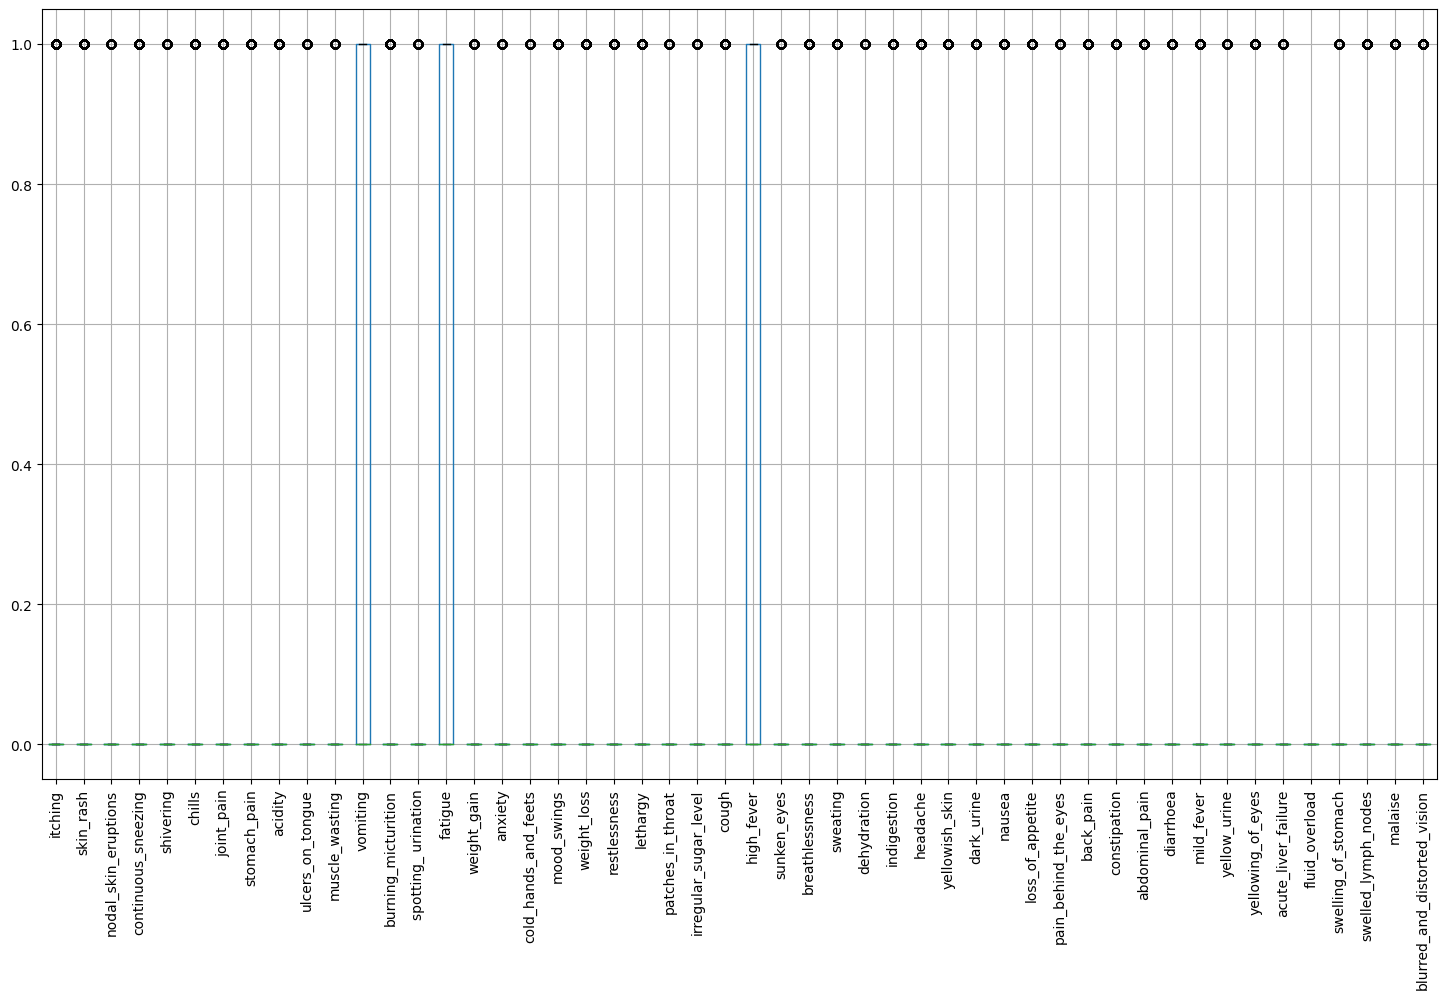

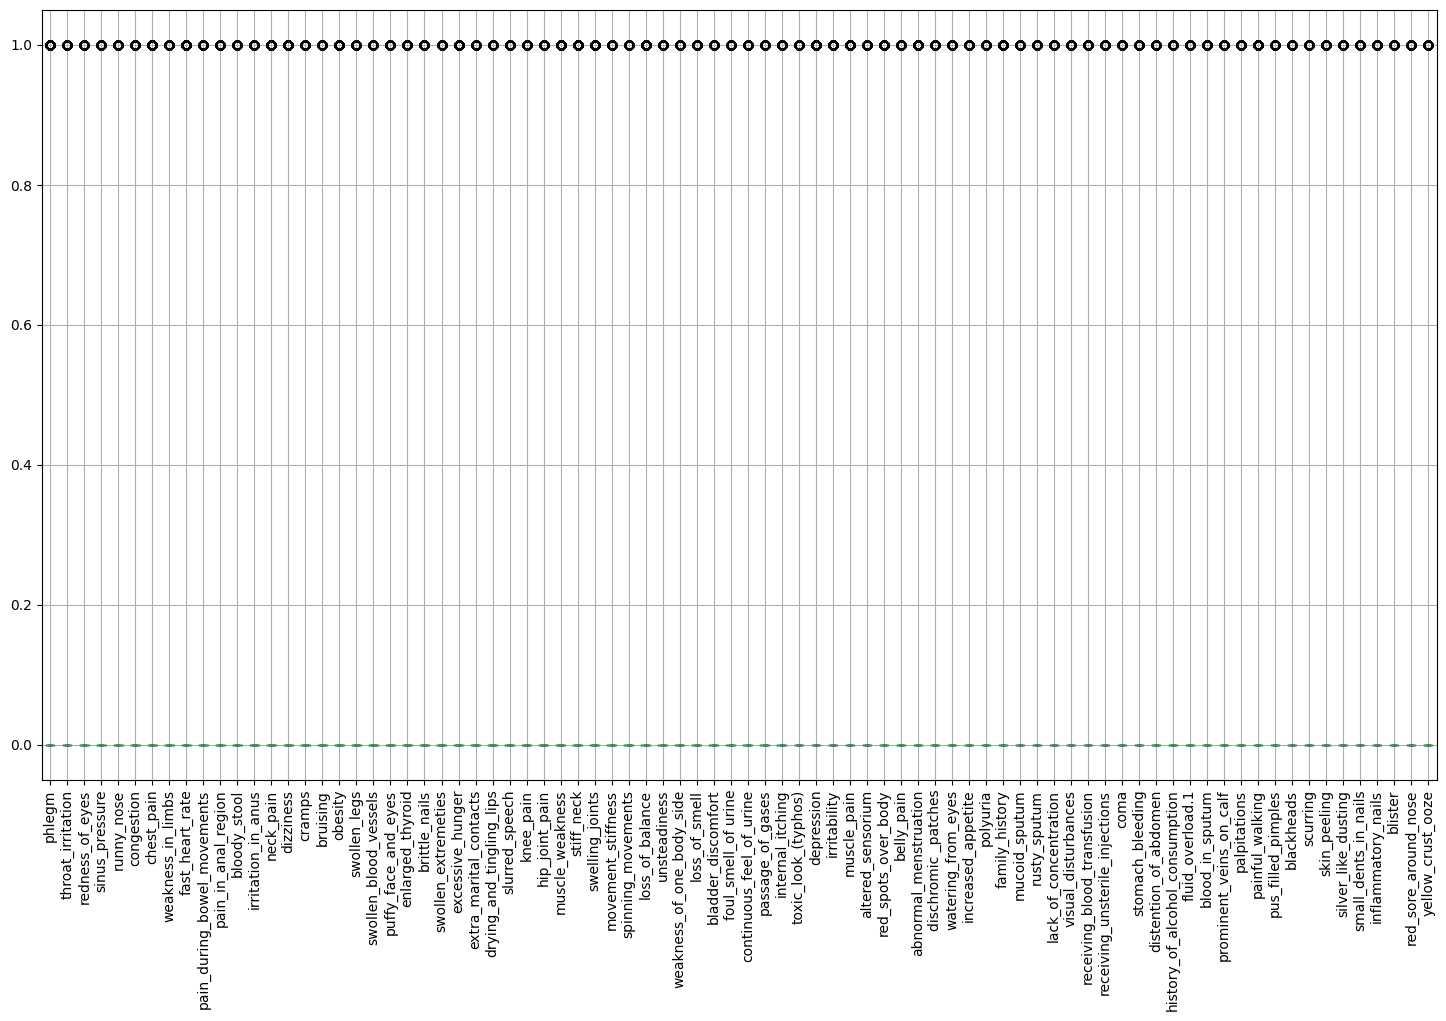

**Summary**:
 No outliers


In [7]:
temp_df=df_comb.iloc[:,:-1]
#Detect outliers
plt.subplots(figsize=(18,10))
temp_df.iloc[:,:50].boxplot()
plt.xticks(rotation=90)
plt.show()

plt.subplots(figsize=(18,10))
temp_df.iloc[:,50:].boxplot()
plt.xticks(rotation=90)
plt.show()

print(f'**Summary**:\n No outliers')

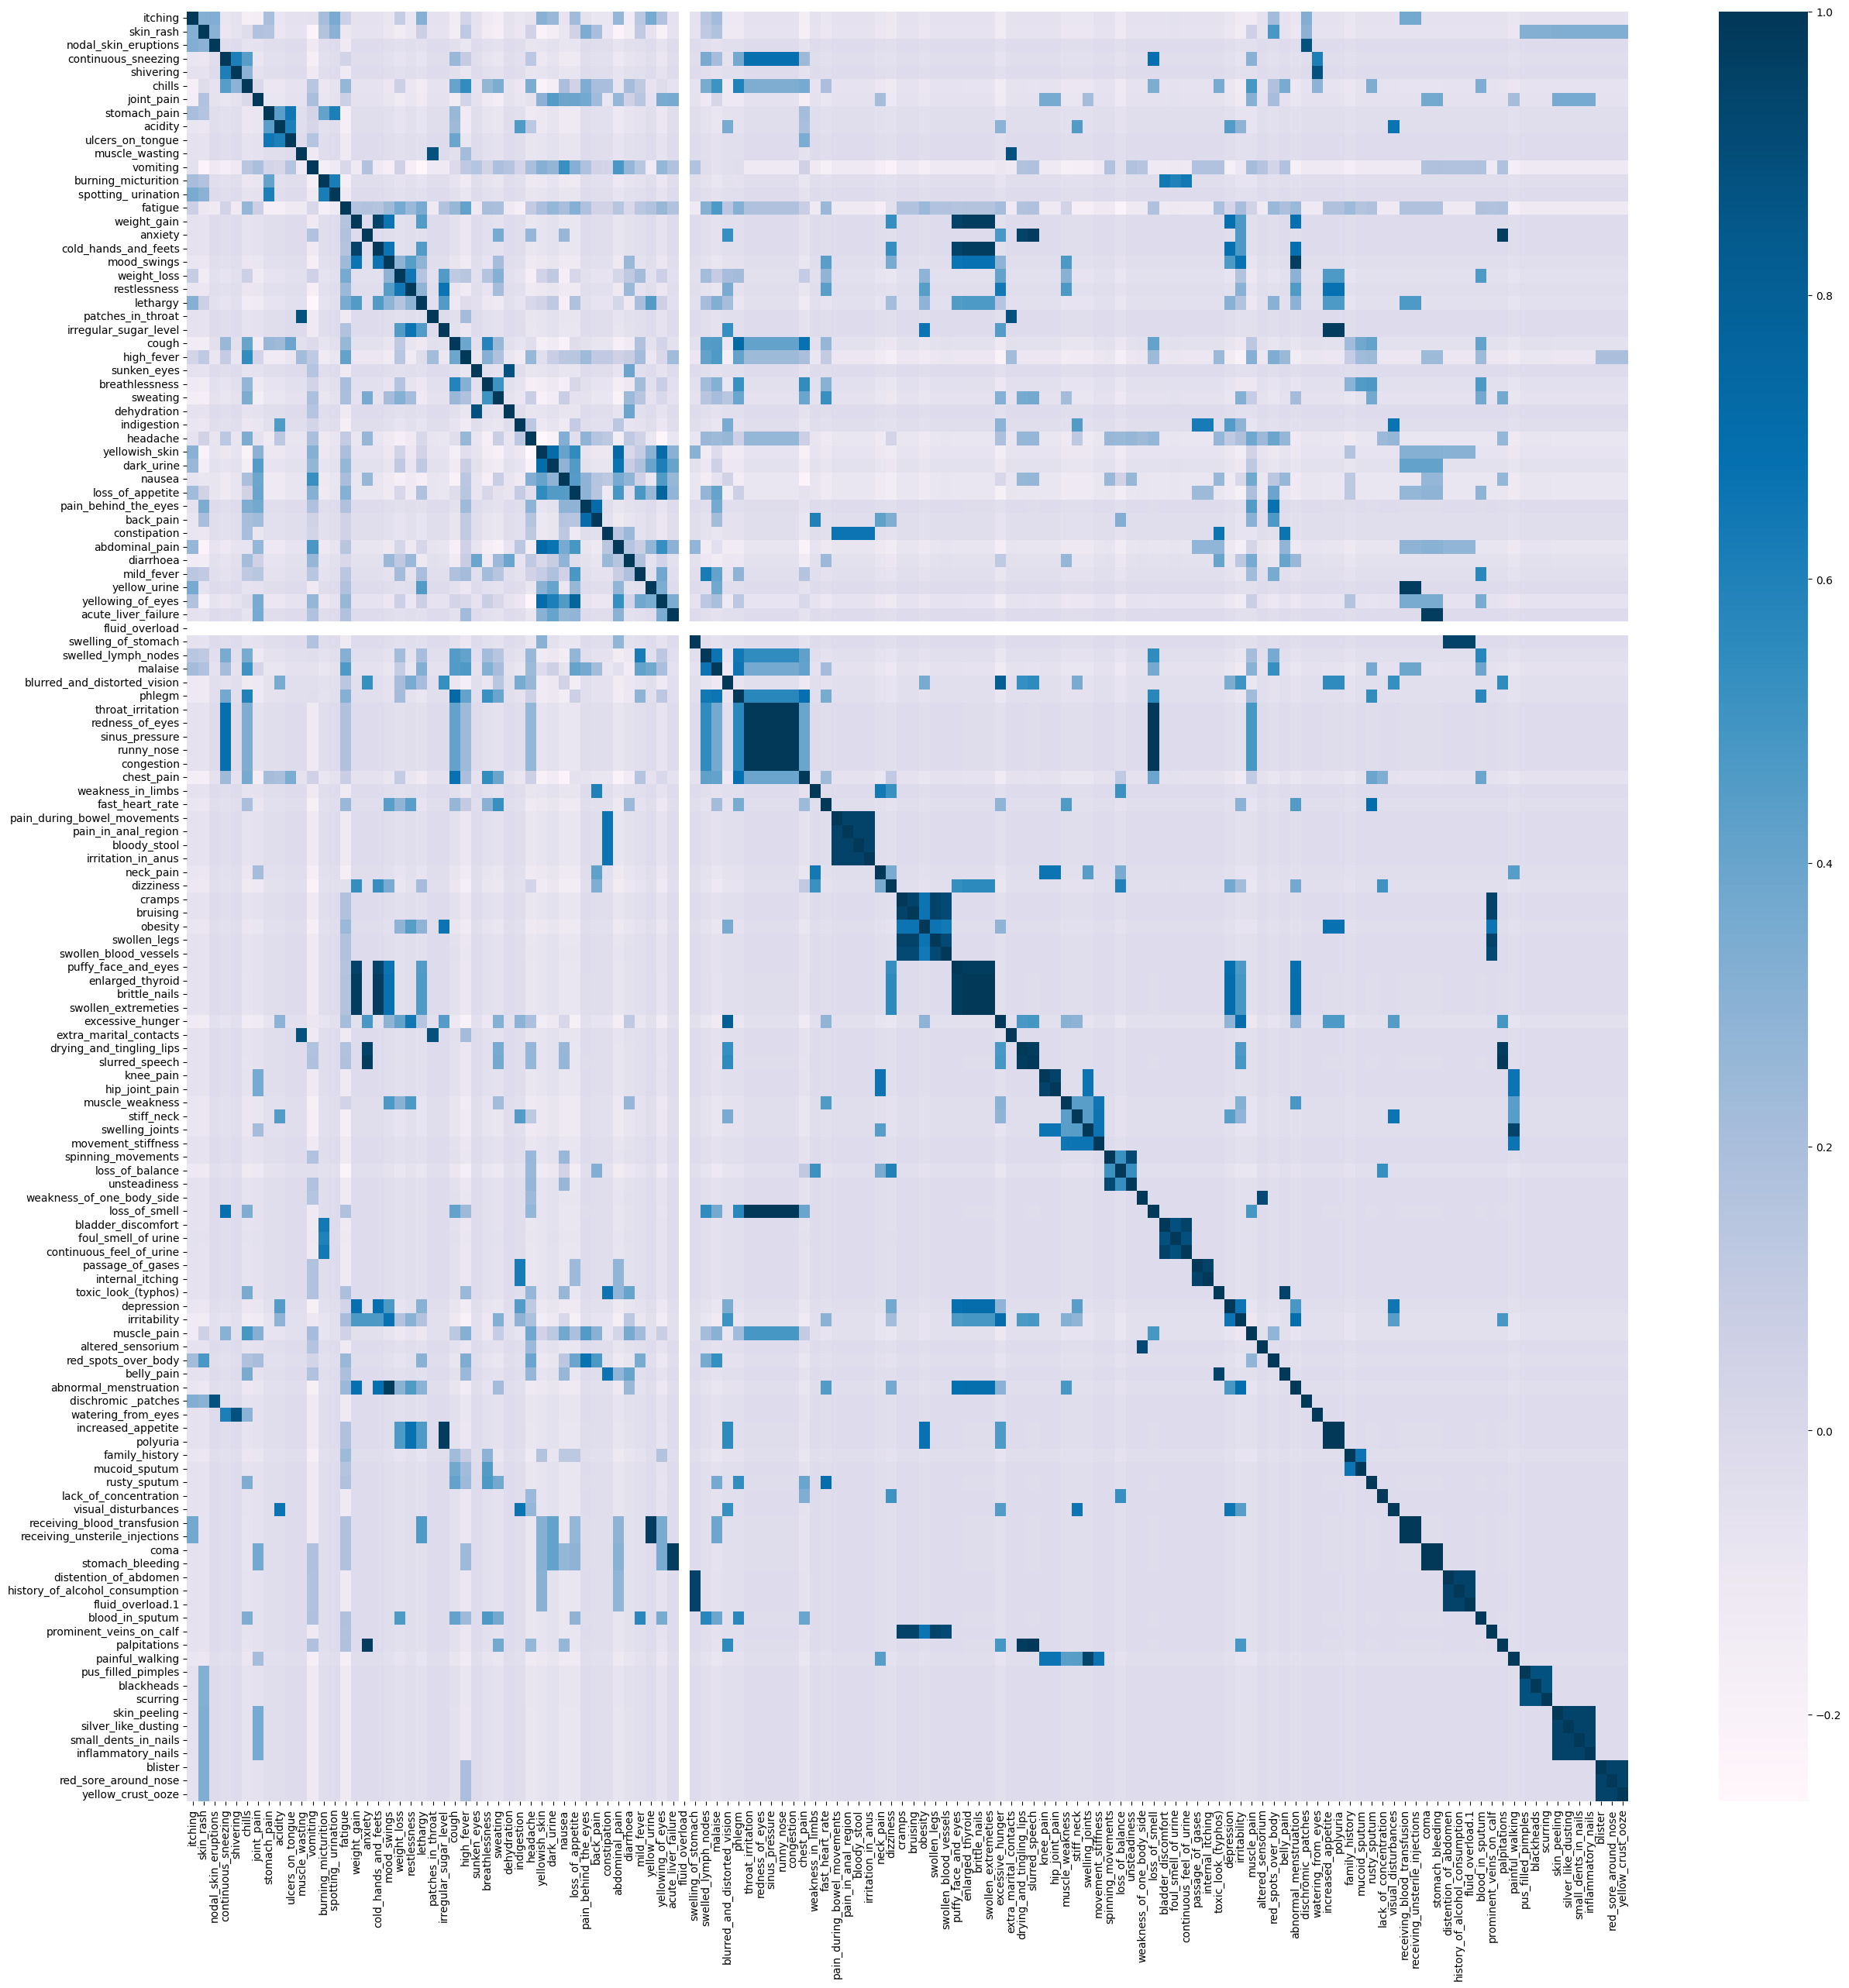

In [8]:
import seaborn as sns
plt.figure(figsize = (30, 30))
sns.heatmap(df_comb.corr(), cmap = 'PuBu', annot = False)
plt.show()

# Discarding High Correlated Feature

In [9]:
corr_matrix=df_comb.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

itching  skin_rash  nodal_skin_eruptions  \
itching                   NaN   0.318158              0.326439   
skin_rash                 NaN        NaN              0.298143   
nodal_skin_eruptions      NaN        NaN                   NaN   
continuous_sneezing       NaN        NaN                   NaN   
shivering                 NaN        NaN                   NaN   
...                       ...        ...                   ...   
small_dents_in_nails      NaN        NaN                   NaN   
inflammatory_nails        NaN        NaN                   NaN   
blister                   NaN        NaN                   NaN   
red_sore_around_nose      NaN        NaN                   NaN   
yellow_crust_ooze         NaN        NaN                   NaN   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.086906  -0.059893 -0.175905   -0.160650   
skin_rash                       -0.094786  -0.065324 -0.029324    0.171134   
nodal_skin_eruptions            -0.032566  -0.022444 -0.065917   -0.060200   
continuous_sneezing                   NaN   0.608981  0.446238   -0.087351   
shivering                             NaN        NaN  0.295332   -0.060200   
...                                   ...        ...       ...         ...   
small_dents_in_nails                  NaN        NaN       NaN         NaN   
inflammatory_nails                    NaN        NaN       NaN         NaN   
blister                               NaN        NaN       NaN         NaN   
red_sore_around_nose                  NaN        NaN       NaN         NaN   
yellow_crust_ooze                     NaN        NaN       NaN         NaN   

                      stomach_pain   acidity  ulcers_on_tongue  ...  \
itching                   0.202850 -0.086906         -0.059893  ...   
skin_rash                 0.161784 -0.094786         -0.065324  ...   
nodal_skin_eruptions     -0.032566 -0.032566         -0.022444  ...   
continuous_sneezing      -0.047254 -0.047254         -0.032566  ...   
shivering                -0.032566 -0.032566         -0.022444  ...   
...                            ...       ...               ...  ...   
small_dents_in_nails           NaN       NaN               NaN  ...   
inflammatory_nails             NaN       NaN               NaN  ...   
blister                        NaN       NaN               NaN  ...   
red_sore_around_nose           NaN       NaN               NaN  ...   
yellow_crust_ooze              NaN       NaN               NaN  ...   

                      pus_filled_pimples  blackheads  scurring  skin_peeling  \
itching                        -0.059893   -0.059893 -0.059893     -0.061573   
skin_rash                       0.320859    0.320859  0.320859      0.331087   
nodal_skin_eruptions           -0.022444   -0.022444 -0.022444     -0.023073   
continuous_sneezing            -0.032566   -0.032566 -0.032566     -0.033480   
shivering                      -0.022444   -0.022444 -0.022444     -0.023073   
...                                  ...         ...       ...           ...   
small_dents_in_nails                 NaN         NaN       NaN           NaN   
inflammatory_nails                   NaN         NaN       NaN           NaN   
blister                              NaN         NaN       NaN           NaN   
red_sore_around_nose                 NaN         NaN       NaN           NaN   
yellow_crust_ooze                    NaN         NaN       NaN           NaN   

                      silver_like_dusting  small_dents_in_nails  \
itching                         -0.061573             -0.061573   
skin_rash                        0.331087              0.331087   
nodal_skin_eruptions            -0.023073             -0.023073   
continuous_sneezing             -0.033480             -0.033480   
shivering                       -0.023073             -0.023073   
...                                   ...                   ...   
small_den

In [10]:
df1=pd.read_csv("testing.csv")


In [11]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop,len(to_drop))

df_comb=df_comb.drop(to_drop, axis=1)
df1=df1.drop(to_drop, axis=1)

['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze'] 42


In [12]:
# using sklearn variance threshold to find constant features
temp_train=df_comb.iloc[:,:-1]

from sklearn.feature_selection import VarianceThreshold


sel = VarianceThreshold(threshold=0.03)
sel.fit(temp_train)

VarianceThreshold(threshold=0.03)

In [13]:
# print the constant features
print(
    len([
        x for x in temp_train.columns
        if x not in temp_train.columns[sel.get_support()]
    ]))

to_drop=[x for x in temp_train.columns if x not in temp_train.columns[sel.get_support()]]
df_comb=df_comb.drop(to_drop, axis=1)
df1=df1.drop(to_drop, axis=1)

41


In [14]:
temp1={}

for e,i in enumerate(df_comb['prognosis'].unique()):
    temp1[i]=e
df_comb=df_comb.replace({'prognosis':temp1})  

In [15]:
df_comb.head()

itching  skin_rash  continuous_sneezing  chills  joint_pain  stomach_pain  \
0        1          1                    0       0           0             0   
1        0          1                    0       0           0             0   
2        1          0                    0       0           0             0   
3        1          1                    0       0           0             0   
4        1          1                    0       0           0             0   

   acidity  vomiting  burning_micturition  fatigue  ...  muscle_weakness  \
0        0         0                    0        0  ...                0   
1        0         0                    0        0  ...                0   
2        0         0                    0        0  ...                0   
3        0         0                    0        0  ...                0   
4        0         0                    0        0  ...                0   

   stiff_neck  swelling_joints  loss_of_balance  depression  irritability  \
0           0                0                0           0             0   
1           0                0                0           0             0   
2           0                0                0           0             0   
3           0                0                0           0             0   
4           0                0                0           0             0   

   muscle_pain  red_spots_over_body  family_history  prognosis  
0            0                    0               0          0  
1            0                    0               0          0  
2            0                    0               0          0  
3            0                    0               0          0  
4            0                    0               0          0  

[5 rows x 50 columns]

In [16]:
 

# creation of features and label for training the models
X = df_comb.iloc[:, :-1]
Y = df_comb.iloc[:, -1]
P = df.iloc[:, :-1]    
Q= df.iloc[:, -1]

In [17]:
df_comb

itching  skin_rash  continuous_sneezing  chills  joint_pain  \
0           1          1                    0       0           0   
1           0          1                    0       0           0   
2           1          0                    0       0           0   
3           1          1                    0       0           0   
4           1          1                    0       0           0   
...       ...        ...                  ...     ...         ...   
4915        0          0                    0       0           0   
4916        0          1                    0       0           0   
4917        0          0                    0       0           0   
4918        0          1                    0       0           1   
4919        0          1                    0       0           0   

      stomach_pain  acidity  vomiting  burning_micturition  fatigue  ...  \
0                0        0         0                    0        0  ...   
1                0        0         0                    0        0  ...   
2                0        0         0                    0        0  ...   
3                0        0         0                    0        0  ...   
4                0        0         0                    0        0  ...   
...            ...      ...       ...                  ...      ...  ...   
4915             0        0         1                    0        0  ...   
4916             0        0         0                    0        0  ...   
4917             0        0         0                    1        0  ...   
4918             0        0         0                    0        0  ...   
4919             0        0         0                    0        0  ...   

      muscle_weakness  stiff_neck  swelling_joints  loss_of_balance  \
0                   0           0                0                0   
1                   0           0                0                0   
2                   0           0                0                0   
3                   0           0                0                0   
4                   0           0                0                0   
...               ...         ...              ...              ...   
4915                0           0                0                1   
4916                0           0                0                0   
4917                0           0                0                0   
4918                0           0                0                0   
4919                0           0                0                0   

      depression  irritability  muscle_pain  red_spots_over_body  \
0              0             0            0                    0   
1              0             0            0                    0   
2              0             0            0                    0   
3              0             0            0                    0   
4              0             0            0                    0   
...          ...           ...          ...                  ...   
4915           0             0            0                    0   
4916           0             0            0                    0   
4917           0             0            0                    0   
4918           0             0            0                    0   
4919           0             0            0                    0   

      family_history  prognosis  
0                  0          0  
1                  0          0  
2                  0          0  
3                  0          0  
4                  0          0  
...              ...        ...  
4915               0         36  
4916               0         37  
4917               0         38  
4918               0         39  
4919               0         40  

[4920 rows x 50 columns]

In [18]:
# splitting data for training the classifiers and testing
A_train, A_test, B_train, B_test = train_test_split(P, Q, test_size=0.30)

In [19]:
x_train=df_comb.iloc[:, :-1]
y_train=df_comb.iloc[:, -1]

In [20]:
temp2={}

for e,i in enumerate(df1['prognosis'].unique()):
    temp2[i]=e
df1=df1.replace({'prognosis':temp2})   

In [ ]:
df1.head()

itching  skin_rash  continuous_sneezing  chills  joint_pain  stomach_pain  \
0        1          1                    0       0           0             0   
1        0          0                    1       1           0             0   
2        0          0                    0       0           0             1   
3        1          0                    0       0           0             0   
4        1          1                    0       0           0             1   

   acidity  vomiting  burning_micturition  fatigue  ...  muscle_weakness  \
0        0         0                    0        0  ...                0   
1        0         0                    0        0  ...                0   
2        1         1                    0        0  ...                0   
3        0         1                    0        0  ...                0   
4        0         0                    1        0  ...                0   

   stiff_neck  swelling_joints  loss_of_balance  depression  irritability  \
0           0                0                0           0             0   
1           0                0                0           0             0   
2           0                0                0           0             0   
3           0                0                0           0             0   
4           0                0                0           0             0   

   muscle_pain  red_spots_over_body  family_history  prognosis  
0            0                    0               0          0  
1            0                    0               0          1  
2            0                    0               0          2  
3            0                    0               0          3  
4            0                    0               0          4  

[5 rows x 50 columns]

In [21]:
x_test=df1.iloc[:, :-1]
y_test=df1.iloc[:, -1]

In [ ]:
x_test

itching  skin_rash  continuous_sneezing  chills  joint_pain  stomach_pain  \
0         1          1                    0       0           0             0   
1         0          0                    1       1           0             0   
2         0          0                    0       0           0             1   
3         1          0                    0       0           0             0   
4         1          1                    0       0           0             1   
5         0          0                    0       0           0             0   
6         0          0                    0       0           0             0   
7         0          0                    0       0           0             0   
8         0          0                    0       0           0             0   
9         0          0                    0       0           0             0   
10        0          0                    0       0           0             0   
11        0          0                    0       0           0             0   
12        0          0                    0       0           0             0   
13        0          0                    0       0           0             0   
14        1          0                    0       0           0             0   
15        0          0                    0       1           0             0   
16        1          1                    0       0           0             0   
17        0          1                    0       1           1             0   
18        0          0                    0       1           0             0   
19        0          0                    0       0           1             0   
20        1          0                    0       0           0             0   
21        0          0                    0       0           0             0   
22        0          0                    0       0           1             0   
23        0          0                    0       0           1             0   
24        0          0                    0       0           0             0   
25        0          0                    0       1           0             0   
26        0          0                    1       1           0             0   
27        0          0                    0       1           0             0   
28        0          0                    0       0           0             0   
29        0          0                    0       0           0             0   
30        0          0                    0       0           0             0   
31        0          0                    0       0           0             0   
32        0          0                    0       0           0             0   
33        0          0                    0       0           0             0   
34        0          0                    0       0           1             0   
35        0          0                    0       0           0             0   
36        0          0                    0       0           0             0   
37        0          1                    0       0           0             0   
38        0          0                    0       0           0             0   
39        0          1                    0       0           1             0   
40        0          1                    0       0           0             0   

    acidity  vomiting  burning_micturition  fatigue  ...  excessive_hunger  \
0         0         0                    0        0  ...                 0   
1         0         0                    0        0  ...                 0   
2         1         1                    0        0  ...                 0   
3         0         1                    0        0  ...                 0   
4         0         0                    1        0  ...                 0   
5         0         1                    0        0  ...                 0   
6         0         0                    0        0  ..

In [ ]:
x_test

itching  skin_rash  continuous_sneezing  chills  joint_pain  stomach_pain  \
0         1          1                    0       0           0             0   
1         0          0                    1       1           0             0   
2         0          0                    0       0           0             1   
3         1          0                    0       0           0             0   
4         1          1                    0       0           0             1   
5         0          0                    0       0           0             0   
6         0          0                    0       0           0             0   
7         0          0                    0       0           0             0   
8         0          0                    0       0           0             0   
9         0          0                    0       0           0             0   
10        0          0                    0       0           0             0   
11        0          0                    0       0           0             0   
12        0          0                    0       0           0             0   
13        0          0                    0       0           0             0   
14        1          0                    0       0           0             0   
15        0          0                    0       1           0             0   
16        1          1                    0       0           0             0   
17        0          1                    0       1           1             0   
18        0          0                    0       1           0             0   
19        0          0                    0       0           1             0   
20        1          0                    0       0           0             0   
21        0          0                    0       0           0             0   
22        0          0                    0       0           1             0   
23        0          0                    0       0           1             0   
24        0          0                    0       0           0             0   
25        0          0                    0       1           0             0   
26        0          0                    1       1           0             0   
27        0          0                    0       1           0             0   
28        0          0                    0       0           0             0   
29        0          0                    0       0           0             0   
30        0          0                    0       0           0             0   
31        0          0                    0       0           0             0   
32        0          0                    0       0           0             0   
33        0          0                    0       0           0             0   
34        0          0                    0       0           1             0   
35        0          0                    0       0           0             0   
36        0          0                    0       0           0             0   
37        0          1                    0       0           0             0   
38        0          0                    0       0           0             0   
39        0          1                    0       0           1             0   
40        0          1                    0       0           0             0   

    acidity  vomiting  burning_micturition  fatigue  ...  excessive_hunger  \
0         0         0                    0        0  ...                 0   
1         0         0                    0        0  ...                 0   
2         1         1                    0        0  ...                 0   
3         0         1                    0        0  ...                 0   
4         0         0                    1        0  ...                 0   
5         0         1                    0        0  ...                 0   
6         0         0                    0        0  ..

In [ ]:
y_test

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
Name: prognosis, dtype: int64

In [ ]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
4915    36
4916    37
4917    38
4918    39
4919    40
Name: prognosis, Length: 4920, dtype: int64

*Train Test Split*

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_comb.drop('prognosis', 1), df_comb['prognosis'], test_size = .4, random_state=42,shuffle=True)

In [ ]:
# splitting data for training the classifiers and testing
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [23]:
# lists used for accuracy plots
accuracy_list = []
cross_accuracy_list = []
model_list = []

In [24]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# KBEST SELECTORS

In [ ]:
"""k = 120  # Number of top features to select
  selector = SelectKBest(score_func=chi2, k=k)
  X_train_selected1 = selector.fit_transform(A_train, B_train)
  X_test_selected1= selector.transform(A_test)

  # Get the indices of the selected features
  selected_feature_indices1 = selector.get_support(indices=True)

 # Get the names of the selected features
 selected_feature_names1= X.columns[selected_feature_indices1]
"""

'k = 120  # Number of top features to select\n  selector = SelectKBest(score_func=chi2, k=k)\n  X_train_selected1 = selector.fit_transform(A_train, B_train)\n  X_test_selected1= selector.transform(A_test)\n\n  # Get the indices of the selected features\n  selected_feature_indices1 = selector.get_support(indices=True)\n\n # Get the names of the selected features\n selected_feature_names1= X.columns[selected_feature_indices1]\n'

In [ ]:
"""k = 90  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(x_train, y_train)
X_test_selected = selector.transform(x_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

"""

# Accuracy Cross Checking and Hyperparameter tuning 'with' Classification Report

# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100,min_samples_split=10,max_depth=15 )
rf = rf.fit(X_train,y_train)
# prediction of labels for the test data
rf_pred = rf.predict(X_test)
acc_rf = round(Decimal(rf.score(X_test, y_test) * 100), 2)
accuracy_list.append(acc_rf)
model_list.append("RF")
print(f"Accuracy (RF) : {acc_rf}%")

# Cross Validation Accuracy RF
# performing cross validation with 5 different splits
scores_rf = cross_val_score(rf, X_test, y_test, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_rf.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (RF): {score}%")

Accuracy (RF) : 98.32%
Cross Validation Accuracy (RF): 98.27%


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

# Create the model
model = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.9844182511686599
Test Accuracy: 0.983739837398374


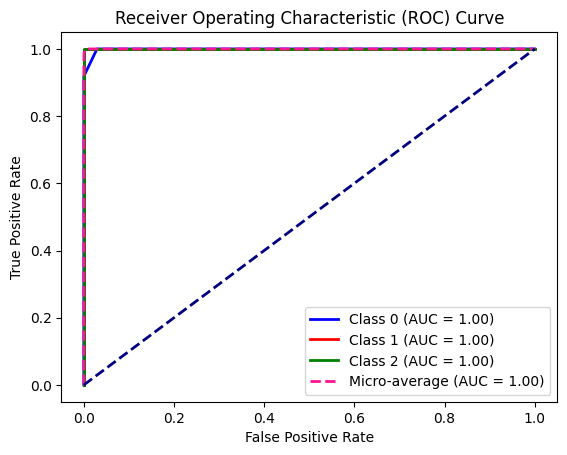

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
n_classes=41
# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(RandomForestClassifier())

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy (RF) : 98.37%
Cross Validation Accuracy (RF): 98.22%


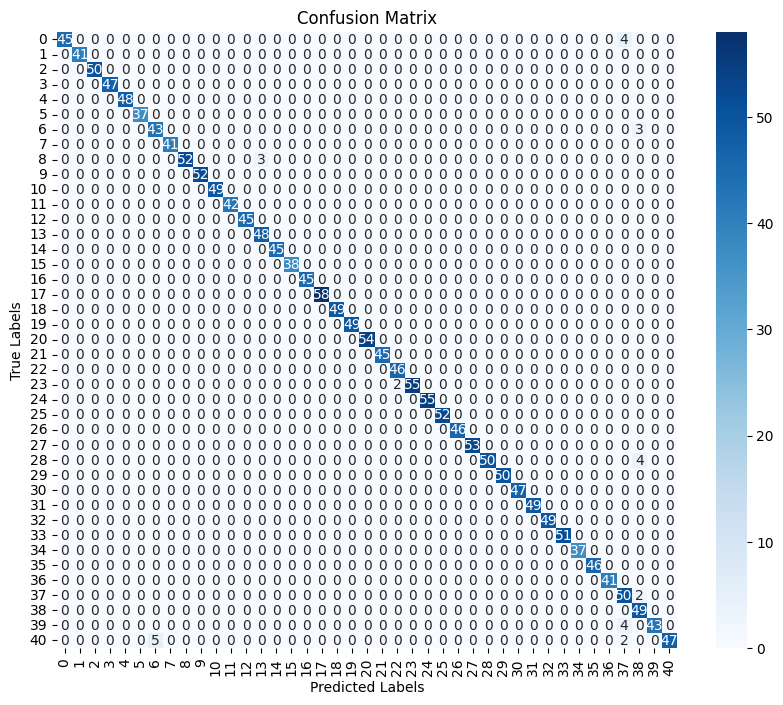

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


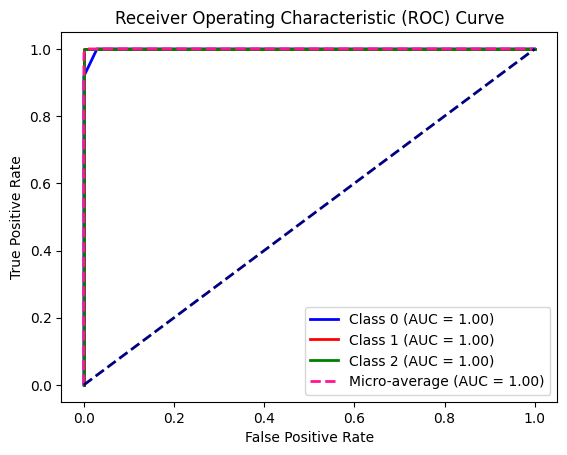

# Classification Report(RF)


In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        45
    

'k = 90  # Number of top features to select\nselector = SelectKBest(score_func=chi2, k=k)\nX_train_selected = selector.fit_transform(x_train, y_train)\nX_test_selected = selector.transform(x_test)\n\n# Get the indices of the selected features\nselected_feature_indices = selector.get_support(indices=True)\n\n# Get the names of the selected features\nselected_feature_names = X.columns[selected_feature_indices]\n\n'

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the Logistic Regression model
logreg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.9847560870687431
Test Accuracy: 0.9852642276422764


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model with the best hyperparameters
best_logreg = LogisticRegression(C=0.1, penalty='l2', solver='saga')

# Train the model on the entire training dataset
best_logreg.fit(X_train, y_train)

# Evaluate the model on the test dataset
accuracy = best_logreg.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.9852642276422764


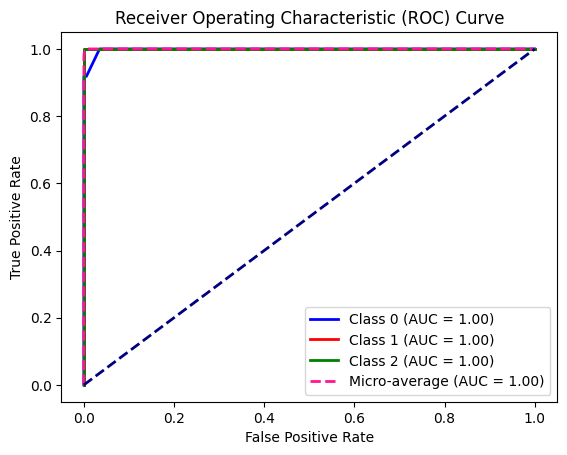

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
n_classes=41
# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(LogisticRegression())

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Classification Report(LR)

In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        45
    

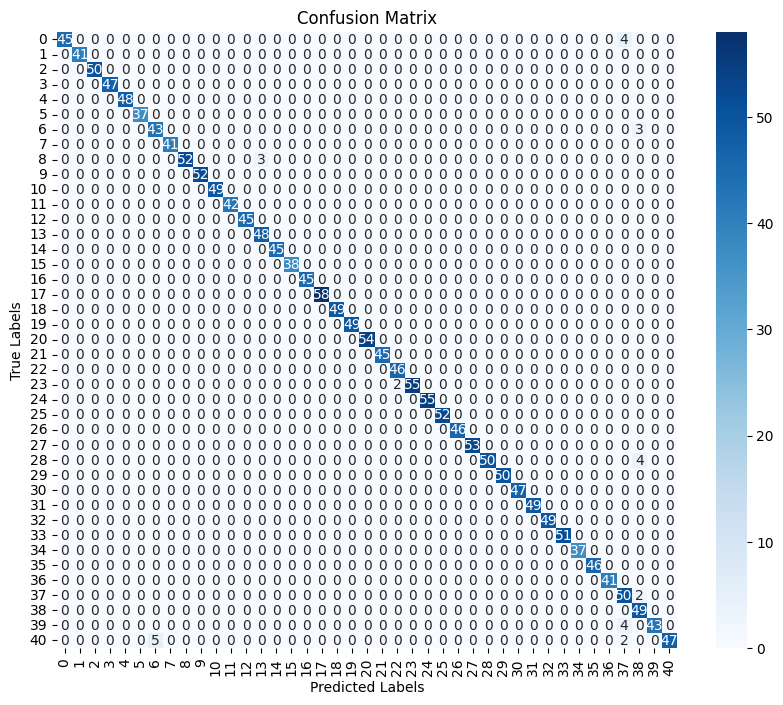

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Naive Bias

In [ ]:
naive_bayes = MultinomialNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9822154471544715


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Create the MNB model
mnb = MultinomialNB()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

# Perform grid search
grid_search = GridSearchCV(mnb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
acc_mnb = round(best_model.score(X_test, y_test) * 100, 2)
print(f"Accuracy (MNB): {acc_mnb}%")


Best Hyperparameters: {'alpha': 0.1}
Best Score: 0.9834024491668817
Accuracy (MNB): 98.22%


In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       0.71      1.00      0.83        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        45
    

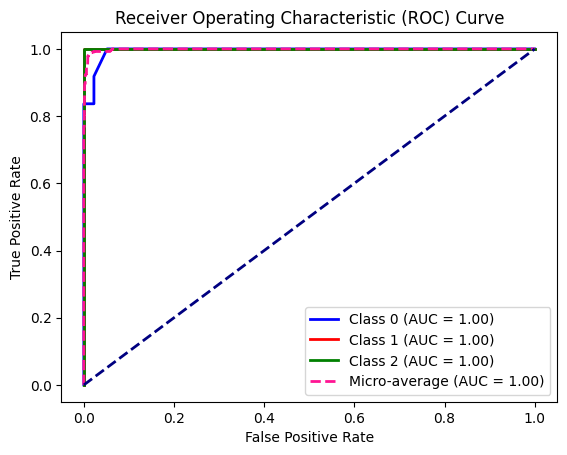

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
n_classes=41
# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(MultinomialNB())

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


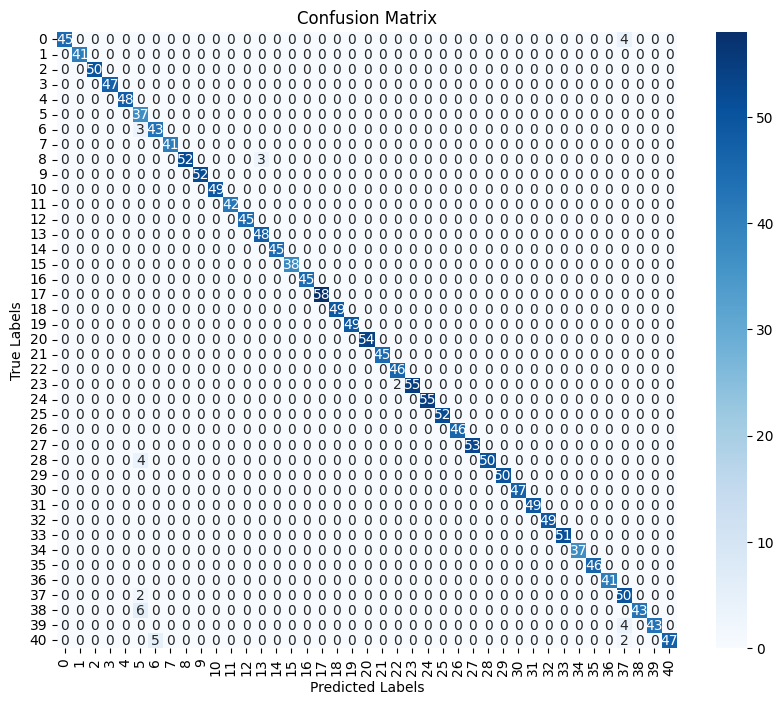

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **K-Nearest Neighbor Classifier**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on test data
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy is:",accuracy*100)

Accuracy is: 98.3739837398374


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Score: 0.9850950701195906
Test Accuracy: 0.9852642276422764


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the KNN classifier with best hyperparameters
knn = KNeighborsClassifier(n_neighbors=7, p=1, weights='uniform')

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on test data
predictions = knn.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy is",accuracy)

Accuracy is 0.9852642276422764


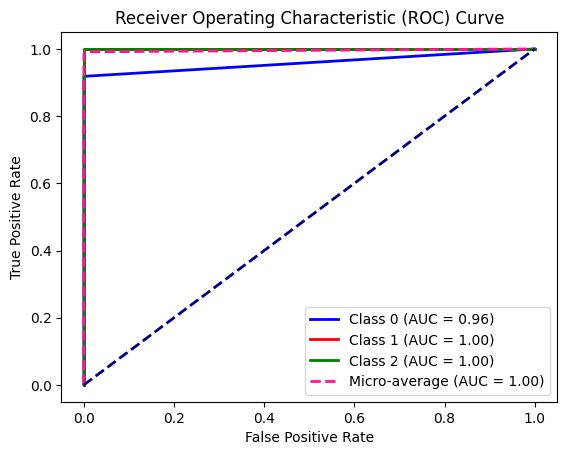

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
n_classes=41
# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(KNeighborsClassifier())

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


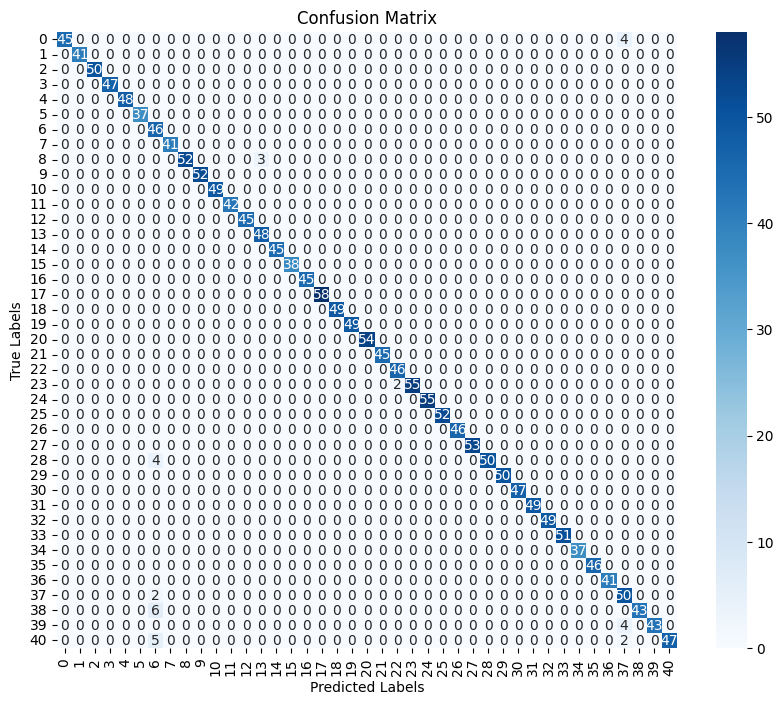

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the KNN classifier
model = KNeighborsClassifier(n_neighbors=5)  # Replace with your KNN classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **Logistic Regression Classifier**

Logistic Regression uses OvR (One Vs Rest) approach when classification is multi class.

Accuracy (LR) : 98.53%
Cross Validation Accuracy (LR): 98.54%


Best Hyperparameters: {'C': 0.1}
Best Score: 0.9847560870687431
Test Accuracy: 0.9852642276422764


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        45
    

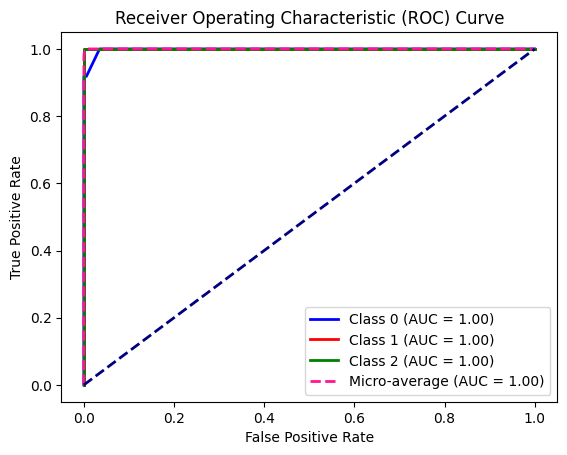

# **Support Vector Machine Classifier**



In [ ]:
# SVM Classifier
svm = SVC()
svm = svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
acc_svm = round(Decimal(svm.score(X_test, y_test) * 100), 2)
accuracy_list.append(acc_svm)
model_list.append("SVM")
print(f"Accuracy (SVM) : {acc_svm}%")

scores_svm = cross_val_score(svm, X, Y, cv=5)
score = round(Decimal(scores_svm.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (SVM): {score}%")

Accuracy (SVM) : 98.53%
Cross Validation Accuracy (SVM): 98.54%


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'coef0': [0, 1, 2]
}

# Create the SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'C': 0.1, 'coef0': 0, 'degree': 2, 'gamma': 10, 'kernel': 'poly'}
Best Score: 0.9854340531704381
Test Accuracy: 0.9852642276422764


In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        45
    

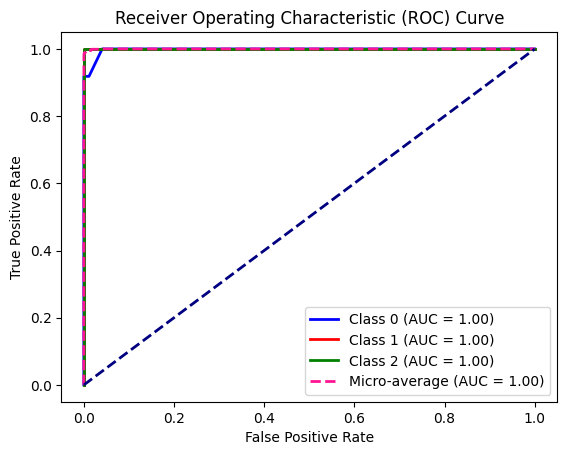

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(SVC(probability=True))

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

plt.figure()
colors = ['blue', 'red', 'green']  
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


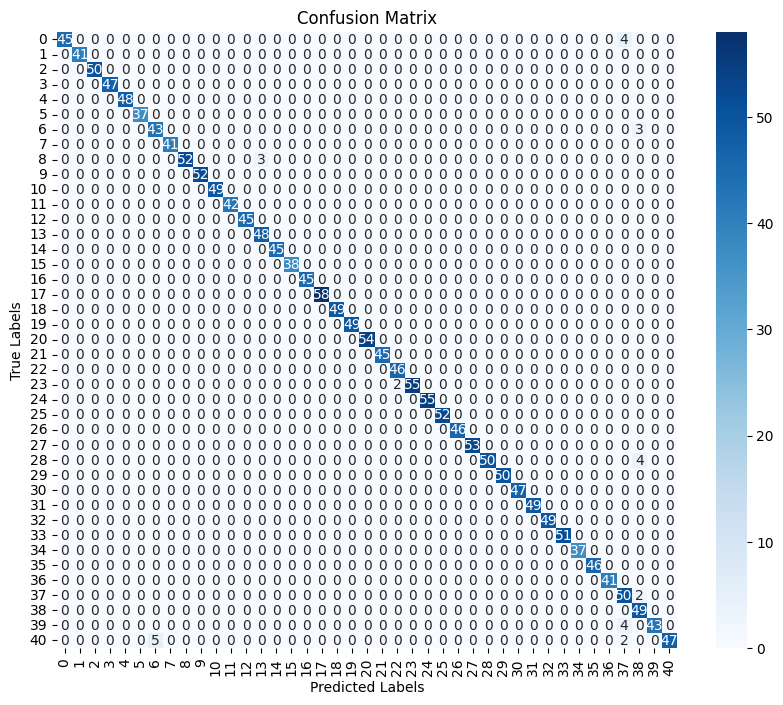

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the SVM classifier
model = SVC(kernel='linear', C=1.0)  # Replace with your SVM classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **Decision Tree Classifier**


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for the search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an instance of the SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new SVM classifier with the best hyperparameters
best_svm = SVC(**best_params)

# Train the classifier
best_svm.fit(X_train, y_train)

# Make predictions on test data
predictions = best_svm.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters and the corresponding best score
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9847572342195073
Accuracy: 0.9852642276422764


In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
# prediction of labels for the test data
dt_pred = dt.predict(X_test)
acc_dt = round(Decimal(dt.score(X_test, y_test) * 100), 2)
accuracy_list.append(acc_dt)
model_list.append("DT")
print(f"Accuracy (DT) : {acc_dt}%")

# performing cross validation with 5 different splits
scores_dt = cross_val_score(dt, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_dt.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (DT): {score}%")

Accuracy (DT) : 98.22%
Cross Validation Accuracy (DT): 98.54%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for the search
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create an instance of the Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new Decision Tree classifier with the best hyperparameters
best_dt = DecisionTreeClassifier(**best_params)

# Train the classifier
best_dt.fit(X_train, y_train)

# Make predictions on test data
predictions = best_dt.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters, the corresponding best score, and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.980352748860019
Accuracy: 0.9822154471544715


In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        45
    

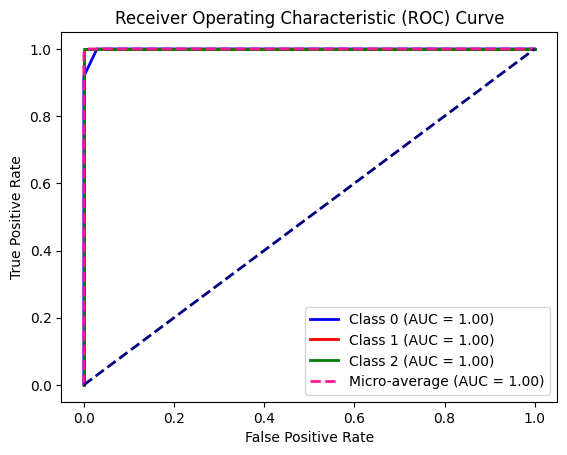

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = OneVsRestClassifier(DecisionTreeClassifier())

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


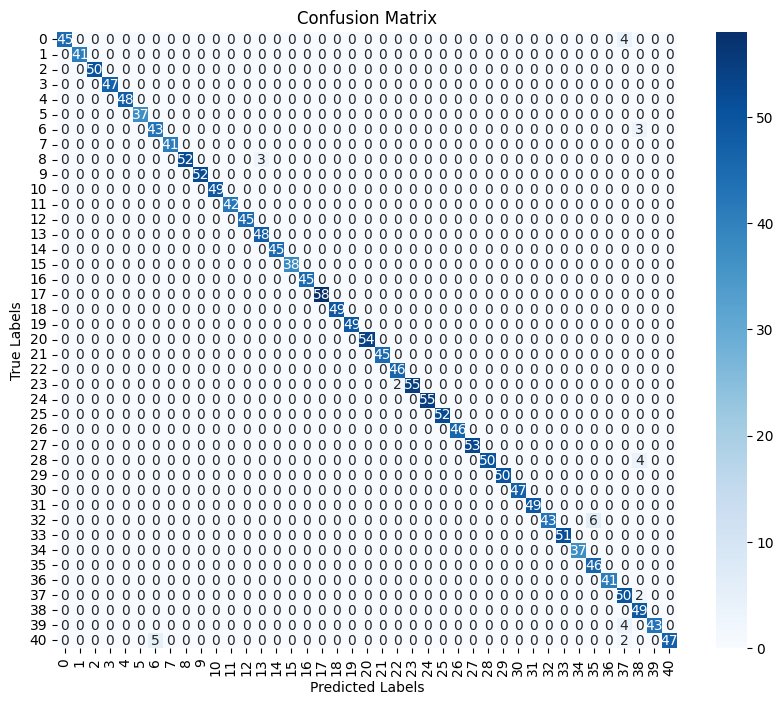

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Decision Tree classifier
model = DecisionTreeClassifier()  # Replace with your Decision Tree classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **Multilayer Perceptron Classifier**

MLP is a feed forward ANN (Artificial Neural Network) which is extensively used for classification purpose.

In [ ]:
# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32), activation='relu', solver='adam', max_iter=50)
mlp = mlp.fit(X_train, y_train)
# prediction of labels for the test data
mlp_pred = mlp.predict(X_test)
acc_mlp = round(Decimal(mlp.score(X_test, y_test) * 100), 2)
accuracy_list.append(acc_mlp)
model_list.append("MLP")
print(f"Accuracy (MLP) : {acc_mlp}%")

# Cross Validation Accuracy MLP
# performing cross validation with 5 different splits
scores_mlp = cross_val_score(mlp, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mlp.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MLP): {score}%")

Accuracy (MLP) : 98.53%
Cross Validation Accuracy (MLP): 98.54%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for the search
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['logistic', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Create an instance of the MLPClassifier
mlp = MLPClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new MLPClassifier with the best hyperparameters
best_mlp = MLPClassifier(**best_params)

# Train the classifier
best_mlp.fit(X_train, y_train)

# Make predictions on test data
predictions = best_mlp.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters, the corresponding best score, and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


Best Hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
Best Score: 0.9854340531704381
Accuracy: 0.9852642276422764


In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        45
    

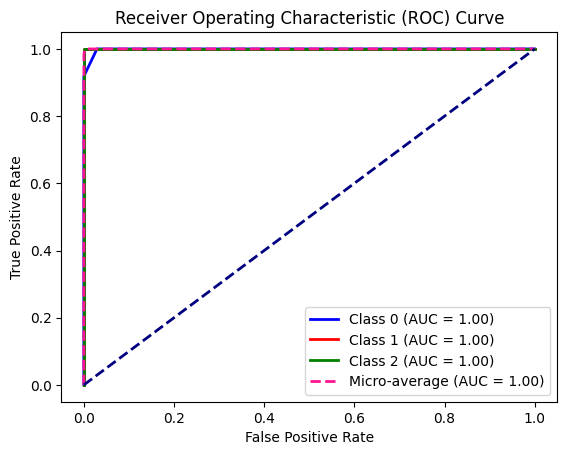

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the classifier using the OvR strategy
classifier = MLPClassifier()

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


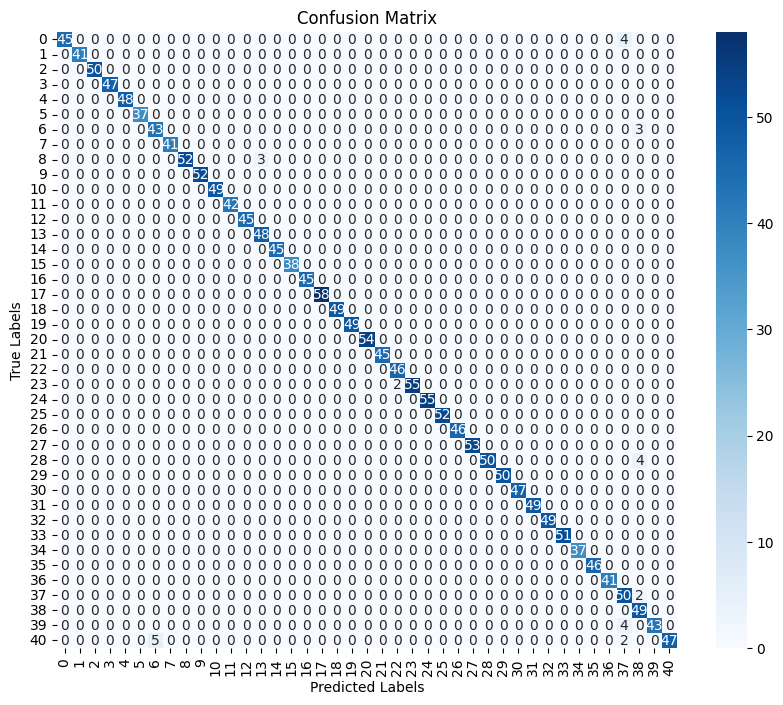

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu')  # Replace with your MLP classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# XGBOOST



In [ ]:

xgb_classifier = xgb.XGBClassifier()


In [ ]:
xgb_classifier.fit(X_train,y_train)
"""acc_mnb = round(Decimal(accuracy_score(y_test, mnb_pred) * 100), 2)
accuracy_list.append(acc_mnb)"""

'acc_mnb = round(Decimal(accuracy_score(y_test, mnb_pred) * 100), 2)\naccuracy_list.append(acc_mnb)'

In [ ]:
B_pred = xgb_classifier.predict(X_test)
model_list.append("XGB")


In [ ]:

p1 = round(Decimal(xgb_classifier.score(X_test, y_test) * 100), 2)
accuracy_list.append(p1)
print(f"Accuracy (MLP) : {p1}%")


Accuracy (MLP) : 98.22%


In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for the search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0.01, 0.1, 1.0]
}

# Create an instance of the XGBClassifier
xgb = XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new XGBClassifier with the best hyperparameters
best_xgb = XGBClassifier(**best_params)

# Train the classifier
best_xgb.fit(X_train, y_train)

# Make predictions on test data
predictions = best_xgb.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters, the corresponding best score, and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1.0, 'subsample': 0.6}
Best Score: 0.9847560870687431
Accuracy: 0.9852642276422764


In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        45
    

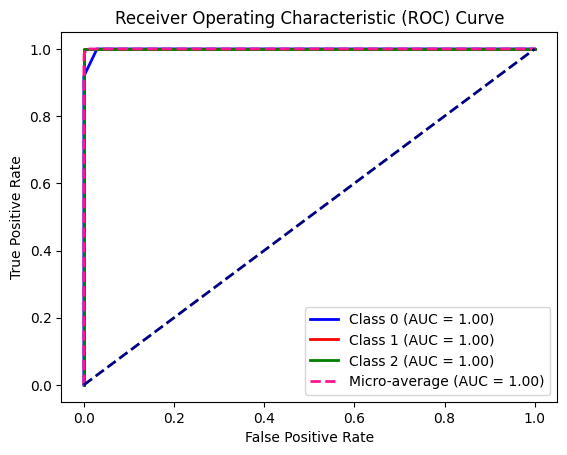

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import xgboost as xgb
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the XGBoost classifier
classifier = xgb.XGBClassifier()

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


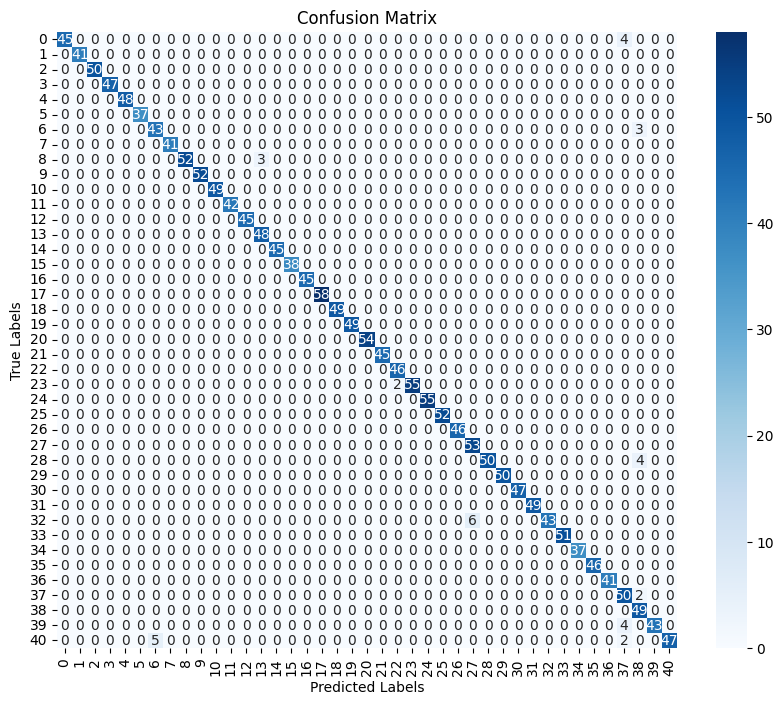

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Fit the XGBoost classifier
model = xgb.XGBClassifier(n_estimators=100, max_depth=3)  # Replace with your XGBoost classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Catboost

In [ ]:
catboost_classifier = CatBoostClassifier()

In [ ]:
catboost_classifier.fit(X_train, y_train)


Learning rate set to 0.083618
0:	learn: 3.3265366	total: 166ms	remaining: 2m 45s
1:	learn: 3.0264277	total: 191ms	remaining: 1m 35s
2:	learn: 2.6715409	total: 217ms	remaining: 1m 12s
3:	learn: 2.3938476	total: 243ms	remaining: 1m
4:	learn: 2.2214165	total: 269ms	remaining: 53.4s
5:	learn: 2.0122487	total: 295ms	remaining: 48.9s
6:	learn: 1.8878875	total: 321ms	remaining: 45.5s
7:	learn: 1.7219174	total: 350ms	remaining: 43.4s
8:	learn: 1.6135894	total: 377ms	remaining: 41.5s
9:	learn: 1.5435779	total: 404ms	remaining: 40s
10:	learn: 1.4742405	total: 431ms	remaining: 38.8s
11:	learn: 1.3940902	total: 460ms	remaining: 37.9s
12:	learn: 1.2893764	total: 487ms	remaining: 36.9s
13:	learn: 1.2349688	total: 512ms	remaining: 36.1s
14:	learn: 1.1795714	total: 540ms	remaining: 35.5s
15:	learn: 1.0982220	total: 567ms	remaining: 34.9s
16:	learn: 1.0436785	total: 595ms	remaining: 34.4s
17:	learn: 0.9794782	total: 624ms	remaining: 34s
18:	learn: 0.9193227	total: 650ms	remaining: 33.6s
19:	learn: 0.87

161:	learn: 0.0798542	total: 4.55s	remaining: 23.6s
162:	learn: 0.0794544	total: 4.58s	remaining: 23.5s
163:	learn: 0.0791334	total: 4.61s	remaining: 23.5s
164:	learn: 0.0788126	total: 4.63s	remaining: 23.4s
165:	learn: 0.0785002	total: 4.66s	remaining: 23.4s
166:	learn: 0.0781612	total: 4.68s	remaining: 23.4s
167:	learn: 0.0779072	total: 4.71s	remaining: 23.3s
168:	learn: 0.0775706	total: 4.74s	remaining: 23.3s
169:	learn: 0.0772576	total: 4.76s	remaining: 23.2s
170:	learn: 0.0770444	total: 4.79s	remaining: 23.2s
171:	learn: 0.0768089	total: 4.81s	remaining: 23.2s
172:	learn: 0.0765119	total: 4.84s	remaining: 23.1s
173:	learn: 0.0761396	total: 4.86s	remaining: 23.1s
174:	learn: 0.0759446	total: 4.89s	remaining: 23s
175:	learn: 0.0756935	total: 4.91s	remaining: 23s
176:	learn: 0.0754070	total: 4.94s	remaining: 23s
177:	learn: 0.0751527	total: 4.96s	remaining: 22.9s
178:	learn: 0.0748735	total: 4.99s	remaining: 22.9s
179:	learn: 0.0746756	total: 5.01s	remaining: 22.8s
180:	learn: 0.0744

321:	learn: 0.0589284	total: 8.62s	remaining: 18.2s
322:	learn: 0.0588299	total: 8.65s	remaining: 18.1s
323:	learn: 0.0587705	total: 8.67s	remaining: 18.1s
324:	learn: 0.0587336	total: 8.7s	remaining: 18.1s
325:	learn: 0.0586467	total: 8.72s	remaining: 18s
326:	learn: 0.0585551	total: 8.74s	remaining: 18s
327:	learn: 0.0585199	total: 8.77s	remaining: 18s
328:	learn: 0.0584813	total: 8.79s	remaining: 17.9s
329:	learn: 0.0584466	total: 8.81s	remaining: 17.9s
330:	learn: 0.0584190	total: 8.84s	remaining: 17.9s
331:	learn: 0.0583654	total: 8.86s	remaining: 17.8s
332:	learn: 0.0583325	total: 8.89s	remaining: 17.8s
333:	learn: 0.0582942	total: 8.91s	remaining: 17.8s
334:	learn: 0.0582126	total: 8.94s	remaining: 17.7s
335:	learn: 0.0581632	total: 8.96s	remaining: 17.7s
336:	learn: 0.0581322	total: 8.98s	remaining: 17.7s
337:	learn: 0.0581003	total: 9.01s	remaining: 17.7s
338:	learn: 0.0580669	total: 9.04s	remaining: 17.6s
339:	learn: 0.0580457	total: 9.07s	remaining: 17.6s
340:	learn: 0.05802

488:	learn: 0.0536118	total: 12.8s	remaining: 13.4s
489:	learn: 0.0536020	total: 12.8s	remaining: 13.4s
490:	learn: 0.0535788	total: 12.9s	remaining: 13.3s
491:	learn: 0.0535333	total: 12.9s	remaining: 13.3s
492:	learn: 0.0535211	total: 12.9s	remaining: 13.3s
493:	learn: 0.0534980	total: 12.9s	remaining: 13.2s
494:	learn: 0.0534671	total: 13s	remaining: 13.2s
495:	learn: 0.0534526	total: 13s	remaining: 13.2s
496:	learn: 0.0534329	total: 13s	remaining: 13.2s
497:	learn: 0.0534219	total: 13s	remaining: 13.1s
498:	learn: 0.0533961	total: 13.1s	remaining: 13.1s
499:	learn: 0.0533871	total: 13.1s	remaining: 13.1s
500:	learn: 0.0533688	total: 13.1s	remaining: 13.1s
501:	learn: 0.0533533	total: 13.1s	remaining: 13s
502:	learn: 0.0533444	total: 13.2s	remaining: 13s
503:	learn: 0.0533277	total: 13.2s	remaining: 13s
504:	learn: 0.0532661	total: 13.2s	remaining: 12.9s
505:	learn: 0.0532559	total: 13.2s	remaining: 12.9s
506:	learn: 0.0532465	total: 13.2s	remaining: 12.9s
507:	learn: 0.0532323	tota

647:	learn: 0.0513886	total: 16.8s	remaining: 9.11s
648:	learn: 0.0513753	total: 16.8s	remaining: 9.09s
649:	learn: 0.0513689	total: 16.8s	remaining: 9.06s
650:	learn: 0.0513644	total: 16.9s	remaining: 9.03s
651:	learn: 0.0513578	total: 16.9s	remaining: 9.01s
652:	learn: 0.0513404	total: 16.9s	remaining: 8.98s
653:	learn: 0.0513354	total: 16.9s	remaining: 8.95s
654:	learn: 0.0513273	total: 16.9s	remaining: 8.93s
655:	learn: 0.0513224	total: 17s	remaining: 8.9s
656:	learn: 0.0513048	total: 17s	remaining: 8.87s
657:	learn: 0.0512882	total: 17s	remaining: 8.85s
658:	learn: 0.0512824	total: 17s	remaining: 8.82s
659:	learn: 0.0512781	total: 17.1s	remaining: 8.79s
660:	learn: 0.0512617	total: 17.1s	remaining: 8.77s
661:	learn: 0.0512560	total: 17.1s	remaining: 8.74s
662:	learn: 0.0512456	total: 17.1s	remaining: 8.71s
663:	learn: 0.0512374	total: 17.2s	remaining: 8.69s
664:	learn: 0.0512306	total: 17.2s	remaining: 8.66s
665:	learn: 0.0512165	total: 17.2s	remaining: 8.63s
666:	learn: 0.0512076

808:	learn: 0.0500258	total: 20.7s	remaining: 4.89s
809:	learn: 0.0500215	total: 20.7s	remaining: 4.87s
810:	learn: 0.0500127	total: 20.8s	remaining: 4.84s
811:	learn: 0.0500011	total: 20.8s	remaining: 4.81s
812:	learn: 0.0499850	total: 20.8s	remaining: 4.79s
813:	learn: 0.0499619	total: 20.8s	remaining: 4.76s
814:	learn: 0.0499599	total: 20.9s	remaining: 4.74s
815:	learn: 0.0499562	total: 20.9s	remaining: 4.71s
816:	learn: 0.0499435	total: 20.9s	remaining: 4.68s
817:	learn: 0.0499382	total: 20.9s	remaining: 4.66s
818:	learn: 0.0499312	total: 21s	remaining: 4.63s
819:	learn: 0.0499193	total: 21s	remaining: 4.61s
820:	learn: 0.0499156	total: 21s	remaining: 4.58s
821:	learn: 0.0498965	total: 21s	remaining: 4.56s
822:	learn: 0.0498926	total: 21.1s	remaining: 4.53s
823:	learn: 0.0498907	total: 21.1s	remaining: 4.5s
824:	learn: 0.0498839	total: 21.1s	remaining: 4.48s
825:	learn: 0.0498799	total: 21.1s	remaining: 4.45s
826:	learn: 0.0498702	total: 21.2s	remaining: 4.42s
827:	learn: 0.0498675

969:	learn: 0.0490804	total: 24.9s	remaining: 769ms
970:	learn: 0.0490785	total: 24.9s	remaining: 744ms
971:	learn: 0.0490726	total: 24.9s	remaining: 718ms
972:	learn: 0.0490673	total: 25s	remaining: 693ms
973:	learn: 0.0490647	total: 25s	remaining: 667ms
974:	learn: 0.0490622	total: 25s	remaining: 641ms
975:	learn: 0.0490407	total: 25s	remaining: 616ms
976:	learn: 0.0490389	total: 25.1s	remaining: 590ms
977:	learn: 0.0490147	total: 25.1s	remaining: 565ms
978:	learn: 0.0490086	total: 25.1s	remaining: 539ms
979:	learn: 0.0490069	total: 25.1s	remaining: 513ms
980:	learn: 0.0489946	total: 25.2s	remaining: 488ms
981:	learn: 0.0489929	total: 25.2s	remaining: 462ms
982:	learn: 0.0489916	total: 25.2s	remaining: 436ms
983:	learn: 0.0489903	total: 25.3s	remaining: 411ms
984:	learn: 0.0489885	total: 25.3s	remaining: 385ms
985:	learn: 0.0489805	total: 25.3s	remaining: 359ms
986:	learn: 0.0489787	total: 25.3s	remaining: 334ms
987:	learn: 0.0489717	total: 25.4s	remaining: 308ms
988:	learn: 0.048969

In [ ]:
y_pred = catboost_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9852642276422764


In [ ]:
p2 = round(Decimal(accuracy* 100), 2)
accuracy_list.append(p2)

In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for the search with reduced values
param_grid = {
    'learning_rate': [0.1, 0.01],
    'depth': [3, 5],
    'l2_leaf_reg': [1, 3]
}

# Create an instance of the CatBoostClassifier
catboost = CatBoostClassifier()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(catboost, param_grid, cv=3, n_iter=4)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Create a new CatBoostClassifier with the best hyperparameters
best_catboost = CatBoostClassifier(**best_params)

# Train the classifier
best_catboost.fit(X_train, y_train)

# Make predictions on test data
predictions = best_catboost.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters, the corresponding best score, and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


0:	learn: 3.3119898	total: 13.8ms	remaining: 13.8s
1:	learn: 2.9916786	total: 27.3ms	remaining: 13.6s
2:	learn: 2.7406677	total: 40.9ms	remaining: 13.6s
3:	learn: 2.5524270	total: 55.1ms	remaining: 13.7s
4:	learn: 2.3744154	total: 68.1ms	remaining: 13.6s
5:	learn: 2.2778489	total: 81.8ms	remaining: 13.6s
6:	learn: 2.1292061	total: 95ms	remaining: 13.5s
7:	learn: 2.0050606	total: 108ms	remaining: 13.3s
8:	learn: 1.8645800	total: 121ms	remaining: 13.3s
9:	learn: 1.7321740	total: 134ms	remaining: 13.3s
10:	learn: 1.6470662	total: 148ms	remaining: 13.3s
11:	learn: 1.5805395	total: 161ms	remaining: 13.3s
12:	learn: 1.4807225	total: 176ms	remaining: 13.4s
13:	learn: 1.3700073	total: 189ms	remaining: 13.3s
14:	learn: 1.3198072	total: 203ms	remaining: 13.3s
15:	learn: 1.2328251	total: 217ms	remaining: 13.3s
16:	learn: 1.1786526	total: 230ms	remaining: 13.3s
17:	learn: 1.1298145	total: 243ms	remaining: 13.3s
18:	learn: 1.0513618	total: 259ms	remaining: 13.4s
19:	learn: 1.0128937	total: 276ms	re

165:	learn: 0.0844465	total: 2.31s	remaining: 11.6s
166:	learn: 0.0841903	total: 2.33s	remaining: 11.6s
167:	learn: 0.0839072	total: 2.34s	remaining: 11.6s
168:	learn: 0.0836323	total: 2.35s	remaining: 11.6s
169:	learn: 0.0832965	total: 2.37s	remaining: 11.6s
170:	learn: 0.0828926	total: 2.38s	remaining: 11.5s
171:	learn: 0.0826585	total: 2.39s	remaining: 11.5s
172:	learn: 0.0824098	total: 2.41s	remaining: 11.5s
173:	learn: 0.0821044	total: 2.42s	remaining: 11.5s
174:	learn: 0.0819042	total: 2.43s	remaining: 11.5s
175:	learn: 0.0815983	total: 2.44s	remaining: 11.5s
176:	learn: 0.0812492	total: 2.46s	remaining: 11.4s
177:	learn: 0.0809911	total: 2.47s	remaining: 11.4s
178:	learn: 0.0807596	total: 2.49s	remaining: 11.4s
179:	learn: 0.0804171	total: 2.5s	remaining: 11.4s
180:	learn: 0.0801826	total: 2.51s	remaining: 11.4s
181:	learn: 0.0799038	total: 2.52s	remaining: 11.4s
182:	learn: 0.0797199	total: 2.54s	remaining: 11.3s
183:	learn: 0.0794773	total: 2.55s	remaining: 11.3s
184:	learn: 0

335:	learn: 0.0630120	total: 4.6s	remaining: 9.1s
336:	learn: 0.0629812	total: 4.62s	remaining: 9.08s
337:	learn: 0.0629569	total: 4.63s	remaining: 9.07s
338:	learn: 0.0629131	total: 4.64s	remaining: 9.06s
339:	learn: 0.0628844	total: 4.66s	remaining: 9.05s
340:	learn: 0.0628355	total: 4.67s	remaining: 9.03s
341:	learn: 0.0628113	total: 4.69s	remaining: 9.02s
342:	learn: 0.0627874	total: 4.7s	remaining: 9s
343:	learn: 0.0627342	total: 4.71s	remaining: 8.99s
344:	learn: 0.0626658	total: 4.73s	remaining: 8.98s
345:	learn: 0.0626447	total: 4.74s	remaining: 8.96s
346:	learn: 0.0626225	total: 4.75s	remaining: 8.95s
347:	learn: 0.0625030	total: 4.77s	remaining: 8.93s
348:	learn: 0.0624813	total: 4.78s	remaining: 8.92s
349:	learn: 0.0624399	total: 4.79s	remaining: 8.9s
350:	learn: 0.0623947	total: 4.81s	remaining: 8.89s
351:	learn: 0.0623494	total: 4.82s	remaining: 8.88s
352:	learn: 0.0622566	total: 4.83s	remaining: 8.86s
353:	learn: 0.0621014	total: 4.85s	remaining: 8.85s
354:	learn: 0.06195

508:	learn: 0.0569440	total: 6.95s	remaining: 6.7s
509:	learn: 0.0569346	total: 6.96s	remaining: 6.69s
510:	learn: 0.0568578	total: 6.97s	remaining: 6.67s
511:	learn: 0.0568504	total: 6.99s	remaining: 6.66s
512:	learn: 0.0568345	total: 7s	remaining: 6.64s
513:	learn: 0.0568101	total: 7.01s	remaining: 6.63s
514:	learn: 0.0568029	total: 7.03s	remaining: 6.62s
515:	learn: 0.0567736	total: 7.04s	remaining: 6.6s
516:	learn: 0.0567386	total: 7.05s	remaining: 6.59s
517:	learn: 0.0567315	total: 7.07s	remaining: 6.58s
518:	learn: 0.0567140	total: 7.08s	remaining: 6.56s
519:	learn: 0.0566248	total: 7.09s	remaining: 6.55s
520:	learn: 0.0566158	total: 7.11s	remaining: 6.53s
521:	learn: 0.0565925	total: 7.12s	remaining: 6.52s
522:	learn: 0.0565856	total: 7.13s	remaining: 6.5s
523:	learn: 0.0565732	total: 7.14s	remaining: 6.49s
524:	learn: 0.0565665	total: 7.16s	remaining: 6.48s
525:	learn: 0.0565578	total: 7.17s	remaining: 6.46s
526:	learn: 0.0565511	total: 7.18s	remaining: 6.45s
527:	learn: 0.0565

676:	learn: 0.0547196	total: 9.27s	remaining: 4.42s
677:	learn: 0.0547084	total: 9.29s	remaining: 4.41s
678:	learn: 0.0546938	total: 9.3s	remaining: 4.4s
679:	learn: 0.0546130	total: 9.31s	remaining: 4.38s
680:	learn: 0.0546031	total: 9.33s	remaining: 4.37s
681:	learn: 0.0546000	total: 9.34s	remaining: 4.36s
682:	learn: 0.0545951	total: 9.35s	remaining: 4.34s
683:	learn: 0.0545810	total: 9.37s	remaining: 4.33s
684:	learn: 0.0545766	total: 9.38s	remaining: 4.31s
685:	learn: 0.0545735	total: 9.39s	remaining: 4.3s
686:	learn: 0.0545687	total: 9.41s	remaining: 4.29s
687:	learn: 0.0545319	total: 9.42s	remaining: 4.27s
688:	learn: 0.0545277	total: 9.43s	remaining: 4.26s
689:	learn: 0.0545235	total: 9.45s	remaining: 4.24s
690:	learn: 0.0545088	total: 9.46s	remaining: 4.23s
691:	learn: 0.0545057	total: 9.47s	remaining: 4.22s
692:	learn: 0.0545027	total: 9.49s	remaining: 4.2s
693:	learn: 0.0544997	total: 9.5s	remaining: 4.19s
694:	learn: 0.0544909	total: 9.51s	remaining: 4.17s
695:	learn: 0.054

848:	learn: 0.0530615	total: 11.6s	remaining: 2.06s
849:	learn: 0.0530581	total: 11.6s	remaining: 2.04s
850:	learn: 0.0530548	total: 11.6s	remaining: 2.03s
851:	learn: 0.0530516	total: 11.6s	remaining: 2.02s
852:	learn: 0.0530498	total: 11.6s	remaining: 2s
853:	learn: 0.0530286	total: 11.6s	remaining: 1.99s
854:	learn: 0.0530255	total: 11.6s	remaining: 1.98s
855:	learn: 0.0530190	total: 11.7s	remaining: 1.96s
856:	learn: 0.0530172	total: 11.7s	remaining: 1.95s
857:	learn: 0.0530108	total: 11.7s	remaining: 1.93s
858:	learn: 0.0529968	total: 11.7s	remaining: 1.92s
859:	learn: 0.0529881	total: 11.7s	remaining: 1.91s
860:	learn: 0.0529864	total: 11.7s	remaining: 1.89s
861:	learn: 0.0529847	total: 11.7s	remaining: 1.88s
862:	learn: 0.0529752	total: 11.8s	remaining: 1.86s
863:	learn: 0.0529735	total: 11.8s	remaining: 1.85s
864:	learn: 0.0529718	total: 11.8s	remaining: 1.84s
865:	learn: 0.0529626	total: 11.8s	remaining: 1.82s
866:	learn: 0.0529595	total: 11.8s	remaining: 1.81s
867:	learn: 0.0

16:	learn: 1.2068446	total: 242ms	remaining: 14s
17:	learn: 1.1696415	total: 255ms	remaining: 13.9s
18:	learn: 1.0928111	total: 268ms	remaining: 13.8s
19:	learn: 1.0417458	total: 281ms	remaining: 13.8s
20:	learn: 1.0162973	total: 294ms	remaining: 13.7s
21:	learn: 0.9870735	total: 308ms	remaining: 13.7s
22:	learn: 0.9595234	total: 320ms	remaining: 13.6s
23:	learn: 0.9169179	total: 334ms	remaining: 13.6s
24:	learn: 0.8923797	total: 346ms	remaining: 13.5s
25:	learn: 0.8561818	total: 359ms	remaining: 13.4s
26:	learn: 0.8204450	total: 372ms	remaining: 13.4s
27:	learn: 0.8020268	total: 386ms	remaining: 13.4s
28:	learn: 0.7514050	total: 401ms	remaining: 13.4s
29:	learn: 0.7057415	total: 414ms	remaining: 13.4s
30:	learn: 0.6764345	total: 427ms	remaining: 13.3s
31:	learn: 0.6534486	total: 439ms	remaining: 13.3s
32:	learn: 0.6315607	total: 455ms	remaining: 13.3s
33:	learn: 0.6042692	total: 468ms	remaining: 13.3s
34:	learn: 0.5724288	total: 481ms	remaining: 13.3s
35:	learn: 0.5608270	total: 494ms

186:	learn: 0.0777548	total: 2.57s	remaining: 11.2s
187:	learn: 0.0773898	total: 2.58s	remaining: 11.1s
188:	learn: 0.0771367	total: 2.59s	remaining: 11.1s
189:	learn: 0.0769666	total: 2.61s	remaining: 11.1s
190:	learn: 0.0767524	total: 2.62s	remaining: 11.1s
191:	learn: 0.0765001	total: 2.63s	remaining: 11.1s
192:	learn: 0.0763501	total: 2.65s	remaining: 11.1s
193:	learn: 0.0761623	total: 2.66s	remaining: 11.1s
194:	learn: 0.0759977	total: 2.68s	remaining: 11s
195:	learn: 0.0758484	total: 2.69s	remaining: 11s
196:	learn: 0.0757144	total: 2.7s	remaining: 11s
197:	learn: 0.0755133	total: 2.71s	remaining: 11s
198:	learn: 0.0753116	total: 2.73s	remaining: 11s
199:	learn: 0.0751201	total: 2.74s	remaining: 11s
200:	learn: 0.0748770	total: 2.75s	remaining: 11s
201:	learn: 0.0745855	total: 2.77s	remaining: 10.9s
202:	learn: 0.0744555	total: 2.78s	remaining: 10.9s
203:	learn: 0.0742203	total: 2.79s	remaining: 10.9s
204:	learn: 0.0739478	total: 2.81s	remaining: 10.9s
205:	learn: 0.0738132	total

345:	learn: 0.0599700	total: 4.69s	remaining: 8.86s
346:	learn: 0.0599490	total: 4.7s	remaining: 8.84s
347:	learn: 0.0599272	total: 4.71s	remaining: 8.83s
348:	learn: 0.0598815	total: 4.72s	remaining: 8.81s
349:	learn: 0.0598457	total: 4.74s	remaining: 8.8s
350:	learn: 0.0598206	total: 4.75s	remaining: 8.79s
351:	learn: 0.0597791	total: 4.76s	remaining: 8.77s
352:	learn: 0.0597546	total: 4.78s	remaining: 8.76s
353:	learn: 0.0597305	total: 4.79s	remaining: 8.74s
354:	learn: 0.0596798	total: 4.8s	remaining: 8.73s
355:	learn: 0.0596595	total: 4.82s	remaining: 8.71s
356:	learn: 0.0596395	total: 4.83s	remaining: 8.7s
357:	learn: 0.0595876	total: 4.84s	remaining: 8.69s
358:	learn: 0.0595688	total: 4.86s	remaining: 8.67s
359:	learn: 0.0595502	total: 4.87s	remaining: 8.66s
360:	learn: 0.0595272	total: 4.88s	remaining: 8.64s
361:	learn: 0.0595028	total: 4.9s	remaining: 8.63s
362:	learn: 0.0594803	total: 4.91s	remaining: 8.62s
363:	learn: 0.0594614	total: 4.92s	remaining: 8.6s
364:	learn: 0.0594

505:	learn: 0.0551536	total: 6.8s	remaining: 6.64s
506:	learn: 0.0551459	total: 6.81s	remaining: 6.63s
507:	learn: 0.0551375	total: 6.83s	remaining: 6.61s
508:	learn: 0.0551296	total: 6.84s	remaining: 6.6s
509:	learn: 0.0551053	total: 6.85s	remaining: 6.58s
510:	learn: 0.0550544	total: 6.86s	remaining: 6.57s
511:	learn: 0.0550461	total: 6.88s	remaining: 6.56s
512:	learn: 0.0549939	total: 6.89s	remaining: 6.54s
513:	learn: 0.0549858	total: 6.9s	remaining: 6.53s
514:	learn: 0.0549570	total: 6.92s	remaining: 6.51s
515:	learn: 0.0549491	total: 6.93s	remaining: 6.5s
516:	learn: 0.0549412	total: 6.94s	remaining: 6.49s
517:	learn: 0.0548969	total: 6.96s	remaining: 6.47s
518:	learn: 0.0548893	total: 6.97s	remaining: 6.46s
519:	learn: 0.0548657	total: 6.98s	remaining: 6.45s
520:	learn: 0.0548583	total: 7s	remaining: 6.43s
521:	learn: 0.0548401	total: 7.01s	remaining: 6.42s
522:	learn: 0.0548074	total: 7.02s	remaining: 6.4s
523:	learn: 0.0547575	total: 7.03s	remaining: 6.39s
524:	learn: 0.054742

677:	learn: 0.0523318	total: 9.13s	remaining: 4.34s
678:	learn: 0.0523281	total: 9.15s	remaining: 4.32s
679:	learn: 0.0523245	total: 9.16s	remaining: 4.31s
680:	learn: 0.0522739	total: 9.17s	remaining: 4.3s
681:	learn: 0.0522703	total: 9.19s	remaining: 4.28s
682:	learn: 0.0522663	total: 9.2s	remaining: 4.27s
683:	learn: 0.0522531	total: 9.21s	remaining: 4.26s
684:	learn: 0.0522491	total: 9.23s	remaining: 4.24s
685:	learn: 0.0522160	total: 9.24s	remaining: 4.23s
686:	learn: 0.0522124	total: 9.26s	remaining: 4.22s
687:	learn: 0.0522047	total: 9.27s	remaining: 4.2s
688:	learn: 0.0521616	total: 9.28s	remaining: 4.19s
689:	learn: 0.0521086	total: 9.3s	remaining: 4.18s
690:	learn: 0.0521047	total: 9.31s	remaining: 4.16s
691:	learn: 0.0520789	total: 9.32s	remaining: 4.15s
692:	learn: 0.0520453	total: 9.34s	remaining: 4.14s
693:	learn: 0.0520411	total: 9.35s	remaining: 4.12s
694:	learn: 0.0520291	total: 9.36s	remaining: 4.11s
695:	learn: 0.0520220	total: 9.38s	remaining: 4.09s
696:	learn: 0.05

841:	learn: 0.0506749	total: 11.4s	remaining: 2.14s
842:	learn: 0.0506602	total: 11.4s	remaining: 2.13s
843:	learn: 0.0506541	total: 11.4s	remaining: 2.11s
844:	learn: 0.0506513	total: 11.4s	remaining: 2.1s
845:	learn: 0.0506493	total: 11.5s	remaining: 2.09s
846:	learn: 0.0506473	total: 11.5s	remaining: 2.07s
847:	learn: 0.0506204	total: 11.5s	remaining: 2.06s
848:	learn: 0.0506184	total: 11.5s	remaining: 2.04s
849:	learn: 0.0506164	total: 11.5s	remaining: 2.03s
850:	learn: 0.0506145	total: 11.5s	remaining: 2.02s
851:	learn: 0.0505806	total: 11.5s	remaining: 2s
852:	learn: 0.0505786	total: 11.6s	remaining: 1.99s
853:	learn: 0.0505738	total: 11.6s	remaining: 1.98s
854:	learn: 0.0505712	total: 11.6s	remaining: 1.96s
855:	learn: 0.0505693	total: 11.6s	remaining: 1.95s
856:	learn: 0.0505673	total: 11.6s	remaining: 1.94s
857:	learn: 0.0505485	total: 11.6s	remaining: 1.92s
858:	learn: 0.0505466	total: 11.6s	remaining: 1.91s
859:	learn: 0.0505447	total: 11.6s	remaining: 1.9s
860:	learn: 0.050

0:	learn: 3.4377684	total: 13.6ms	remaining: 13.6s
1:	learn: 3.0824088	total: 26.6ms	remaining: 13.3s
2:	learn: 2.8185785	total: 40.7ms	remaining: 13.5s
3:	learn: 2.6262023	total: 53.9ms	remaining: 13.4s
4:	learn: 2.4483452	total: 69.6ms	remaining: 13.9s
5:	learn: 2.2777216	total: 83.1ms	remaining: 13.8s
6:	learn: 2.0394423	total: 95.9ms	remaining: 13.6s
7:	learn: 1.9010460	total: 109ms	remaining: 13.6s
8:	learn: 1.8226410	total: 122ms	remaining: 13.5s
9:	learn: 1.7061211	total: 137ms	remaining: 13.5s
10:	learn: 1.6203709	total: 152ms	remaining: 13.7s
11:	learn: 1.5023527	total: 169ms	remaining: 14s
12:	learn: 1.4418512	total: 184ms	remaining: 13.9s
13:	learn: 1.3799446	total: 197ms	remaining: 13.9s
14:	learn: 1.3131621	total: 213ms	remaining: 14s
15:	learn: 1.2133881	total: 228ms	remaining: 14s
16:	learn: 1.1404656	total: 242ms	remaining: 14s
17:	learn: 1.1046049	total: 260ms	remaining: 14.2s
18:	learn: 1.0345526	total: 275ms	remaining: 14.2s
19:	learn: 0.9843903	total: 291ms	remainin

173:	learn: 0.0860089	total: 2.55s	remaining: 12.1s
174:	learn: 0.0856552	total: 2.57s	remaining: 12.1s
175:	learn: 0.0854248	total: 2.58s	remaining: 12.1s
176:	learn: 0.0849900	total: 2.6s	remaining: 12.1s
177:	learn: 0.0846685	total: 2.61s	remaining: 12s
178:	learn: 0.0844062	total: 2.62s	remaining: 12s
179:	learn: 0.0840847	total: 2.63s	remaining: 12s
180:	learn: 0.0836486	total: 2.65s	remaining: 12s
181:	learn: 0.0834511	total: 2.66s	remaining: 12s
182:	learn: 0.0832613	total: 2.68s	remaining: 12s
183:	learn: 0.0829549	total: 2.69s	remaining: 11.9s
184:	learn: 0.0827734	total: 2.71s	remaining: 11.9s
185:	learn: 0.0824749	total: 2.72s	remaining: 11.9s
186:	learn: 0.0822767	total: 2.74s	remaining: 11.9s
187:	learn: 0.0819604	total: 2.75s	remaining: 11.9s
188:	learn: 0.0817951	total: 2.77s	remaining: 11.9s
189:	learn: 0.0816032	total: 2.78s	remaining: 11.8s
190:	learn: 0.0814461	total: 2.79s	remaining: 11.8s
191:	learn: 0.0810974	total: 2.81s	remaining: 11.8s
192:	learn: 0.0808796	tot

340:	learn: 0.0648876	total: 4.88s	remaining: 9.44s
341:	learn: 0.0648413	total: 4.9s	remaining: 9.43s
342:	learn: 0.0647843	total: 4.91s	remaining: 9.41s
343:	learn: 0.0647597	total: 4.92s	remaining: 9.39s
344:	learn: 0.0647207	total: 4.94s	remaining: 9.37s
345:	learn: 0.0646293	total: 4.95s	remaining: 9.36s
346:	learn: 0.0645811	total: 4.96s	remaining: 9.34s
347:	learn: 0.0645293	total: 4.97s	remaining: 9.32s
348:	learn: 0.0645060	total: 4.99s	remaining: 9.3s
349:	learn: 0.0644753	total: 5s	remaining: 9.29s
350:	learn: 0.0644525	total: 5.01s	remaining: 9.27s
351:	learn: 0.0643629	total: 5.03s	remaining: 9.25s
352:	learn: 0.0643424	total: 5.04s	remaining: 9.24s
353:	learn: 0.0643021	total: 5.05s	remaining: 9.22s
354:	learn: 0.0642802	total: 5.07s	remaining: 9.21s
355:	learn: 0.0641972	total: 5.08s	remaining: 9.19s
356:	learn: 0.0641719	total: 5.09s	remaining: 9.18s
357:	learn: 0.0641266	total: 5.11s	remaining: 9.16s
358:	learn: 0.0640842	total: 5.12s	remaining: 9.15s
359:	learn: 0.064

506:	learn: 0.0590786	total: 7.2s	remaining: 7s
507:	learn: 0.0590713	total: 7.21s	remaining: 6.99s
508:	learn: 0.0590155	total: 7.23s	remaining: 6.97s
509:	learn: 0.0590083	total: 7.24s	remaining: 6.96s
510:	learn: 0.0590012	total: 7.25s	remaining: 6.94s
511:	learn: 0.0589544	total: 7.27s	remaining: 6.93s
512:	learn: 0.0589166	total: 7.28s	remaining: 6.91s
513:	learn: 0.0589096	total: 7.29s	remaining: 6.9s
514:	learn: 0.0589026	total: 7.31s	remaining: 6.88s
515:	learn: 0.0588668	total: 7.32s	remaining: 6.87s
516:	learn: 0.0588301	total: 7.33s	remaining: 6.85s
517:	learn: 0.0587462	total: 7.35s	remaining: 6.84s
518:	learn: 0.0586775	total: 7.37s	remaining: 6.83s
519:	learn: 0.0586707	total: 7.39s	remaining: 6.82s
520:	learn: 0.0586597	total: 7.4s	remaining: 6.81s
521:	learn: 0.0586382	total: 7.42s	remaining: 6.79s
522:	learn: 0.0586316	total: 7.43s	remaining: 6.78s
523:	learn: 0.0586105	total: 7.45s	remaining: 6.77s
524:	learn: 0.0585889	total: 7.46s	remaining: 6.75s
525:	learn: 0.0585

670:	learn: 0.0561725	total: 9.52s	remaining: 4.67s
671:	learn: 0.0561663	total: 9.53s	remaining: 4.65s
672:	learn: 0.0561631	total: 9.54s	remaining: 4.64s
673:	learn: 0.0561599	total: 9.56s	remaining: 4.62s
674:	learn: 0.0561475	total: 9.57s	remaining: 4.61s
675:	learn: 0.0561012	total: 9.59s	remaining: 4.59s
676:	learn: 0.0560980	total: 9.6s	remaining: 4.58s
677:	learn: 0.0560884	total: 9.61s	remaining: 4.57s
678:	learn: 0.0560383	total: 9.63s	remaining: 4.55s
679:	learn: 0.0560352	total: 9.64s	remaining: 4.54s
680:	learn: 0.0560218	total: 9.65s	remaining: 4.52s
681:	learn: 0.0559782	total: 9.67s	remaining: 4.51s
682:	learn: 0.0559262	total: 9.68s	remaining: 4.5s
683:	learn: 0.0559231	total: 9.7s	remaining: 4.48s
684:	learn: 0.0559138	total: 9.71s	remaining: 4.47s
685:	learn: 0.0558909	total: 9.73s	remaining: 4.45s
686:	learn: 0.0558761	total: 9.74s	remaining: 4.44s
687:	learn: 0.0558638	total: 9.76s	remaining: 4.42s
688:	learn: 0.0558110	total: 9.77s	remaining: 4.41s
689:	learn: 0.0

842:	learn: 0.0541964	total: 11.9s	remaining: 2.21s
843:	learn: 0.0541947	total: 11.9s	remaining: 2.19s
844:	learn: 0.0541930	total: 11.9s	remaining: 2.18s
845:	learn: 0.0541856	total: 11.9s	remaining: 2.17s
846:	learn: 0.0541839	total: 11.9s	remaining: 2.15s
847:	learn: 0.0541685	total: 11.9s	remaining: 2.14s
848:	learn: 0.0541632	total: 11.9s	remaining: 2.12s
849:	learn: 0.0541549	total: 12s	remaining: 2.11s
850:	learn: 0.0541532	total: 12s	remaining: 2.1s
851:	learn: 0.0541434	total: 12s	remaining: 2.08s
852:	learn: 0.0541417	total: 12s	remaining: 2.07s
853:	learn: 0.0541268	total: 12s	remaining: 2.05s
854:	learn: 0.0541251	total: 12s	remaining: 2.04s
855:	learn: 0.0541235	total: 12s	remaining: 2.02s
856:	learn: 0.0541218	total: 12.1s	remaining: 2.01s
857:	learn: 0.0541138	total: 12.1s	remaining: 2s
858:	learn: 0.0541121	total: 12.1s	remaining: 1.98s
859:	learn: 0.0541050	total: 12.1s	remaining: 1.97s
860:	learn: 0.0541033	total: 12.1s	remaining: 1.95s
861:	learn: 0.0540881	total: 1

1:	learn: 3.6462698	total: 29.1ms	remaining: 14.5s
2:	learn: 3.6061367	total: 42.8ms	remaining: 14.2s
3:	learn: 3.5766948	total: 56.4ms	remaining: 14s
4:	learn: 3.5442974	total: 69.7ms	remaining: 13.9s
5:	learn: 3.5239860	total: 83ms	remaining: 13.8s
6:	learn: 3.4923093	total: 97.2ms	remaining: 13.8s
7:	learn: 3.4599718	total: 111ms	remaining: 13.8s
8:	learn: 3.4297673	total: 126ms	remaining: 13.9s
9:	learn: 3.4087361	total: 140ms	remaining: 13.9s
10:	learn: 3.3769914	total: 153ms	remaining: 13.8s
11:	learn: 3.3514596	total: 167ms	remaining: 13.7s
12:	learn: 3.3211488	total: 180ms	remaining: 13.7s
13:	learn: 3.2885337	total: 193ms	remaining: 13.6s
14:	learn: 3.2588001	total: 207ms	remaining: 13.6s
15:	learn: 3.2203914	total: 220ms	remaining: 13.6s
16:	learn: 3.1803080	total: 234ms	remaining: 13.5s
17:	learn: 3.1620723	total: 249ms	remaining: 13.6s
18:	learn: 3.1383500	total: 263ms	remaining: 13.6s
19:	learn: 3.1065096	total: 276ms	remaining: 13.5s
20:	learn: 3.0898269	total: 290ms	rema

171:	learn: 1.2021061	total: 2.37s	remaining: 11.4s
172:	learn: 1.1955363	total: 2.39s	remaining: 11.4s
173:	learn: 1.1921253	total: 2.4s	remaining: 11.4s
174:	learn: 1.1861121	total: 2.42s	remaining: 11.4s
175:	learn: 1.1791541	total: 2.43s	remaining: 11.4s
176:	learn: 1.1732304	total: 2.45s	remaining: 11.4s
177:	learn: 1.1656011	total: 2.46s	remaining: 11.4s
178:	learn: 1.1596390	total: 2.48s	remaining: 11.4s
179:	learn: 1.1534244	total: 2.49s	remaining: 11.3s
180:	learn: 1.1485799	total: 2.5s	remaining: 11.3s
181:	learn: 1.1432038	total: 2.52s	remaining: 11.3s
182:	learn: 1.1390114	total: 2.53s	remaining: 11.3s
183:	learn: 1.1335588	total: 2.54s	remaining: 11.3s
184:	learn: 1.1289574	total: 2.56s	remaining: 11.3s
185:	learn: 1.1224617	total: 2.57s	remaining: 11.3s
186:	learn: 1.1185366	total: 2.59s	remaining: 11.2s
187:	learn: 1.1134420	total: 2.6s	remaining: 11.2s
188:	learn: 1.1065558	total: 2.61s	remaining: 11.2s
189:	learn: 1.0990939	total: 2.63s	remaining: 11.2s
190:	learn: 1.0

343:	learn: 0.5854829	total: 4.73s	remaining: 9.02s
344:	learn: 0.5836449	total: 4.74s	remaining: 9s
345:	learn: 0.5812233	total: 4.75s	remaining: 8.99s
346:	learn: 0.5789318	total: 4.77s	remaining: 8.97s
347:	learn: 0.5768125	total: 4.78s	remaining: 8.96s
348:	learn: 0.5748204	total: 4.79s	remaining: 8.94s
349:	learn: 0.5725653	total: 4.81s	remaining: 8.93s
350:	learn: 0.5715930	total: 4.82s	remaining: 8.91s
351:	learn: 0.5698371	total: 4.83s	remaining: 8.9s
352:	learn: 0.5671870	total: 4.85s	remaining: 8.88s
353:	learn: 0.5643870	total: 4.86s	remaining: 8.87s
354:	learn: 0.5630679	total: 4.87s	remaining: 8.85s
355:	learn: 0.5605070	total: 4.89s	remaining: 8.84s
356:	learn: 0.5589199	total: 4.9s	remaining: 8.82s
357:	learn: 0.5573355	total: 4.91s	remaining: 8.81s
358:	learn: 0.5545844	total: 4.93s	remaining: 8.8s
359:	learn: 0.5524354	total: 4.94s	remaining: 8.79s
360:	learn: 0.5505295	total: 4.96s	remaining: 8.77s
361:	learn: 0.5491827	total: 4.97s	remaining: 8.76s
362:	learn: 0.5468

517:	learn: 0.3391490	total: 7.08s	remaining: 6.59s
518:	learn: 0.3383103	total: 7.09s	remaining: 6.58s
519:	learn: 0.3374227	total: 7.11s	remaining: 6.56s
520:	learn: 0.3364547	total: 7.12s	remaining: 6.55s
521:	learn: 0.3358595	total: 7.13s	remaining: 6.53s
522:	learn: 0.3348679	total: 7.15s	remaining: 6.52s
523:	learn: 0.3341226	total: 7.16s	remaining: 6.5s
524:	learn: 0.3334572	total: 7.17s	remaining: 6.49s
525:	learn: 0.3321934	total: 7.18s	remaining: 6.47s
526:	learn: 0.3313236	total: 7.2s	remaining: 6.46s
527:	learn: 0.3302308	total: 7.21s	remaining: 6.45s
528:	learn: 0.3293673	total: 7.22s	remaining: 6.43s
529:	learn: 0.3285377	total: 7.24s	remaining: 6.42s
530:	learn: 0.3277123	total: 7.25s	remaining: 6.4s
531:	learn: 0.3268356	total: 7.26s	remaining: 6.39s
532:	learn: 0.3262849	total: 7.28s	remaining: 6.38s
533:	learn: 0.3251374	total: 7.29s	remaining: 6.36s
534:	learn: 0.3242361	total: 7.3s	remaining: 6.35s
535:	learn: 0.3231061	total: 7.32s	remaining: 6.33s
536:	learn: 0.32

676:	learn: 0.2309451	total: 9.22s	remaining: 4.4s
677:	learn: 0.2304228	total: 9.23s	remaining: 4.38s
678:	learn: 0.2298578	total: 9.24s	remaining: 4.37s
679:	learn: 0.2294064	total: 9.26s	remaining: 4.36s
680:	learn: 0.2288703	total: 9.27s	remaining: 4.34s
681:	learn: 0.2283157	total: 9.28s	remaining: 4.33s
682:	learn: 0.2278407	total: 9.29s	remaining: 4.31s
683:	learn: 0.2274238	total: 9.31s	remaining: 4.3s
684:	learn: 0.2269575	total: 9.32s	remaining: 4.29s
685:	learn: 0.2264691	total: 9.33s	remaining: 4.27s
686:	learn: 0.2259718	total: 9.35s	remaining: 4.26s
687:	learn: 0.2256776	total: 9.36s	remaining: 4.24s
688:	learn: 0.2252664	total: 9.37s	remaining: 4.23s
689:	learn: 0.2246121	total: 9.39s	remaining: 4.22s
690:	learn: 0.2240873	total: 9.4s	remaining: 4.2s
691:	learn: 0.2235117	total: 9.41s	remaining: 4.19s
692:	learn: 0.2231605	total: 9.43s	remaining: 4.17s
693:	learn: 0.2226143	total: 9.44s	remaining: 4.16s
694:	learn: 0.2221964	total: 9.45s	remaining: 4.15s
695:	learn: 0.22

849:	learn: 0.1685930	total: 11.6s	remaining: 2.04s
850:	learn: 0.1683119	total: 11.6s	remaining: 2.03s
851:	learn: 0.1680782	total: 11.6s	remaining: 2.02s
852:	learn: 0.1678431	total: 11.6s	remaining: 2s
853:	learn: 0.1675590	total: 11.6s	remaining: 1.99s
854:	learn: 0.1672309	total: 11.6s	remaining: 1.98s
855:	learn: 0.1668996	total: 11.7s	remaining: 1.96s
856:	learn: 0.1665852	total: 11.7s	remaining: 1.95s
857:	learn: 0.1663097	total: 11.7s	remaining: 1.93s
858:	learn: 0.1660614	total: 11.7s	remaining: 1.92s
859:	learn: 0.1658679	total: 11.7s	remaining: 1.91s
860:	learn: 0.1655746	total: 11.7s	remaining: 1.89s
861:	learn: 0.1653303	total: 11.7s	remaining: 1.88s
862:	learn: 0.1650610	total: 11.8s	remaining: 1.87s
863:	learn: 0.1648745	total: 11.8s	remaining: 1.85s
864:	learn: 0.1645561	total: 11.8s	remaining: 1.84s
865:	learn: 0.1642335	total: 11.8s	remaining: 1.82s
866:	learn: 0.1639448	total: 11.8s	remaining: 1.81s
867:	learn: 0.1636598	total: 11.8s	remaining: 1.8s
868:	learn: 0.16

20:	learn: 3.0874570	total: 275ms	remaining: 12.8s
21:	learn: 3.0609695	total: 288ms	remaining: 12.8s
22:	learn: 3.0424507	total: 301ms	remaining: 12.8s
23:	learn: 3.0108407	total: 314ms	remaining: 12.8s
24:	learn: 2.9830784	total: 327ms	remaining: 12.8s
25:	learn: 2.9555250	total: 341ms	remaining: 12.8s
26:	learn: 2.9263684	total: 354ms	remaining: 12.8s
27:	learn: 2.9101798	total: 369ms	remaining: 12.8s
28:	learn: 2.8757007	total: 382ms	remaining: 12.8s
29:	learn: 2.8542233	total: 395ms	remaining: 12.8s
30:	learn: 2.8393857	total: 408ms	remaining: 12.8s
31:	learn: 2.8220992	total: 421ms	remaining: 12.7s
32:	learn: 2.8051094	total: 435ms	remaining: 12.7s
33:	learn: 2.7888113	total: 447ms	remaining: 12.7s
34:	learn: 2.7650503	total: 460ms	remaining: 12.7s
35:	learn: 2.7493821	total: 473ms	remaining: 12.7s
36:	learn: 2.7271512	total: 487ms	remaining: 12.7s
37:	learn: 2.7066599	total: 501ms	remaining: 12.7s
38:	learn: 2.6800012	total: 514ms	remaining: 12.7s
39:	learn: 2.6618750	total: 527

194:	learn: 1.0687698	total: 2.62s	remaining: 10.8s
195:	learn: 1.0639292	total: 2.63s	remaining: 10.8s
196:	learn: 1.0595234	total: 2.65s	remaining: 10.8s
197:	learn: 1.0524128	total: 2.66s	remaining: 10.8s
198:	learn: 1.0472754	total: 2.67s	remaining: 10.8s
199:	learn: 1.0419213	total: 2.69s	remaining: 10.8s
200:	learn: 1.0373588	total: 2.7s	remaining: 10.7s
201:	learn: 1.0309550	total: 2.71s	remaining: 10.7s
202:	learn: 1.0268064	total: 2.73s	remaining: 10.7s
203:	learn: 1.0219847	total: 2.74s	remaining: 10.7s
204:	learn: 1.0164612	total: 2.76s	remaining: 10.7s
205:	learn: 1.0130856	total: 2.77s	remaining: 10.7s
206:	learn: 1.0083672	total: 2.78s	remaining: 10.7s
207:	learn: 1.0047620	total: 2.79s	remaining: 10.6s
208:	learn: 1.0007645	total: 2.81s	remaining: 10.6s
209:	learn: 0.9959484	total: 2.82s	remaining: 10.6s
210:	learn: 0.9947764	total: 2.83s	remaining: 10.6s
211:	learn: 0.9889477	total: 2.84s	remaining: 10.6s
212:	learn: 0.9853586	total: 2.85s	remaining: 10.5s
213:	learn: 0

359:	learn: 0.5478871	total: 4.92s	remaining: 8.75s
360:	learn: 0.5457277	total: 4.94s	remaining: 8.74s
361:	learn: 0.5443391	total: 4.95s	remaining: 8.73s
362:	learn: 0.5425490	total: 4.97s	remaining: 8.72s
363:	learn: 0.5402415	total: 4.98s	remaining: 8.71s
364:	learn: 0.5381357	total: 5s	remaining: 8.69s
365:	learn: 0.5360492	total: 5.01s	remaining: 8.68s
366:	learn: 0.5336906	total: 5.02s	remaining: 8.66s
367:	learn: 0.5318734	total: 5.04s	remaining: 8.65s
368:	learn: 0.5297624	total: 5.05s	remaining: 8.64s
369:	learn: 0.5281788	total: 5.07s	remaining: 8.63s
370:	learn: 0.5264490	total: 5.08s	remaining: 8.61s
371:	learn: 0.5248802	total: 5.1s	remaining: 8.6s
372:	learn: 0.5231057	total: 5.11s	remaining: 8.59s
373:	learn: 0.5209465	total: 5.13s	remaining: 8.58s
374:	learn: 0.5190387	total: 5.14s	remaining: 8.57s
375:	learn: 0.5170181	total: 5.16s	remaining: 8.56s
376:	learn: 0.5148180	total: 5.17s	remaining: 8.55s
377:	learn: 0.5131066	total: 5.19s	remaining: 8.53s
378:	learn: 0.512

530:	learn: 0.3222511	total: 7.3s	remaining: 6.45s
531:	learn: 0.3214143	total: 7.31s	remaining: 6.43s
532:	learn: 0.3205559	total: 7.33s	remaining: 6.42s
533:	learn: 0.3196715	total: 7.34s	remaining: 6.41s
534:	learn: 0.3189685	total: 7.35s	remaining: 6.39s
535:	learn: 0.3180518	total: 7.37s	remaining: 6.38s
536:	learn: 0.3169803	total: 7.38s	remaining: 6.36s
537:	learn: 0.3163017	total: 7.39s	remaining: 6.35s
538:	learn: 0.3157627	total: 7.41s	remaining: 6.34s
539:	learn: 0.3152644	total: 7.42s	remaining: 6.32s
540:	learn: 0.3141569	total: 7.44s	remaining: 6.31s
541:	learn: 0.3134281	total: 7.45s	remaining: 6.29s
542:	learn: 0.3126481	total: 7.46s	remaining: 6.28s
543:	learn: 0.3118540	total: 7.48s	remaining: 6.27s
544:	learn: 0.3111421	total: 7.49s	remaining: 6.25s
545:	learn: 0.3102947	total: 7.5s	remaining: 6.24s
546:	learn: 0.3095372	total: 7.52s	remaining: 6.23s
547:	learn: 0.3088743	total: 7.53s	remaining: 6.21s
548:	learn: 0.3079433	total: 7.54s	remaining: 6.2s
549:	learn: 0.3

702:	learn: 0.2172047	total: 9.64s	remaining: 4.07s
703:	learn: 0.2166453	total: 9.65s	remaining: 4.06s
704:	learn: 0.2160625	total: 9.66s	remaining: 4.04s
705:	learn: 0.2156362	total: 9.68s	remaining: 4.03s
706:	learn: 0.2151983	total: 9.69s	remaining: 4.02s
707:	learn: 0.2147825	total: 9.71s	remaining: 4s
708:	learn: 0.2143864	total: 9.72s	remaining: 3.99s
709:	learn: 0.2138525	total: 9.73s	remaining: 3.98s
710:	learn: 0.2134784	total: 9.75s	remaining: 3.96s
711:	learn: 0.2131783	total: 9.76s	remaining: 3.95s
712:	learn: 0.2128273	total: 9.77s	remaining: 3.93s
713:	learn: 0.2124889	total: 9.79s	remaining: 3.92s
714:	learn: 0.2121577	total: 9.8s	remaining: 3.91s
715:	learn: 0.2117671	total: 9.81s	remaining: 3.89s
716:	learn: 0.2115032	total: 9.82s	remaining: 3.88s
717:	learn: 0.2110567	total: 9.84s	remaining: 3.86s
718:	learn: 0.2106530	total: 9.85s	remaining: 3.85s
719:	learn: 0.2103449	total: 9.87s	remaining: 3.84s
720:	learn: 0.2101070	total: 9.88s	remaining: 3.82s
721:	learn: 0.20

874:	learn: 0.1622179	total: 12s	remaining: 1.71s
875:	learn: 0.1620064	total: 12s	remaining: 1.69s
876:	learn: 0.1617717	total: 12s	remaining: 1.68s
877:	learn: 0.1614626	total: 12s	remaining: 1.67s
878:	learn: 0.1612234	total: 12s	remaining: 1.65s
879:	learn: 0.1609756	total: 12s	remaining: 1.64s
880:	learn: 0.1606861	total: 12s	remaining: 1.63s
881:	learn: 0.1604161	total: 12s	remaining: 1.61s
882:	learn: 0.1601634	total: 12.1s	remaining: 1.6s
883:	learn: 0.1598623	total: 12.1s	remaining: 1.58s
884:	learn: 0.1596543	total: 12.1s	remaining: 1.57s
885:	learn: 0.1594093	total: 12.1s	remaining: 1.56s
886:	learn: 0.1591672	total: 12.1s	remaining: 1.54s
887:	learn: 0.1589158	total: 12.1s	remaining: 1.53s
888:	learn: 0.1587391	total: 12.1s	remaining: 1.52s
889:	learn: 0.1585473	total: 12.2s	remaining: 1.5s
890:	learn: 0.1583204	total: 12.2s	remaining: 1.49s
891:	learn: 0.1580515	total: 12.2s	remaining: 1.48s
892:	learn: 0.1577609	total: 12.2s	remaining: 1.46s
893:	learn: 0.1576043	total: 1

47:	learn: 2.4996133	total: 659ms	remaining: 13.1s
48:	learn: 2.4840037	total: 672ms	remaining: 13s
49:	learn: 2.4721602	total: 685ms	remaining: 13s
50:	learn: 2.4607014	total: 698ms	remaining: 13s
51:	learn: 2.4419436	total: 711ms	remaining: 13s
52:	learn: 2.4285474	total: 724ms	remaining: 12.9s
53:	learn: 2.4126955	total: 738ms	remaining: 12.9s
54:	learn: 2.3947820	total: 751ms	remaining: 12.9s
55:	learn: 2.3801417	total: 764ms	remaining: 12.9s
56:	learn: 2.3668048	total: 780ms	remaining: 12.9s
57:	learn: 2.3515289	total: 795ms	remaining: 12.9s
58:	learn: 2.3378516	total: 810ms	remaining: 12.9s
59:	learn: 2.3230254	total: 826ms	remaining: 12.9s
60:	learn: 2.3088619	total: 841ms	remaining: 12.9s
61:	learn: 2.2934232	total: 855ms	remaining: 12.9s
62:	learn: 2.2687363	total: 869ms	remaining: 12.9s
63:	learn: 2.2549770	total: 884ms	remaining: 12.9s
64:	learn: 2.2385572	total: 897ms	remaining: 12.9s
65:	learn: 2.2237268	total: 910ms	remaining: 12.9s
66:	learn: 2.2142643	total: 924ms	remai

216:	learn: 0.9711058	total: 2.99s	remaining: 10.8s
217:	learn: 0.9668805	total: 3.01s	remaining: 10.8s
218:	learn: 0.9637152	total: 3.02s	remaining: 10.8s
219:	learn: 0.9595205	total: 3.04s	remaining: 10.8s
220:	learn: 0.9550181	total: 3.05s	remaining: 10.7s
221:	learn: 0.9495465	total: 3.06s	remaining: 10.7s
222:	learn: 0.9449744	total: 3.07s	remaining: 10.7s
223:	learn: 0.9421338	total: 3.09s	remaining: 10.7s
224:	learn: 0.9381124	total: 3.1s	remaining: 10.7s
225:	learn: 0.9338836	total: 3.11s	remaining: 10.7s
226:	learn: 0.9280983	total: 3.13s	remaining: 10.7s
227:	learn: 0.9235401	total: 3.14s	remaining: 10.6s
228:	learn: 0.9186646	total: 3.15s	remaining: 10.6s
229:	learn: 0.9154308	total: 3.17s	remaining: 10.6s
230:	learn: 0.9123460	total: 3.18s	remaining: 10.6s
231:	learn: 0.9074361	total: 3.19s	remaining: 10.6s
232:	learn: 0.9035919	total: 3.21s	remaining: 10.6s
233:	learn: 0.9009329	total: 3.22s	remaining: 10.5s
234:	learn: 0.8985751	total: 3.23s	remaining: 10.5s
235:	learn: 0

385:	learn: 0.5005748	total: 5.35s	remaining: 8.51s
386:	learn: 0.4994426	total: 5.37s	remaining: 8.5s
387:	learn: 0.4980192	total: 5.38s	remaining: 8.49s
388:	learn: 0.4960580	total: 5.39s	remaining: 8.47s
389:	learn: 0.4943905	total: 5.41s	remaining: 8.46s
390:	learn: 0.4928716	total: 5.42s	remaining: 8.45s
391:	learn: 0.4909123	total: 5.44s	remaining: 8.43s
392:	learn: 0.4896431	total: 5.45s	remaining: 8.42s
393:	learn: 0.4878196	total: 5.47s	remaining: 8.41s
394:	learn: 0.4867348	total: 5.48s	remaining: 8.4s
395:	learn: 0.4852884	total: 5.5s	remaining: 8.39s
396:	learn: 0.4838589	total: 5.51s	remaining: 8.38s
397:	learn: 0.4822051	total: 5.53s	remaining: 8.36s
398:	learn: 0.4804271	total: 5.54s	remaining: 8.35s
399:	learn: 0.4792136	total: 5.56s	remaining: 8.34s
400:	learn: 0.4776199	total: 5.57s	remaining: 8.32s
401:	learn: 0.4763335	total: 5.58s	remaining: 8.31s
402:	learn: 0.4750627	total: 5.6s	remaining: 8.29s
403:	learn: 0.4739023	total: 5.61s	remaining: 8.28s
404:	learn: 0.47

553:	learn: 0.3092153	total: 7.69s	remaining: 6.19s
554:	learn: 0.3082866	total: 7.7s	remaining: 6.18s
555:	learn: 0.3076649	total: 7.72s	remaining: 6.16s
556:	learn: 0.3066895	total: 7.73s	remaining: 6.15s
557:	learn: 0.3058589	total: 7.74s	remaining: 6.13s
558:	learn: 0.3049620	total: 7.76s	remaining: 6.12s
559:	learn: 0.3040705	total: 7.77s	remaining: 6.11s
560:	learn: 0.3033452	total: 7.79s	remaining: 6.09s
561:	learn: 0.3027531	total: 7.8s	remaining: 6.08s
562:	learn: 0.3020341	total: 7.81s	remaining: 6.06s
563:	learn: 0.3013012	total: 7.82s	remaining: 6.05s
564:	learn: 0.3004372	total: 7.84s	remaining: 6.03s
565:	learn: 0.2997406	total: 7.85s	remaining: 6.02s
566:	learn: 0.2989203	total: 7.86s	remaining: 6s
567:	learn: 0.2985209	total: 7.88s	remaining: 5.99s
568:	learn: 0.2979734	total: 7.89s	remaining: 5.98s
569:	learn: 0.2972980	total: 7.9s	remaining: 5.96s
570:	learn: 0.2963047	total: 7.92s	remaining: 5.95s
571:	learn: 0.2954269	total: 7.93s	remaining: 5.93s
572:	learn: 0.2944

723:	learn: 0.2137972	total: 10s	remaining: 3.82s
724:	learn: 0.2134872	total: 10s	remaining: 3.8s
725:	learn: 0.2132042	total: 10s	remaining: 3.79s
726:	learn: 0.2129383	total: 10.1s	remaining: 3.77s
727:	learn: 0.2124828	total: 10.1s	remaining: 3.76s
728:	learn: 0.2120614	total: 10.1s	remaining: 3.75s
729:	learn: 0.2116197	total: 10.1s	remaining: 3.73s
730:	learn: 0.2112356	total: 10.1s	remaining: 3.72s
731:	learn: 0.2109252	total: 10.1s	remaining: 3.71s
732:	learn: 0.2105276	total: 10.1s	remaining: 3.69s
733:	learn: 0.2100741	total: 10.2s	remaining: 3.68s
734:	learn: 0.2098706	total: 10.2s	remaining: 3.67s
735:	learn: 0.2093897	total: 10.2s	remaining: 3.65s
736:	learn: 0.2090181	total: 10.2s	remaining: 3.64s
737:	learn: 0.2085126	total: 10.2s	remaining: 3.62s
738:	learn: 0.2081577	total: 10.2s	remaining: 3.61s
739:	learn: 0.2077103	total: 10.2s	remaining: 3.6s
740:	learn: 0.2073664	total: 10.2s	remaining: 3.58s
741:	learn: 0.2068764	total: 10.3s	remaining: 3.57s
742:	learn: 0.206424

889:	learn: 0.1631098	total: 12.4s	remaining: 1.53s
890:	learn: 0.1628389	total: 12.4s	remaining: 1.51s
891:	learn: 0.1626333	total: 12.4s	remaining: 1.5s
892:	learn: 0.1624321	total: 12.4s	remaining: 1.49s
893:	learn: 0.1622695	total: 12.4s	remaining: 1.47s
894:	learn: 0.1620491	total: 12.4s	remaining: 1.46s
895:	learn: 0.1617950	total: 12.5s	remaining: 1.45s
896:	learn: 0.1615575	total: 12.5s	remaining: 1.43s
897:	learn: 0.1613388	total: 12.5s	remaining: 1.42s
898:	learn: 0.1610970	total: 12.5s	remaining: 1.4s
899:	learn: 0.1608978	total: 12.5s	remaining: 1.39s
900:	learn: 0.1606552	total: 12.5s	remaining: 1.38s
901:	learn: 0.1605155	total: 12.5s	remaining: 1.36s
902:	learn: 0.1602401	total: 12.6s	remaining: 1.35s
903:	learn: 0.1599748	total: 12.6s	remaining: 1.33s
904:	learn: 0.1597702	total: 12.6s	remaining: 1.32s
905:	learn: 0.1595305	total: 12.6s	remaining: 1.31s
906:	learn: 0.1592948	total: 12.6s	remaining: 1.29s
907:	learn: 0.1591309	total: 12.6s	remaining: 1.28s
908:	learn: 0.

66:	learn: 0.4512027	total: 410ms	remaining: 5.71s
67:	learn: 0.4405262	total: 417ms	remaining: 5.71s
68:	learn: 0.4355730	total: 423ms	remaining: 5.71s
69:	learn: 0.4259328	total: 430ms	remaining: 5.71s
70:	learn: 0.4200926	total: 436ms	remaining: 5.7s
71:	learn: 0.4104694	total: 442ms	remaining: 5.7s
72:	learn: 0.3997414	total: 448ms	remaining: 5.69s
73:	learn: 0.3953010	total: 454ms	remaining: 5.68s
74:	learn: 0.3834377	total: 460ms	remaining: 5.68s
75:	learn: 0.3774212	total: 466ms	remaining: 5.67s
76:	learn: 0.3657302	total: 472ms	remaining: 5.66s
77:	learn: 0.3553605	total: 478ms	remaining: 5.64s
78:	learn: 0.3498088	total: 483ms	remaining: 5.63s
79:	learn: 0.3450632	total: 489ms	remaining: 5.63s
80:	learn: 0.3377711	total: 495ms	remaining: 5.62s
81:	learn: 0.3351124	total: 501ms	remaining: 5.61s
82:	learn: 0.3281546	total: 508ms	remaining: 5.61s
83:	learn: 0.3238553	total: 514ms	remaining: 5.6s
84:	learn: 0.3179088	total: 519ms	remaining: 5.59s
85:	learn: 0.3130543	total: 525ms	

233:	learn: 0.0946070	total: 1.44s	remaining: 4.71s
234:	learn: 0.0943921	total: 1.44s	remaining: 4.7s
235:	learn: 0.0942408	total: 1.45s	remaining: 4.69s
236:	learn: 0.0939079	total: 1.46s	remaining: 4.68s
237:	learn: 0.0936974	total: 1.46s	remaining: 4.68s
238:	learn: 0.0932724	total: 1.47s	remaining: 4.67s
239:	learn: 0.0930626	total: 1.47s	remaining: 4.66s
240:	learn: 0.0928754	total: 1.48s	remaining: 4.66s
241:	learn: 0.0926584	total: 1.48s	remaining: 4.65s
242:	learn: 0.0924569	total: 1.49s	remaining: 4.64s
243:	learn: 0.0922788	total: 1.5s	remaining: 4.63s
244:	learn: 0.0918820	total: 1.5s	remaining: 4.63s
245:	learn: 0.0916687	total: 1.51s	remaining: 4.62s
246:	learn: 0.0915168	total: 1.51s	remaining: 4.61s
247:	learn: 0.0912192	total: 1.52s	remaining: 4.61s
248:	learn: 0.0909112	total: 1.52s	remaining: 4.6s
249:	learn: 0.0905017	total: 1.53s	remaining: 4.59s
250:	learn: 0.0903859	total: 1.54s	remaining: 4.59s
251:	learn: 0.0900799	total: 1.54s	remaining: 4.58s
252:	learn: 0.08

407:	learn: 0.0708131	total: 2.47s	remaining: 3.58s
408:	learn: 0.0707879	total: 2.48s	remaining: 3.58s
409:	learn: 0.0707235	total: 2.48s	remaining: 3.57s
410:	learn: 0.0706653	total: 2.49s	remaining: 3.56s
411:	learn: 0.0705791	total: 2.49s	remaining: 3.56s
412:	learn: 0.0705601	total: 2.5s	remaining: 3.55s
413:	learn: 0.0704362	total: 2.5s	remaining: 3.55s
414:	learn: 0.0702823	total: 2.51s	remaining: 3.54s
415:	learn: 0.0702638	total: 2.52s	remaining: 3.53s
416:	learn: 0.0702435	total: 2.52s	remaining: 3.53s
417:	learn: 0.0702115	total: 2.53s	remaining: 3.52s
418:	learn: 0.0701884	total: 2.53s	remaining: 3.52s
419:	learn: 0.0701441	total: 2.54s	remaining: 3.51s
420:	learn: 0.0701134	total: 2.55s	remaining: 3.5s
421:	learn: 0.0700838	total: 2.55s	remaining: 3.5s
422:	learn: 0.0700613	total: 2.56s	remaining: 3.49s
423:	learn: 0.0699779	total: 2.56s	remaining: 3.48s
424:	learn: 0.0698450	total: 2.57s	remaining: 3.48s
425:	learn: 0.0698231	total: 2.57s	remaining: 3.47s
426:	learn: 0.06

578:	learn: 0.0632372	total: 3.49s	remaining: 2.54s
579:	learn: 0.0632316	total: 3.5s	remaining: 2.53s
580:	learn: 0.0631035	total: 3.5s	remaining: 2.53s
581:	learn: 0.0630981	total: 3.51s	remaining: 2.52s
582:	learn: 0.0630927	total: 3.52s	remaining: 2.52s
583:	learn: 0.0630854	total: 3.52s	remaining: 2.51s
584:	learn: 0.0630800	total: 3.53s	remaining: 2.5s
585:	learn: 0.0630563	total: 3.54s	remaining: 2.5s
586:	learn: 0.0630511	total: 3.54s	remaining: 2.49s
587:	learn: 0.0630460	total: 3.55s	remaining: 2.49s
588:	learn: 0.0630076	total: 3.55s	remaining: 2.48s
589:	learn: 0.0630003	total: 3.56s	remaining: 2.47s
590:	learn: 0.0629559	total: 3.57s	remaining: 2.47s
591:	learn: 0.0629055	total: 3.57s	remaining: 2.46s
592:	learn: 0.0628765	total: 3.58s	remaining: 2.46s
593:	learn: 0.0628715	total: 3.58s	remaining: 2.45s
594:	learn: 0.0628280	total: 3.59s	remaining: 2.44s
595:	learn: 0.0628231	total: 3.6s	remaining: 2.44s
596:	learn: 0.0627547	total: 3.6s	remaining: 2.43s
597:	learn: 0.0626

751:	learn: 0.0598018	total: 4.51s	remaining: 1.49s
752:	learn: 0.0597996	total: 4.52s	remaining: 1.48s
753:	learn: 0.0597960	total: 4.52s	remaining: 1.48s
754:	learn: 0.0597826	total: 4.53s	remaining: 1.47s
755:	learn: 0.0597804	total: 4.53s	remaining: 1.46s
756:	learn: 0.0597440	total: 4.54s	remaining: 1.46s
757:	learn: 0.0597405	total: 4.54s	remaining: 1.45s
758:	learn: 0.0597383	total: 4.55s	remaining: 1.45s
759:	learn: 0.0597362	total: 4.56s	remaining: 1.44s
760:	learn: 0.0597340	total: 4.56s	remaining: 1.43s
761:	learn: 0.0597319	total: 4.57s	remaining: 1.43s
762:	learn: 0.0596943	total: 4.58s	remaining: 1.42s
763:	learn: 0.0596909	total: 4.58s	remaining: 1.42s
764:	learn: 0.0596380	total: 4.59s	remaining: 1.41s
765:	learn: 0.0596358	total: 4.59s	remaining: 1.4s
766:	learn: 0.0595494	total: 4.6s	remaining: 1.4s
767:	learn: 0.0595460	total: 4.61s	remaining: 1.39s
768:	learn: 0.0595439	total: 4.61s	remaining: 1.39s
769:	learn: 0.0595418	total: 4.62s	remaining: 1.38s
770:	learn: 0.0

921:	learn: 0.0577585	total: 5.53s	remaining: 468ms
922:	learn: 0.0577278	total: 5.53s	remaining: 462ms
923:	learn: 0.0577259	total: 5.54s	remaining: 456ms
924:	learn: 0.0576964	total: 5.55s	remaining: 450ms
925:	learn: 0.0576952	total: 5.55s	remaining: 444ms
926:	learn: 0.0576940	total: 5.56s	remaining: 438ms
927:	learn: 0.0576796	total: 5.57s	remaining: 432ms
928:	learn: 0.0576784	total: 5.57s	remaining: 426ms
929:	learn: 0.0576772	total: 5.58s	remaining: 420ms
930:	learn: 0.0576760	total: 5.58s	remaining: 414ms
931:	learn: 0.0576748	total: 5.59s	remaining: 408ms
932:	learn: 0.0576728	total: 5.59s	remaining: 402ms
933:	learn: 0.0576537	total: 5.6s	remaining: 396ms
934:	learn: 0.0576518	total: 5.61s	remaining: 390ms
935:	learn: 0.0576506	total: 5.61s	remaining: 384ms
936:	learn: 0.0576495	total: 5.62s	remaining: 378ms
937:	learn: 0.0576308	total: 5.63s	remaining: 372ms
938:	learn: 0.0576296	total: 5.63s	remaining: 366ms
939:	learn: 0.0576285	total: 5.64s	remaining: 360ms
940:	learn: 0

99:	learn: 0.2442348	total: 626ms	remaining: 5.64s
100:	learn: 0.2409506	total: 632ms	remaining: 5.63s
101:	learn: 0.2393147	total: 639ms	remaining: 5.62s
102:	learn: 0.2367233	total: 645ms	remaining: 5.62s
103:	learn: 0.2348437	total: 651ms	remaining: 5.61s
104:	learn: 0.2319576	total: 657ms	remaining: 5.6s
105:	learn: 0.2305607	total: 663ms	remaining: 5.59s
106:	learn: 0.2282438	total: 670ms	remaining: 5.59s
107:	learn: 0.2259266	total: 680ms	remaining: 5.62s
108:	learn: 0.2245302	total: 689ms	remaining: 5.63s
109:	learn: 0.2211872	total: 697ms	remaining: 5.64s
110:	learn: 0.2193013	total: 704ms	remaining: 5.64s
111:	learn: 0.2154006	total: 711ms	remaining: 5.64s
112:	learn: 0.2134551	total: 718ms	remaining: 5.63s
113:	learn: 0.2102183	total: 725ms	remaining: 5.63s
114:	learn: 0.2086467	total: 731ms	remaining: 5.62s
115:	learn: 0.2058318	total: 737ms	remaining: 5.61s
116:	learn: 0.2019955	total: 743ms	remaining: 5.61s
117:	learn: 0.2002169	total: 749ms	remaining: 5.6s
118:	learn: 0.1

267:	learn: 0.0846380	total: 1.67s	remaining: 4.56s
268:	learn: 0.0844055	total: 1.68s	remaining: 4.55s
269:	learn: 0.0841795	total: 1.68s	remaining: 4.55s
270:	learn: 0.0840434	total: 1.69s	remaining: 4.54s
271:	learn: 0.0838584	total: 1.69s	remaining: 4.53s
272:	learn: 0.0837017	total: 1.7s	remaining: 4.52s
273:	learn: 0.0835551	total: 1.7s	remaining: 4.51s
274:	learn: 0.0833411	total: 1.71s	remaining: 4.51s
275:	learn: 0.0830407	total: 1.72s	remaining: 4.5s
276:	learn: 0.0829536	total: 1.72s	remaining: 4.49s
277:	learn: 0.0826718	total: 1.73s	remaining: 4.49s
278:	learn: 0.0825335	total: 1.73s	remaining: 4.48s
279:	learn: 0.0824020	total: 1.74s	remaining: 4.47s
280:	learn: 0.0821605	total: 1.74s	remaining: 4.46s
281:	learn: 0.0820309	total: 1.75s	remaining: 4.46s
282:	learn: 0.0818901	total: 1.75s	remaining: 4.45s
283:	learn: 0.0817022	total: 1.76s	remaining: 4.44s
284:	learn: 0.0815778	total: 1.77s	remaining: 4.43s
285:	learn: 0.0814179	total: 1.77s	remaining: 4.43s
286:	learn: 0.0

435:	learn: 0.0666833	total: 2.72s	remaining: 3.52s
436:	learn: 0.0666622	total: 2.73s	remaining: 3.51s
437:	learn: 0.0665726	total: 2.73s	remaining: 3.5s
438:	learn: 0.0665520	total: 2.74s	remaining: 3.5s
439:	learn: 0.0664315	total: 2.74s	remaining: 3.49s
440:	learn: 0.0664145	total: 2.75s	remaining: 3.48s
441:	learn: 0.0662995	total: 2.75s	remaining: 3.48s
442:	learn: 0.0661897	total: 2.76s	remaining: 3.47s
443:	learn: 0.0661730	total: 2.77s	remaining: 3.46s
444:	learn: 0.0661567	total: 2.77s	remaining: 3.46s
445:	learn: 0.0661285	total: 2.78s	remaining: 3.45s
446:	learn: 0.0661091	total: 2.78s	remaining: 3.44s
447:	learn: 0.0660932	total: 2.79s	remaining: 3.44s
448:	learn: 0.0659857	total: 2.8s	remaining: 3.43s
449:	learn: 0.0659669	total: 2.8s	remaining: 3.42s
450:	learn: 0.0658590	total: 2.81s	remaining: 3.42s
451:	learn: 0.0657433	total: 2.81s	remaining: 3.41s
452:	learn: 0.0656816	total: 2.82s	remaining: 3.41s
453:	learn: 0.0656663	total: 2.83s	remaining: 3.4s
454:	learn: 0.065

612:	learn: 0.0601351	total: 3.74s	remaining: 2.36s
613:	learn: 0.0601286	total: 3.74s	remaining: 2.35s
614:	learn: 0.0601237	total: 3.75s	remaining: 2.35s
615:	learn: 0.0600455	total: 3.75s	remaining: 2.34s
616:	learn: 0.0600406	total: 3.76s	remaining: 2.33s
617:	learn: 0.0600037	total: 3.77s	remaining: 2.33s
618:	learn: 0.0599572	total: 3.77s	remaining: 2.32s
619:	learn: 0.0599509	total: 3.78s	remaining: 2.31s
620:	learn: 0.0598861	total: 3.78s	remaining: 2.31s
621:	learn: 0.0598152	total: 3.79s	remaining: 2.3s
622:	learn: 0.0597754	total: 3.79s	remaining: 2.3s
623:	learn: 0.0597691	total: 3.8s	remaining: 2.29s
624:	learn: 0.0597304	total: 3.81s	remaining: 2.28s
625:	learn: 0.0597242	total: 3.81s	remaining: 2.28s
626:	learn: 0.0597181	total: 3.82s	remaining: 2.27s
627:	learn: 0.0596694	total: 3.82s	remaining: 2.26s
628:	learn: 0.0596405	total: 3.83s	remaining: 2.26s
629:	learn: 0.0595664	total: 3.83s	remaining: 2.25s
630:	learn: 0.0595293	total: 3.84s	remaining: 2.25s
631:	learn: 0.0

794:	learn: 0.0568089	total: 4.77s	remaining: 1.23s
795:	learn: 0.0567674	total: 4.78s	remaining: 1.22s
796:	learn: 0.0567339	total: 4.78s	remaining: 1.22s
797:	learn: 0.0567309	total: 4.79s	remaining: 1.21s
798:	learn: 0.0567287	total: 4.79s	remaining: 1.21s
799:	learn: 0.0567258	total: 4.8s	remaining: 1.2s
800:	learn: 0.0566985	total: 4.8s	remaining: 1.19s
801:	learn: 0.0566956	total: 4.81s	remaining: 1.19s
802:	learn: 0.0566636	total: 4.81s	remaining: 1.18s
803:	learn: 0.0566380	total: 4.82s	remaining: 1.18s
804:	learn: 0.0566034	total: 4.83s	remaining: 1.17s
805:	learn: 0.0566012	total: 4.83s	remaining: 1.16s
806:	learn: 0.0565983	total: 4.84s	remaining: 1.16s
807:	learn: 0.0565955	total: 4.84s	remaining: 1.15s
808:	learn: 0.0565412	total: 4.85s	remaining: 1.14s
809:	learn: 0.0565384	total: 4.85s	remaining: 1.14s
810:	learn: 0.0565260	total: 4.86s	remaining: 1.13s
811:	learn: 0.0565239	total: 4.87s	remaining: 1.13s
812:	learn: 0.0564801	total: 4.87s	remaining: 1.12s
813:	learn: 0.0

975:	learn: 0.0549116	total: 5.79s	remaining: 142ms
976:	learn: 0.0549098	total: 5.8s	remaining: 137ms
977:	learn: 0.0549086	total: 5.8s	remaining: 131ms
978:	learn: 0.0548996	total: 5.81s	remaining: 125ms
979:	learn: 0.0548984	total: 5.82s	remaining: 119ms
980:	learn: 0.0548861	total: 5.82s	remaining: 113ms
981:	learn: 0.0548473	total: 5.83s	remaining: 107ms
982:	learn: 0.0548461	total: 5.83s	remaining: 101ms
983:	learn: 0.0548449	total: 5.84s	remaining: 94.9ms
984:	learn: 0.0548199	total: 5.84s	remaining: 89ms
985:	learn: 0.0548187	total: 5.85s	remaining: 83.1ms
986:	learn: 0.0547909	total: 5.86s	remaining: 77.1ms
987:	learn: 0.0547594	total: 5.86s	remaining: 71.2ms
988:	learn: 0.0547576	total: 5.87s	remaining: 65.3ms
989:	learn: 0.0547558	total: 5.87s	remaining: 59.3ms
990:	learn: 0.0547546	total: 5.88s	remaining: 53.4ms
991:	learn: 0.0547527	total: 5.88s	remaining: 47.5ms
992:	learn: 0.0547515	total: 5.89s	remaining: 41.5ms
993:	learn: 0.0547503	total: 5.9s	remaining: 35.6ms
994:	l

136:	learn: 0.1675720	total: 849ms	remaining: 5.35s
137:	learn: 0.1661355	total: 855ms	remaining: 5.34s
138:	learn: 0.1647929	total: 860ms	remaining: 5.33s
139:	learn: 0.1641423	total: 866ms	remaining: 5.32s
140:	learn: 0.1626505	total: 872ms	remaining: 5.31s
141:	learn: 0.1617910	total: 878ms	remaining: 5.3s
142:	learn: 0.1609712	total: 883ms	remaining: 5.29s
143:	learn: 0.1595073	total: 889ms	remaining: 5.29s
144:	learn: 0.1580314	total: 895ms	remaining: 5.28s
145:	learn: 0.1570856	total: 902ms	remaining: 5.28s
146:	learn: 0.1565310	total: 908ms	remaining: 5.27s
147:	learn: 0.1551840	total: 914ms	remaining: 5.26s
148:	learn: 0.1542490	total: 920ms	remaining: 5.25s
149:	learn: 0.1531737	total: 925ms	remaining: 5.24s
150:	learn: 0.1525968	total: 931ms	remaining: 5.24s
151:	learn: 0.1514580	total: 937ms	remaining: 5.23s
152:	learn: 0.1504105	total: 943ms	remaining: 5.22s
153:	learn: 0.1494456	total: 948ms	remaining: 5.21s
154:	learn: 0.1479541	total: 954ms	remaining: 5.2s
155:	learn: 0.

304:	learn: 0.0844787	total: 1.88s	remaining: 4.29s
305:	learn: 0.0843897	total: 1.89s	remaining: 4.28s
306:	learn: 0.0842586	total: 1.89s	remaining: 4.28s
307:	learn: 0.0841508	total: 1.9s	remaining: 4.27s
308:	learn: 0.0839489	total: 1.91s	remaining: 4.26s
309:	learn: 0.0838429	total: 1.91s	remaining: 4.25s
310:	learn: 0.0837052	total: 1.92s	remaining: 4.25s
311:	learn: 0.0836229	total: 1.92s	remaining: 4.24s
312:	learn: 0.0835299	total: 1.93s	remaining: 4.23s
313:	learn: 0.0833630	total: 1.93s	remaining: 4.22s
314:	learn: 0.0830212	total: 1.94s	remaining: 4.22s
315:	learn: 0.0827730	total: 1.94s	remaining: 4.21s
316:	learn: 0.0826526	total: 1.95s	remaining: 4.2s
317:	learn: 0.0824265	total: 1.96s	remaining: 4.19s
318:	learn: 0.0823263	total: 1.96s	remaining: 4.19s
319:	learn: 0.0821902	total: 1.97s	remaining: 4.18s
320:	learn: 0.0821197	total: 1.97s	remaining: 4.17s
321:	learn: 0.0819489	total: 1.99s	remaining: 4.19s
322:	learn: 0.0818762	total: 2s	remaining: 4.19s
323:	learn: 0.081

470:	learn: 0.0693804	total: 2.9s	remaining: 3.25s
471:	learn: 0.0693304	total: 2.9s	remaining: 3.25s
472:	learn: 0.0693141	total: 2.91s	remaining: 3.24s
473:	learn: 0.0692914	total: 2.91s	remaining: 3.23s
474:	learn: 0.0692004	total: 2.92s	remaining: 3.23s
475:	learn: 0.0690884	total: 2.92s	remaining: 3.22s
476:	learn: 0.0690726	total: 2.93s	remaining: 3.21s
477:	learn: 0.0690571	total: 2.94s	remaining: 3.21s
478:	learn: 0.0690419	total: 2.94s	remaining: 3.2s
479:	learn: 0.0690236	total: 2.95s	remaining: 3.19s
480:	learn: 0.0690089	total: 2.95s	remaining: 3.19s
481:	learn: 0.0689446	total: 2.96s	remaining: 3.18s
482:	learn: 0.0689187	total: 2.96s	remaining: 3.17s
483:	learn: 0.0687527	total: 2.97s	remaining: 3.17s
484:	learn: 0.0687352	total: 2.98s	remaining: 3.16s
485:	learn: 0.0687182	total: 2.98s	remaining: 3.15s
486:	learn: 0.0686498	total: 2.99s	remaining: 3.15s
487:	learn: 0.0685567	total: 2.99s	remaining: 3.14s
488:	learn: 0.0685425	total: 3s	remaining: 3.13s
489:	learn: 0.0685

640:	learn: 0.0633803	total: 3.93s	remaining: 2.2s
641:	learn: 0.0633434	total: 3.94s	remaining: 2.19s
642:	learn: 0.0633367	total: 3.94s	remaining: 2.19s
643:	learn: 0.0632851	total: 3.95s	remaining: 2.18s
644:	learn: 0.0632800	total: 3.95s	remaining: 2.18s
645:	learn: 0.0632734	total: 3.96s	remaining: 2.17s
646:	learn: 0.0632683	total: 3.96s	remaining: 2.16s
647:	learn: 0.0632619	total: 3.97s	remaining: 2.16s
648:	learn: 0.0632475	total: 3.98s	remaining: 2.15s
649:	learn: 0.0632425	total: 3.98s	remaining: 2.14s
650:	learn: 0.0632362	total: 3.99s	remaining: 2.14s
651:	learn: 0.0632299	total: 3.99s	remaining: 2.13s
652:	learn: 0.0632250	total: 4s	remaining: 2.13s
653:	learn: 0.0631957	total: 4.01s	remaining: 2.12s
654:	learn: 0.0631895	total: 4.01s	remaining: 2.11s
655:	learn: 0.0631595	total: 4.02s	remaining: 2.11s
656:	learn: 0.0631368	total: 4.02s	remaining: 2.1s
657:	learn: 0.0630789	total: 4.03s	remaining: 2.09s
658:	learn: 0.0630727	total: 4.04s	remaining: 2.09s
659:	learn: 0.063

804:	learn: 0.0603852	total: 4.94s	remaining: 1.2s
805:	learn: 0.0603827	total: 4.95s	remaining: 1.19s
806:	learn: 0.0603665	total: 4.96s	remaining: 1.19s
807:	learn: 0.0603632	total: 4.96s	remaining: 1.18s
808:	learn: 0.0603608	total: 4.97s	remaining: 1.17s
809:	learn: 0.0603584	total: 4.98s	remaining: 1.17s
810:	learn: 0.0603560	total: 4.98s	remaining: 1.16s
811:	learn: 0.0603536	total: 4.99s	remaining: 1.16s
812:	learn: 0.0603504	total: 5s	remaining: 1.15s
813:	learn: 0.0603473	total: 5s	remaining: 1.14s
814:	learn: 0.0603262	total: 5.01s	remaining: 1.14s
815:	learn: 0.0603239	total: 5.01s	remaining: 1.13s
816:	learn: 0.0603106	total: 5.02s	remaining: 1.12s
817:	learn: 0.0603001	total: 5.03s	remaining: 1.12s
818:	learn: 0.0602684	total: 5.04s	remaining: 1.11s
819:	learn: 0.0602653	total: 5.04s	remaining: 1.11s
820:	learn: 0.0602552	total: 5.05s	remaining: 1.1s
821:	learn: 0.0602378	total: 5.05s	remaining: 1.09s
822:	learn: 0.0602355	total: 5.06s	remaining: 1.09s
823:	learn: 0.060233

971:	learn: 0.0585894	total: 5.97s	remaining: 172ms
972:	learn: 0.0585831	total: 5.98s	remaining: 166ms
973:	learn: 0.0585810	total: 5.98s	remaining: 160ms
974:	learn: 0.0585748	total: 5.99s	remaining: 154ms
975:	learn: 0.0585608	total: 6s	remaining: 147ms
976:	learn: 0.0585594	total: 6s	remaining: 141ms
977:	learn: 0.0585581	total: 6.01s	remaining: 135ms
978:	learn: 0.0585567	total: 6.01s	remaining: 129ms
979:	learn: 0.0585554	total: 6.02s	remaining: 123ms
980:	learn: 0.0585534	total: 6.03s	remaining: 117ms
981:	learn: 0.0585520	total: 6.03s	remaining: 111ms
982:	learn: 0.0585501	total: 6.04s	remaining: 104ms
983:	learn: 0.0585352	total: 6.04s	remaining: 98.2ms
984:	learn: 0.0585332	total: 6.05s	remaining: 92.1ms
985:	learn: 0.0585084	total: 6.05s	remaining: 85.9ms
986:	learn: 0.0585071	total: 6.06s	remaining: 79.8ms
987:	learn: 0.0585058	total: 6.07s	remaining: 73.7ms
988:	learn: 0.0585045	total: 6.07s	remaining: 67.5ms
989:	learn: 0.0585026	total: 6.08s	remaining: 61.4ms
990:	learn:

162:	learn: 0.0971616	total: 974ms	remaining: 5s
163:	learn: 0.0966992	total: 980ms	remaining: 5s
164:	learn: 0.0962189	total: 986ms	remaining: 4.99s
165:	learn: 0.0951443	total: 992ms	remaining: 4.98s
166:	learn: 0.0941469	total: 998ms	remaining: 4.98s
167:	learn: 0.0937637	total: 1s	remaining: 4.97s
168:	learn: 0.0934399	total: 1.01s	remaining: 4.96s
169:	learn: 0.0927618	total: 1.01s	remaining: 4.96s
170:	learn: 0.0924120	total: 1.02s	remaining: 4.95s
171:	learn: 0.0917923	total: 1.03s	remaining: 4.94s
172:	learn: 0.0914286	total: 1.03s	remaining: 4.93s
173:	learn: 0.0908349	total: 1.04s	remaining: 4.93s
174:	learn: 0.0904672	total: 1.04s	remaining: 4.92s
175:	learn: 0.0898030	total: 1.05s	remaining: 4.91s
176:	learn: 0.0890828	total: 1.05s	remaining: 4.91s
177:	learn: 0.0884938	total: 1.06s	remaining: 4.9s
178:	learn: 0.0882192	total: 1.07s	remaining: 4.89s
179:	learn: 0.0877138	total: 1.07s	remaining: 4.88s
180:	learn: 0.0873037	total: 1.08s	remaining: 4.88s
181:	learn: 0.0870589	

330:	learn: 0.0632545	total: 2.01s	remaining: 4.06s
331:	learn: 0.0632381	total: 2.01s	remaining: 4.05s
332:	learn: 0.0632077	total: 2.02s	remaining: 4.04s
333:	learn: 0.0630512	total: 2.02s	remaining: 4.04s
334:	learn: 0.0630387	total: 2.03s	remaining: 4.03s
335:	learn: 0.0629617	total: 2.04s	remaining: 4.02s
336:	learn: 0.0629465	total: 2.04s	remaining: 4.02s
337:	learn: 0.0628768	total: 2.05s	remaining: 4.01s
338:	learn: 0.0628621	total: 2.05s	remaining: 4s
339:	learn: 0.0627451	total: 2.06s	remaining: 4s
340:	learn: 0.0626807	total: 2.06s	remaining: 3.99s
341:	learn: 0.0625948	total: 2.07s	remaining: 3.98s
342:	learn: 0.0625832	total: 2.08s	remaining: 3.98s
343:	learn: 0.0625325	total: 2.08s	remaining: 3.97s
344:	learn: 0.0624615	total: 2.09s	remaining: 3.96s
345:	learn: 0.0624477	total: 2.09s	remaining: 3.95s
346:	learn: 0.0623458	total: 2.1s	remaining: 3.95s
347:	learn: 0.0623334	total: 2.1s	remaining: 3.94s
348:	learn: 0.0623203	total: 2.11s	remaining: 3.93s
349:	learn: 0.062309

505:	learn: 0.0571040	total: 3.03s	remaining: 2.96s
506:	learn: 0.0571015	total: 3.04s	remaining: 2.95s
507:	learn: 0.0570991	total: 3.04s	remaining: 2.95s
508:	learn: 0.0570806	total: 3.05s	remaining: 2.94s
509:	learn: 0.0570077	total: 3.05s	remaining: 2.93s
510:	learn: 0.0570053	total: 3.06s	remaining: 2.93s
511:	learn: 0.0569725	total: 3.06s	remaining: 2.92s
512:	learn: 0.0569702	total: 3.07s	remaining: 2.91s
513:	learn: 0.0569679	total: 3.08s	remaining: 2.91s
514:	learn: 0.0569656	total: 3.08s	remaining: 2.9s
515:	learn: 0.0569633	total: 3.09s	remaining: 2.9s
516:	learn: 0.0569611	total: 3.09s	remaining: 2.89s
517:	learn: 0.0569349	total: 3.1s	remaining: 2.88s
518:	learn: 0.0568824	total: 3.1s	remaining: 2.88s
519:	learn: 0.0567871	total: 3.11s	remaining: 2.87s
520:	learn: 0.0567833	total: 3.12s	remaining: 2.87s
521:	learn: 0.0567796	total: 3.12s	remaining: 2.86s
522:	learn: 0.0567267	total: 3.13s	remaining: 2.85s
523:	learn: 0.0566955	total: 3.13s	remaining: 2.85s
524:	learn: 0.05

675:	learn: 0.0548107	total: 4.07s	remaining: 1.95s
676:	learn: 0.0547985	total: 4.07s	remaining: 1.94s
677:	learn: 0.0547975	total: 4.08s	remaining: 1.94s
678:	learn: 0.0547857	total: 4.08s	remaining: 1.93s
679:	learn: 0.0547847	total: 4.09s	remaining: 1.92s
680:	learn: 0.0547831	total: 4.09s	remaining: 1.92s
681:	learn: 0.0547815	total: 4.1s	remaining: 1.91s
682:	learn: 0.0547646	total: 4.11s	remaining: 1.91s
683:	learn: 0.0547510	total: 4.11s	remaining: 1.9s
684:	learn: 0.0547342	total: 4.12s	remaining: 1.9s
685:	learn: 0.0547334	total: 4.13s	remaining: 1.89s
686:	learn: 0.0546581	total: 4.13s	remaining: 1.88s
687:	learn: 0.0546509	total: 4.14s	remaining: 1.88s
688:	learn: 0.0546493	total: 4.15s	remaining: 1.87s
689:	learn: 0.0545851	total: 4.15s	remaining: 1.86s
690:	learn: 0.0545836	total: 4.16s	remaining: 1.86s
691:	learn: 0.0545827	total: 4.16s	remaining: 1.85s
692:	learn: 0.0545818	total: 4.17s	remaining: 1.85s
693:	learn: 0.0545809	total: 4.18s	remaining: 1.84s
694:	learn: 0.0

843:	learn: 0.0534165	total: 5.07s	remaining: 938ms
844:	learn: 0.0533851	total: 5.08s	remaining: 932ms
845:	learn: 0.0533846	total: 5.09s	remaining: 926ms
846:	learn: 0.0533837	total: 5.11s	remaining: 922ms
847:	learn: 0.0533763	total: 5.12s	remaining: 917ms
848:	learn: 0.0533520	total: 5.14s	remaining: 914ms
849:	learn: 0.0533515	total: 5.14s	remaining: 908ms
850:	learn: 0.0533510	total: 5.15s	remaining: 902ms
851:	learn: 0.0533505	total: 5.16s	remaining: 896ms
852:	learn: 0.0533501	total: 5.17s	remaining: 890ms
853:	learn: 0.0533496	total: 5.17s	remaining: 884ms
854:	learn: 0.0533244	total: 5.18s	remaining: 878ms
855:	learn: 0.0533239	total: 5.18s	remaining: 872ms
856:	learn: 0.0533230	total: 5.19s	remaining: 866ms
857:	learn: 0.0533221	total: 5.2s	remaining: 860ms
858:	learn: 0.0533163	total: 5.2s	remaining: 854ms
859:	learn: 0.0533155	total: 5.21s	remaining: 848ms
860:	learn: 0.0533150	total: 5.21s	remaining: 842ms
861:	learn: 0.0533142	total: 5.22s	remaining: 836ms
862:	learn: 0.

29:	learn: 0.8503113	total: 214ms	remaining: 6.91s
30:	learn: 0.8356763	total: 220ms	remaining: 6.88s
31:	learn: 0.7989628	total: 227ms	remaining: 6.87s
32:	learn: 0.7824759	total: 233ms	remaining: 6.82s
33:	learn: 0.7679793	total: 239ms	remaining: 6.78s
34:	learn: 0.7370423	total: 245ms	remaining: 6.74s
35:	learn: 0.7163131	total: 250ms	remaining: 6.7s
36:	learn: 0.7008786	total: 256ms	remaining: 6.66s
37:	learn: 0.6791641	total: 262ms	remaining: 6.62s
38:	learn: 0.6630924	total: 267ms	remaining: 6.59s
39:	learn: 0.6366982	total: 273ms	remaining: 6.56s
40:	learn: 0.6273968	total: 279ms	remaining: 6.53s
41:	learn: 0.5981958	total: 285ms	remaining: 6.5s
42:	learn: 0.5841445	total: 291ms	remaining: 6.47s
43:	learn: 0.5679886	total: 297ms	remaining: 6.45s
44:	learn: 0.5549710	total: 302ms	remaining: 6.41s
45:	learn: 0.5474198	total: 308ms	remaining: 6.38s
46:	learn: 0.5323853	total: 313ms	remaining: 6.35s
47:	learn: 0.5103781	total: 319ms	remaining: 6.33s
48:	learn: 0.4955462	total: 325ms

195:	learn: 0.0810224	total: 1.22s	remaining: 5.01s
196:	learn: 0.0805841	total: 1.23s	remaining: 5s
197:	learn: 0.0802187	total: 1.23s	remaining: 5s
198:	learn: 0.0799185	total: 1.24s	remaining: 4.99s
199:	learn: 0.0795852	total: 1.25s	remaining: 4.98s
200:	learn: 0.0792753	total: 1.25s	remaining: 4.97s
201:	learn: 0.0788856	total: 1.26s	remaining: 4.97s
202:	learn: 0.0786721	total: 1.26s	remaining: 4.96s
203:	learn: 0.0783446	total: 1.27s	remaining: 4.95s
204:	learn: 0.0779267	total: 1.27s	remaining: 4.95s
205:	learn: 0.0777293	total: 1.28s	remaining: 4.94s
206:	learn: 0.0775078	total: 1.29s	remaining: 4.93s
207:	learn: 0.0773143	total: 1.29s	remaining: 4.92s
208:	learn: 0.0771532	total: 1.3s	remaining: 4.92s
209:	learn: 0.0769584	total: 1.3s	remaining: 4.91s
210:	learn: 0.0767780	total: 1.31s	remaining: 4.9s
211:	learn: 0.0766108	total: 1.32s	remaining: 4.9s
212:	learn: 0.0760946	total: 1.32s	remaining: 4.89s
213:	learn: 0.0758840	total: 1.33s	remaining: 4.88s
214:	learn: 0.0755168	

363:	learn: 0.0593134	total: 2.23s	remaining: 3.9s
364:	learn: 0.0593046	total: 2.24s	remaining: 3.89s
365:	learn: 0.0592959	total: 2.24s	remaining: 3.88s
366:	learn: 0.0592875	total: 2.25s	remaining: 3.88s
367:	learn: 0.0592768	total: 2.25s	remaining: 3.87s
368:	learn: 0.0592686	total: 2.26s	remaining: 3.86s
369:	learn: 0.0592606	total: 2.27s	remaining: 3.86s
370:	learn: 0.0592068	total: 2.27s	remaining: 3.85s
371:	learn: 0.0591472	total: 2.28s	remaining: 3.84s
372:	learn: 0.0590555	total: 2.28s	remaining: 3.84s
373:	learn: 0.0589992	total: 2.29s	remaining: 3.83s
374:	learn: 0.0588790	total: 2.29s	remaining: 3.82s
375:	learn: 0.0588146	total: 2.3s	remaining: 3.82s
376:	learn: 0.0588048	total: 2.31s	remaining: 3.81s
377:	learn: 0.0586624	total: 2.31s	remaining: 3.81s
378:	learn: 0.0586548	total: 2.32s	remaining: 3.8s
379:	learn: 0.0585697	total: 2.33s	remaining: 3.79s
380:	learn: 0.0585600	total: 2.33s	remaining: 3.79s
381:	learn: 0.0585506	total: 2.34s	remaining: 3.78s
382:	learn: 0.0

532:	learn: 0.0541283	total: 3.27s	remaining: 2.86s
533:	learn: 0.0541256	total: 3.27s	remaining: 2.86s
534:	learn: 0.0540647	total: 3.28s	remaining: 2.85s
535:	learn: 0.0540455	total: 3.28s	remaining: 2.84s
536:	learn: 0.0540433	total: 3.29s	remaining: 2.84s
537:	learn: 0.0540412	total: 3.3s	remaining: 2.83s
538:	learn: 0.0540385	total: 3.3s	remaining: 2.82s
539:	learn: 0.0540364	total: 3.31s	remaining: 2.82s
540:	learn: 0.0540343	total: 3.31s	remaining: 2.81s
541:	learn: 0.0540317	total: 3.32s	remaining: 2.8s
542:	learn: 0.0540292	total: 3.32s	remaining: 2.8s
543:	learn: 0.0540272	total: 3.33s	remaining: 2.79s
544:	learn: 0.0540251	total: 3.34s	remaining: 2.79s
545:	learn: 0.0539697	total: 3.34s	remaining: 2.78s
546:	learn: 0.0539677	total: 3.35s	remaining: 2.77s
547:	learn: 0.0539271	total: 3.35s	remaining: 2.77s
548:	learn: 0.0539251	total: 3.36s	remaining: 2.76s
549:	learn: 0.0538757	total: 3.36s	remaining: 2.75s
550:	learn: 0.0538374	total: 3.37s	remaining: 2.75s
551:	learn: 0.05

711:	learn: 0.0519701	total: 4.29s	remaining: 1.74s
712:	learn: 0.0519692	total: 4.3s	remaining: 1.73s
713:	learn: 0.0519684	total: 4.3s	remaining: 1.72s
714:	learn: 0.0519676	total: 4.31s	remaining: 1.72s
715:	learn: 0.0519665	total: 4.32s	remaining: 1.71s
716:	learn: 0.0519656	total: 4.32s	remaining: 1.71s
717:	learn: 0.0519022	total: 4.33s	remaining: 1.7s
718:	learn: 0.0518852	total: 4.33s	remaining: 1.69s
719:	learn: 0.0518500	total: 4.34s	remaining: 1.69s
720:	learn: 0.0518492	total: 4.34s	remaining: 1.68s
721:	learn: 0.0518481	total: 4.35s	remaining: 1.67s
722:	learn: 0.0518316	total: 4.35s	remaining: 1.67s
723:	learn: 0.0518157	total: 4.36s	remaining: 1.66s
724:	learn: 0.0518003	total: 4.37s	remaining: 1.66s
725:	learn: 0.0517994	total: 4.37s	remaining: 1.65s
726:	learn: 0.0517983	total: 4.38s	remaining: 1.64s
727:	learn: 0.0517636	total: 4.38s	remaining: 1.64s
728:	learn: 0.0517627	total: 4.39s	remaining: 1.63s
729:	learn: 0.0517616	total: 4.39s	remaining: 1.63s
730:	learn: 0.0

889:	learn: 0.0504385	total: 5.31s	remaining: 656ms
890:	learn: 0.0504347	total: 5.31s	remaining: 650ms
891:	learn: 0.0503976	total: 5.32s	remaining: 644ms
892:	learn: 0.0503917	total: 5.33s	remaining: 638ms
893:	learn: 0.0503831	total: 5.33s	remaining: 632ms
894:	learn: 0.0503826	total: 5.34s	remaining: 626ms
895:	learn: 0.0503752	total: 5.34s	remaining: 620ms
896:	learn: 0.0503632	total: 5.35s	remaining: 614ms
897:	learn: 0.0503625	total: 5.35s	remaining: 608ms
898:	learn: 0.0503620	total: 5.36s	remaining: 602ms
899:	learn: 0.0503613	total: 5.36s	remaining: 596ms
900:	learn: 0.0503530	total: 5.37s	remaining: 590ms
901:	learn: 0.0503523	total: 5.38s	remaining: 584ms
902:	learn: 0.0503518	total: 5.38s	remaining: 578ms
903:	learn: 0.0503437	total: 5.39s	remaining: 572ms
904:	learn: 0.0503432	total: 5.39s	remaining: 566ms
905:	learn: 0.0503397	total: 5.4s	remaining: 560ms
906:	learn: 0.0503392	total: 5.41s	remaining: 554ms
907:	learn: 0.0503290	total: 5.41s	remaining: 548ms
908:	learn: 0

54:	learn: 0.4275309	total: 330ms	remaining: 5.66s
55:	learn: 0.4137610	total: 336ms	remaining: 5.66s
56:	learn: 0.4019156	total: 342ms	remaining: 5.65s
57:	learn: 0.3917951	total: 348ms	remaining: 5.65s
58:	learn: 0.3870676	total: 354ms	remaining: 5.64s
59:	learn: 0.3801259	total: 360ms	remaining: 5.63s
60:	learn: 0.3700628	total: 366ms	remaining: 5.64s
61:	learn: 0.3597839	total: 372ms	remaining: 5.63s
62:	learn: 0.3510670	total: 378ms	remaining: 5.62s
63:	learn: 0.3463998	total: 384ms	remaining: 5.61s
64:	learn: 0.3413695	total: 390ms	remaining: 5.61s
65:	learn: 0.3368269	total: 396ms	remaining: 5.6s
66:	learn: 0.3336785	total: 401ms	remaining: 5.59s
67:	learn: 0.3292265	total: 407ms	remaining: 5.58s
68:	learn: 0.3266426	total: 413ms	remaining: 5.58s
69:	learn: 0.3178100	total: 419ms	remaining: 5.57s
70:	learn: 0.3094775	total: 425ms	remaining: 5.56s
71:	learn: 0.3028309	total: 431ms	remaining: 5.56s
72:	learn: 0.2942006	total: 438ms	remaining: 5.56s
73:	learn: 0.2857222	total: 443m

226:	learn: 0.0769171	total: 1.34s	remaining: 4.56s
227:	learn: 0.0768015	total: 1.34s	remaining: 4.56s
228:	learn: 0.0763417	total: 1.35s	remaining: 4.55s
229:	learn: 0.0762121	total: 1.36s	remaining: 4.54s
230:	learn: 0.0759732	total: 1.36s	remaining: 4.54s
231:	learn: 0.0756667	total: 1.37s	remaining: 4.53s
232:	learn: 0.0753526	total: 1.37s	remaining: 4.52s
233:	learn: 0.0751260	total: 1.38s	remaining: 4.52s
234:	learn: 0.0750070	total: 1.39s	remaining: 4.51s
235:	learn: 0.0747218	total: 1.39s	remaining: 4.51s
236:	learn: 0.0746140	total: 1.4s	remaining: 4.5s
237:	learn: 0.0742719	total: 1.4s	remaining: 4.49s
238:	learn: 0.0740657	total: 1.41s	remaining: 4.49s
239:	learn: 0.0737508	total: 1.41s	remaining: 4.48s
240:	learn: 0.0736530	total: 1.42s	remaining: 4.47s
241:	learn: 0.0735610	total: 1.43s	remaining: 4.47s
242:	learn: 0.0733712	total: 1.43s	remaining: 4.46s
243:	learn: 0.0732861	total: 1.44s	remaining: 4.46s
244:	learn: 0.0732027	total: 1.44s	remaining: 4.45s
245:	learn: 0.0

395:	learn: 0.0618661	total: 2.34s	remaining: 3.57s
396:	learn: 0.0618593	total: 2.35s	remaining: 3.57s
397:	learn: 0.0617379	total: 2.36s	remaining: 3.57s
398:	learn: 0.0617278	total: 2.37s	remaining: 3.57s
399:	learn: 0.0617212	total: 2.38s	remaining: 3.56s
400:	learn: 0.0617147	total: 2.38s	remaining: 3.56s
401:	learn: 0.0616140	total: 2.39s	remaining: 3.56s
402:	learn: 0.0614637	total: 2.4s	remaining: 3.55s
403:	learn: 0.0614574	total: 2.4s	remaining: 3.55s
404:	learn: 0.0614511	total: 2.41s	remaining: 3.54s
405:	learn: 0.0613949	total: 2.42s	remaining: 3.53s
406:	learn: 0.0612827	total: 2.42s	remaining: 3.53s
407:	learn: 0.0612730	total: 2.43s	remaining: 3.52s
408:	learn: 0.0612635	total: 2.43s	remaining: 3.52s
409:	learn: 0.0612575	total: 2.44s	remaining: 3.51s
410:	learn: 0.0612163	total: 2.45s	remaining: 3.5s
411:	learn: 0.0612105	total: 2.45s	remaining: 3.5s
412:	learn: 0.0612048	total: 2.46s	remaining: 3.5s
413:	learn: 0.0611806	total: 2.47s	remaining: 3.5s
414:	learn: 0.0611

585:	learn: 0.0569680	total: 3.56s	remaining: 2.51s
586:	learn: 0.0569008	total: 3.56s	remaining: 2.51s
587:	learn: 0.0568991	total: 3.57s	remaining: 2.5s
588:	learn: 0.0568962	total: 3.58s	remaining: 2.5s
589:	learn: 0.0568327	total: 3.58s	remaining: 2.49s
590:	learn: 0.0568311	total: 3.59s	remaining: 2.48s
591:	learn: 0.0568282	total: 3.59s	remaining: 2.48s
592:	learn: 0.0568266	total: 3.6s	remaining: 2.47s
593:	learn: 0.0568238	total: 3.61s	remaining: 2.46s
594:	learn: 0.0568211	total: 3.61s	remaining: 2.46s
595:	learn: 0.0568185	total: 3.62s	remaining: 2.45s
596:	learn: 0.0567709	total: 3.62s	remaining: 2.45s
597:	learn: 0.0567693	total: 3.63s	remaining: 2.44s
598:	learn: 0.0567677	total: 3.64s	remaining: 2.43s
599:	learn: 0.0567662	total: 3.65s	remaining: 2.44s
600:	learn: 0.0567636	total: 3.67s	remaining: 2.44s
601:	learn: 0.0567610	total: 3.67s	remaining: 2.43s
602:	learn: 0.0567595	total: 3.68s	remaining: 2.42s
603:	learn: 0.0567570	total: 3.69s	remaining: 2.42s
604:	learn: 0.0

746:	learn: 0.0549960	total: 4.57s	remaining: 1.55s
747:	learn: 0.0549948	total: 4.58s	remaining: 1.54s
748:	learn: 0.0549939	total: 4.58s	remaining: 1.53s
749:	learn: 0.0549908	total: 4.59s	remaining: 1.53s
750:	learn: 0.0549899	total: 4.59s	remaining: 1.52s
751:	learn: 0.0549887	total: 4.6s	remaining: 1.52s
752:	learn: 0.0549879	total: 4.61s	remaining: 1.51s
753:	learn: 0.0549639	total: 4.61s	remaining: 1.5s
754:	learn: 0.0549325	total: 4.62s	remaining: 1.5s
755:	learn: 0.0549317	total: 4.62s	remaining: 1.49s
756:	learn: 0.0549090	total: 4.63s	remaining: 1.49s
757:	learn: 0.0549078	total: 4.63s	remaining: 1.48s
758:	learn: 0.0549070	total: 4.64s	remaining: 1.47s
759:	learn: 0.0548925	total: 4.64s	remaining: 1.47s
760:	learn: 0.0548917	total: 4.65s	remaining: 1.46s
761:	learn: 0.0548906	total: 4.66s	remaining: 1.45s
762:	learn: 0.0548894	total: 4.66s	remaining: 1.45s
763:	learn: 0.0548883	total: 4.67s	remaining: 1.44s
764:	learn: 0.0548764	total: 4.67s	remaining: 1.44s
765:	learn: 0.0

914:	learn: 0.0540495	total: 5.61s	remaining: 521ms
915:	learn: 0.0540488	total: 5.62s	remaining: 515ms
916:	learn: 0.0540483	total: 5.63s	remaining: 509ms
917:	learn: 0.0540155	total: 5.63s	remaining: 503ms
918:	learn: 0.0540151	total: 5.64s	remaining: 497ms
919:	learn: 0.0540144	total: 5.64s	remaining: 491ms
920:	learn: 0.0540137	total: 5.65s	remaining: 485ms
921:	learn: 0.0540130	total: 5.66s	remaining: 479ms
922:	learn: 0.0540123	total: 5.66s	remaining: 472ms
923:	learn: 0.0540021	total: 5.67s	remaining: 466ms
924:	learn: 0.0539994	total: 5.67s	remaining: 460ms
925:	learn: 0.0539854	total: 5.68s	remaining: 454ms
926:	learn: 0.0539625	total: 5.69s	remaining: 448ms
927:	learn: 0.0539599	total: 5.69s	remaining: 442ms
928:	learn: 0.0539594	total: 5.7s	remaining: 436ms
929:	learn: 0.0539590	total: 5.71s	remaining: 429ms
930:	learn: 0.0539583	total: 5.71s	remaining: 423ms
931:	learn: 0.0539578	total: 5.72s	remaining: 417ms
932:	learn: 0.0539243	total: 5.72s	remaining: 411ms
933:	learn: 0

97:	learn: 0.2209061	total: 664ms	remaining: 6.11s
98:	learn: 0.2183516	total: 671ms	remaining: 6.11s
99:	learn: 0.2149443	total: 678ms	remaining: 6.11s
100:	learn: 0.2107816	total: 685ms	remaining: 6.1s
101:	learn: 0.2075490	total: 698ms	remaining: 6.15s
102:	learn: 0.2042695	total: 705ms	remaining: 6.14s
103:	learn: 0.2014587	total: 712ms	remaining: 6.13s
104:	learn: 0.1991763	total: 718ms	remaining: 6.12s
105:	learn: 0.1952183	total: 726ms	remaining: 6.12s
106:	learn: 0.1919924	total: 732ms	remaining: 6.11s
107:	learn: 0.1905988	total: 739ms	remaining: 6.11s
108:	learn: 0.1885421	total: 747ms	remaining: 6.11s
109:	learn: 0.1867819	total: 754ms	remaining: 6.1s
110:	learn: 0.1853649	total: 761ms	remaining: 6.09s
111:	learn: 0.1838301	total: 768ms	remaining: 6.09s
112:	learn: 0.1804586	total: 791ms	remaining: 6.21s
113:	learn: 0.1790988	total: 798ms	remaining: 6.2s
114:	learn: 0.1773648	total: 805ms	remaining: 6.19s
115:	learn: 0.1758548	total: 811ms	remaining: 6.18s
116:	learn: 0.1746

264:	learn: 0.0804865	total: 1.88s	remaining: 5.23s
265:	learn: 0.0803921	total: 1.89s	remaining: 5.22s
266:	learn: 0.0801643	total: 1.9s	remaining: 5.21s
267:	learn: 0.0799485	total: 1.9s	remaining: 5.2s
268:	learn: 0.0797086	total: 1.91s	remaining: 5.19s
269:	learn: 0.0793756	total: 1.92s	remaining: 5.19s
270:	learn: 0.0791995	total: 1.93s	remaining: 5.18s
271:	learn: 0.0790009	total: 1.93s	remaining: 5.17s
272:	learn: 0.0788948	total: 1.94s	remaining: 5.16s
273:	learn: 0.0787751	total: 1.95s	remaining: 5.15s
274:	learn: 0.0786768	total: 1.96s	remaining: 5.17s
275:	learn: 0.0783697	total: 1.97s	remaining: 5.17s
276:	learn: 0.0782488	total: 1.98s	remaining: 5.16s
277:	learn: 0.0780727	total: 1.98s	remaining: 5.15s
278:	learn: 0.0779626	total: 1.99s	remaining: 5.14s
279:	learn: 0.0777815	total: 2s	remaining: 5.13s
280:	learn: 0.0775451	total: 2s	remaining: 5.13s
281:	learn: 0.0772631	total: 2.01s	remaining: 5.12s
282:	learn: 0.0770088	total: 2.02s	remaining: 5.11s
283:	learn: 0.0768432

445:	learn: 0.0638815	total: 3.13s	remaining: 3.89s
446:	learn: 0.0638691	total: 3.14s	remaining: 3.89s
447:	learn: 0.0637512	total: 3.15s	remaining: 3.88s
448:	learn: 0.0637391	total: 3.15s	remaining: 3.87s
449:	learn: 0.0636828	total: 3.16s	remaining: 3.86s
450:	learn: 0.0636202	total: 3.17s	remaining: 3.86s
451:	learn: 0.0636057	total: 3.17s	remaining: 3.85s
452:	learn: 0.0635916	total: 3.18s	remaining: 3.84s
453:	learn: 0.0635802	total: 3.19s	remaining: 3.83s
454:	learn: 0.0634308	total: 3.2s	remaining: 3.83s
455:	learn: 0.0634172	total: 3.2s	remaining: 3.82s
456:	learn: 0.0633935	total: 3.21s	remaining: 3.81s
457:	learn: 0.0633824	total: 3.22s	remaining: 3.81s
458:	learn: 0.0632169	total: 3.23s	remaining: 3.8s
459:	learn: 0.0631774	total: 3.23s	remaining: 3.79s
460:	learn: 0.0631066	total: 3.24s	remaining: 3.79s
461:	learn: 0.0630620	total: 3.25s	remaining: 3.78s
462:	learn: 0.0630516	total: 3.25s	remaining: 3.77s
463:	learn: 0.0629934	total: 3.26s	remaining: 3.76s
464:	learn: 0.0

616:	learn: 0.0585686	total: 4.38s	remaining: 2.72s
617:	learn: 0.0585650	total: 4.39s	remaining: 2.71s
618:	learn: 0.0585614	total: 4.39s	remaining: 2.7s
619:	learn: 0.0585475	total: 4.4s	remaining: 2.7s
620:	learn: 0.0585440	total: 4.41s	remaining: 2.69s
621:	learn: 0.0585163	total: 4.41s	remaining: 2.68s
622:	learn: 0.0585128	total: 4.42s	remaining: 2.67s
623:	learn: 0.0584948	total: 4.42s	remaining: 2.67s
624:	learn: 0.0584801	total: 4.43s	remaining: 2.66s
625:	learn: 0.0584767	total: 4.44s	remaining: 2.65s
626:	learn: 0.0584733	total: 4.45s	remaining: 2.64s
627:	learn: 0.0584682	total: 4.45s	remaining: 2.64s
628:	learn: 0.0584373	total: 4.46s	remaining: 2.63s
629:	learn: 0.0583989	total: 4.46s	remaining: 2.62s
630:	learn: 0.0583956	total: 4.47s	remaining: 2.61s
631:	learn: 0.0583907	total: 4.48s	remaining: 2.61s
632:	learn: 0.0583616	total: 4.48s	remaining: 2.6s
633:	learn: 0.0583568	total: 4.49s	remaining: 2.59s
634:	learn: 0.0583521	total: 4.5s	remaining: 2.58s
635:	learn: 0.058

792:	learn: 0.0561645	total: 5.61s	remaining: 1.46s
793:	learn: 0.0561630	total: 5.61s	remaining: 1.46s
794:	learn: 0.0561606	total: 5.62s	remaining: 1.45s
795:	learn: 0.0561160	total: 5.63s	remaining: 1.44s
796:	learn: 0.0561145	total: 5.63s	remaining: 1.43s
797:	learn: 0.0560723	total: 5.64s	remaining: 1.43s
798:	learn: 0.0560624	total: 5.64s	remaining: 1.42s
799:	learn: 0.0560311	total: 5.65s	remaining: 1.41s
800:	learn: 0.0560287	total: 5.66s	remaining: 1.41s
801:	learn: 0.0560272	total: 5.67s	remaining: 1.4s
802:	learn: 0.0559817	total: 5.67s	remaining: 1.39s
803:	learn: 0.0559592	total: 5.68s	remaining: 1.38s
804:	learn: 0.0559379	total: 5.68s	remaining: 1.38s
805:	learn: 0.0559364	total: 5.69s	remaining: 1.37s
806:	learn: 0.0558896	total: 5.7s	remaining: 1.36s
807:	learn: 0.0558494	total: 5.7s	remaining: 1.35s
808:	learn: 0.0558479	total: 5.71s	remaining: 1.35s
809:	learn: 0.0558325	total: 5.72s	remaining: 1.34s
810:	learn: 0.0558310	total: 5.72s	remaining: 1.33s
811:	learn: 0.0

969:	learn: 0.0546489	total: 6.86s	remaining: 212ms
970:	learn: 0.0546475	total: 6.86s	remaining: 205ms
971:	learn: 0.0546416	total: 6.87s	remaining: 198ms
972:	learn: 0.0546395	total: 6.88s	remaining: 191ms
973:	learn: 0.0546381	total: 6.88s	remaining: 184ms
974:	learn: 0.0546038	total: 6.91s	remaining: 177ms
975:	learn: 0.0545737	total: 6.91s	remaining: 170ms
976:	learn: 0.0545728	total: 6.92s	remaining: 163ms
977:	learn: 0.0545720	total: 6.93s	remaining: 156ms
978:	learn: 0.0545712	total: 6.93s	remaining: 149ms
979:	learn: 0.0545703	total: 6.94s	remaining: 142ms
980:	learn: 0.0545690	total: 6.95s	remaining: 135ms
981:	learn: 0.0545682	total: 6.96s	remaining: 127ms
982:	learn: 0.0545089	total: 6.96s	remaining: 120ms
983:	learn: 0.0544839	total: 6.97s	remaining: 113ms
984:	learn: 0.0544735	total: 6.97s	remaining: 106ms
985:	learn: 0.0544493	total: 6.98s	remaining: 99.1ms
986:	learn: 0.0544434	total: 6.99s	remaining: 92ms
987:	learn: 0.0544237	total: 6.99s	remaining: 85ms
988:	learn: 0

142:	learn: 0.1377393	total: 1.03s	remaining: 6.2s
143:	learn: 0.1367005	total: 1.04s	remaining: 6.18s
144:	learn: 0.1356197	total: 1.05s	remaining: 6.17s
145:	learn: 0.1347975	total: 1.05s	remaining: 6.16s
146:	learn: 0.1341471	total: 1.06s	remaining: 6.16s
147:	learn: 0.1332944	total: 1.07s	remaining: 6.14s
148:	learn: 0.1327967	total: 1.07s	remaining: 6.13s
149:	learn: 0.1319996	total: 1.08s	remaining: 6.12s
150:	learn: 0.1310553	total: 1.09s	remaining: 6.11s
151:	learn: 0.1297398	total: 1.09s	remaining: 6.1s
152:	learn: 0.1288362	total: 1.1s	remaining: 6.09s
153:	learn: 0.1275346	total: 1.11s	remaining: 6.08s
154:	learn: 0.1265604	total: 1.11s	remaining: 6.07s
155:	learn: 0.1261022	total: 1.12s	remaining: 6.06s
156:	learn: 0.1255696	total: 1.14s	remaining: 6.12s
157:	learn: 0.1249998	total: 1.15s	remaining: 6.11s
158:	learn: 0.1244259	total: 1.15s	remaining: 6.1s
159:	learn: 0.1235834	total: 1.16s	remaining: 6.08s
160:	learn: 0.1227798	total: 1.17s	remaining: 6.07s
161:	learn: 0.12

328:	learn: 0.0714388	total: 2.29s	remaining: 4.67s
329:	learn: 0.0714002	total: 2.3s	remaining: 4.67s
330:	learn: 0.0713214	total: 2.31s	remaining: 4.66s
331:	learn: 0.0712214	total: 2.31s	remaining: 4.65s
332:	learn: 0.0710722	total: 2.32s	remaining: 4.64s
333:	learn: 0.0710234	total: 2.33s	remaining: 4.64s
334:	learn: 0.0709879	total: 2.33s	remaining: 4.63s
335:	learn: 0.0709389	total: 2.34s	remaining: 4.62s
336:	learn: 0.0707637	total: 2.35s	remaining: 4.62s
337:	learn: 0.0707246	total: 2.35s	remaining: 4.61s
338:	learn: 0.0706215	total: 2.36s	remaining: 4.6s
339:	learn: 0.0705837	total: 2.37s	remaining: 4.59s
340:	learn: 0.0704836	total: 2.37s	remaining: 4.59s
341:	learn: 0.0704395	total: 2.38s	remaining: 4.58s
342:	learn: 0.0702879	total: 2.39s	remaining: 4.57s
343:	learn: 0.0702524	total: 2.39s	remaining: 4.56s
344:	learn: 0.0701014	total: 2.4s	remaining: 4.55s
345:	learn: 0.0700672	total: 2.41s	remaining: 4.55s
346:	learn: 0.0699632	total: 2.41s	remaining: 4.54s
347:	learn: 0.0

515:	learn: 0.0609551	total: 3.54s	remaining: 3.32s
516:	learn: 0.0608297	total: 3.55s	remaining: 3.31s
517:	learn: 0.0608210	total: 3.55s	remaining: 3.31s
518:	learn: 0.0608135	total: 3.56s	remaining: 3.3s
519:	learn: 0.0607478	total: 3.56s	remaining: 3.29s
520:	learn: 0.0607183	total: 3.57s	remaining: 3.28s
521:	learn: 0.0607097	total: 3.58s	remaining: 3.28s
522:	learn: 0.0606439	total: 3.58s	remaining: 3.27s
523:	learn: 0.0606368	total: 3.59s	remaining: 3.26s
524:	learn: 0.0606157	total: 3.6s	remaining: 3.25s
525:	learn: 0.0606087	total: 3.6s	remaining: 3.25s
526:	learn: 0.0606019	total: 3.61s	remaining: 3.24s
527:	learn: 0.0605935	total: 3.62s	remaining: 3.23s
528:	learn: 0.0605276	total: 3.62s	remaining: 3.23s
529:	learn: 0.0605194	total: 3.63s	remaining: 3.22s
530:	learn: 0.0605128	total: 3.64s	remaining: 3.21s
531:	learn: 0.0605048	total: 3.64s	remaining: 3.2s
532:	learn: 0.0604924	total: 3.65s	remaining: 3.2s
533:	learn: 0.0603941	total: 3.66s	remaining: 3.19s
534:	learn: 0.060

695:	learn: 0.0572193	total: 4.79s	remaining: 2.09s
696:	learn: 0.0572170	total: 4.79s	remaining: 2.08s
697:	learn: 0.0572147	total: 4.8s	remaining: 2.08s
698:	learn: 0.0572109	total: 4.81s	remaining: 2.07s
699:	learn: 0.0572086	total: 4.81s	remaining: 2.06s
700:	learn: 0.0572050	total: 4.82s	remaining: 2.06s
701:	learn: 0.0572028	total: 4.83s	remaining: 2.05s
702:	learn: 0.0572006	total: 4.83s	remaining: 2.04s
703:	learn: 0.0571970	total: 4.84s	remaining: 2.04s
704:	learn: 0.0571935	total: 4.85s	remaining: 2.03s
705:	learn: 0.0571901	total: 4.85s	remaining: 2.02s
706:	learn: 0.0571880	total: 4.86s	remaining: 2.01s
707:	learn: 0.0571858	total: 4.87s	remaining: 2.01s
708:	learn: 0.0571837	total: 4.88s	remaining: 2s
709:	learn: 0.0571568	total: 4.88s	remaining: 1.99s
710:	learn: 0.0571548	total: 4.89s	remaining: 1.99s
711:	learn: 0.0571527	total: 4.89s	remaining: 1.98s
712:	learn: 0.0571356	total: 4.9s	remaining: 1.97s
713:	learn: 0.0570684	total: 4.91s	remaining: 1.97s
714:	learn: 0.057

881:	learn: 0.0553573	total: 6.05s	remaining: 810ms
882:	learn: 0.0553555	total: 6.06s	remaining: 803ms
883:	learn: 0.0553544	total: 6.07s	remaining: 796ms
884:	learn: 0.0553486	total: 6.07s	remaining: 789ms
885:	learn: 0.0553475	total: 6.08s	remaining: 782ms
886:	learn: 0.0553098	total: 6.09s	remaining: 776ms
887:	learn: 0.0553087	total: 6.09s	remaining: 769ms
888:	learn: 0.0553076	total: 6.1s	remaining: 762ms
889:	learn: 0.0553066	total: 6.11s	remaining: 755ms
890:	learn: 0.0552835	total: 6.11s	remaining: 748ms
891:	learn: 0.0552524	total: 6.12s	remaining: 741ms
892:	learn: 0.0552513	total: 6.13s	remaining: 734ms
893:	learn: 0.0552495	total: 6.13s	remaining: 727ms
894:	learn: 0.0552477	total: 6.14s	remaining: 720ms
895:	learn: 0.0552065	total: 6.15s	remaining: 714ms
896:	learn: 0.0552014	total: 6.15s	remaining: 707ms
897:	learn: 0.0551996	total: 6.16s	remaining: 700ms
898:	learn: 0.0551669	total: 6.17s	remaining: 693ms
899:	learn: 0.0551600	total: 6.17s	remaining: 686ms
900:	learn: 0

In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        45
    

Learning rate set to 0.083618
0:	learn: 3.3265366	total: 26.3ms	remaining: 26.2s
1:	learn: 3.0264277	total: 50.5ms	remaining: 25.2s
2:	learn: 2.6715409	total: 76.4ms	remaining: 25.4s
3:	learn: 2.3938476	total: 102ms	remaining: 25.4s
4:	learn: 2.2214165	total: 127ms	remaining: 25.2s
5:	learn: 2.0122487	total: 151ms	remaining: 25.1s
6:	learn: 1.8878875	total: 178ms	remaining: 25.3s
7:	learn: 1.7219174	total: 201ms	remaining: 25s
8:	learn: 1.6135894	total: 228ms	remaining: 25.1s
9:	learn: 1.5435779	total: 252ms	remaining: 25s
10:	learn: 1.4742405	total: 276ms	remaining: 24.8s
11:	learn: 1.3940902	total: 299ms	remaining: 24.6s
12:	learn: 1.2893764	total: 326ms	remaining: 24.7s
13:	learn: 1.2349688	total: 350ms	remaining: 24.7s
14:	learn: 1.1795714	total: 376ms	remaining: 24.7s
15:	learn: 1.0982220	total: 400ms	remaining: 24.6s
16:	learn: 1.0436785	total: 428ms	remaining: 24.7s
17:	learn: 0.9794782	total: 455ms	remaining: 24.8s
18:	learn: 0.9193227	total: 480ms	remaining: 24.8s
19:	learn: 0

166:	learn: 0.0781612	total: 4.17s	remaining: 20.8s
167:	learn: 0.0779072	total: 4.19s	remaining: 20.8s
168:	learn: 0.0775706	total: 4.22s	remaining: 20.7s
169:	learn: 0.0772576	total: 4.24s	remaining: 20.7s
170:	learn: 0.0770444	total: 4.26s	remaining: 20.7s
171:	learn: 0.0768089	total: 4.29s	remaining: 20.6s
172:	learn: 0.0765119	total: 4.31s	remaining: 20.6s
173:	learn: 0.0761396	total: 4.33s	remaining: 20.6s
174:	learn: 0.0759446	total: 4.36s	remaining: 20.5s
175:	learn: 0.0756935	total: 4.38s	remaining: 20.5s
176:	learn: 0.0754070	total: 4.41s	remaining: 20.5s
177:	learn: 0.0751527	total: 4.43s	remaining: 20.5s
178:	learn: 0.0748735	total: 4.46s	remaining: 20.4s
179:	learn: 0.0746756	total: 4.48s	remaining: 20.4s
180:	learn: 0.0744742	total: 4.51s	remaining: 20.4s
181:	learn: 0.0741561	total: 4.53s	remaining: 20.4s
182:	learn: 0.0739202	total: 4.55s	remaining: 20.3s
183:	learn: 0.0737758	total: 4.58s	remaining: 20.3s
184:	learn: 0.0735755	total: 4.6s	remaining: 20.3s
185:	learn: 0

332:	learn: 0.0583325	total: 8.28s	remaining: 16.6s
333:	learn: 0.0582942	total: 8.31s	remaining: 16.6s
334:	learn: 0.0582126	total: 8.34s	remaining: 16.5s
335:	learn: 0.0581632	total: 8.36s	remaining: 16.5s
336:	learn: 0.0581322	total: 8.38s	remaining: 16.5s
337:	learn: 0.0581003	total: 8.41s	remaining: 16.5s
338:	learn: 0.0580669	total: 8.44s	remaining: 16.4s
339:	learn: 0.0580457	total: 8.46s	remaining: 16.4s
340:	learn: 0.0580209	total: 8.48s	remaining: 16.4s
341:	learn: 0.0579794	total: 8.51s	remaining: 16.4s
342:	learn: 0.0579489	total: 8.53s	remaining: 16.3s
343:	learn: 0.0579086	total: 8.56s	remaining: 16.3s
344:	learn: 0.0578662	total: 8.58s	remaining: 16.3s
345:	learn: 0.0578418	total: 8.61s	remaining: 16.3s
346:	learn: 0.0578180	total: 8.63s	remaining: 16.2s
347:	learn: 0.0577791	total: 8.65s	remaining: 16.2s
348:	learn: 0.0577288	total: 8.68s	remaining: 16.2s
349:	learn: 0.0576785	total: 8.7s	remaining: 16.2s
350:	learn: 0.0576502	total: 8.72s	remaining: 16.1s
351:	learn: 0

493:	learn: 0.0534980	total: 12.3s	remaining: 12.6s
494:	learn: 0.0534671	total: 12.3s	remaining: 12.5s
495:	learn: 0.0534526	total: 12.3s	remaining: 12.5s
496:	learn: 0.0534329	total: 12.3s	remaining: 12.5s
497:	learn: 0.0534219	total: 12.4s	remaining: 12.5s
498:	learn: 0.0533961	total: 12.4s	remaining: 12.4s
499:	learn: 0.0533871	total: 12.4s	remaining: 12.4s
500:	learn: 0.0533688	total: 12.4s	remaining: 12.4s
501:	learn: 0.0533533	total: 12.4s	remaining: 12.4s
502:	learn: 0.0533444	total: 12.5s	remaining: 12.3s
503:	learn: 0.0533277	total: 12.5s	remaining: 12.3s
504:	learn: 0.0532661	total: 12.5s	remaining: 12.3s
505:	learn: 0.0532559	total: 12.6s	remaining: 12.3s
506:	learn: 0.0532465	total: 12.6s	remaining: 12.2s
507:	learn: 0.0532323	total: 12.6s	remaining: 12.2s
508:	learn: 0.0532146	total: 12.6s	remaining: 12.2s
509:	learn: 0.0531997	total: 12.7s	remaining: 12.2s
510:	learn: 0.0531851	total: 12.7s	remaining: 12.1s
511:	learn: 0.0531701	total: 12.7s	remaining: 12.1s
512:	learn: 

660:	learn: 0.0512617	total: 16.5s	remaining: 8.47s
661:	learn: 0.0512560	total: 16.5s	remaining: 8.45s
662:	learn: 0.0512456	total: 16.6s	remaining: 8.42s
663:	learn: 0.0512374	total: 16.6s	remaining: 8.4s
664:	learn: 0.0512306	total: 16.6s	remaining: 8.37s
665:	learn: 0.0512165	total: 16.6s	remaining: 8.35s
666:	learn: 0.0512076	total: 16.7s	remaining: 8.32s
667:	learn: 0.0511999	total: 16.7s	remaining: 8.29s
668:	learn: 0.0511878	total: 16.7s	remaining: 8.27s
669:	learn: 0.0511824	total: 16.7s	remaining: 8.24s
670:	learn: 0.0511731	total: 16.8s	remaining: 8.22s
671:	learn: 0.0511573	total: 16.8s	remaining: 8.19s
672:	learn: 0.0511531	total: 16.8s	remaining: 8.17s
673:	learn: 0.0511377	total: 16.8s	remaining: 8.14s
674:	learn: 0.0511331	total: 16.9s	remaining: 8.12s
675:	learn: 0.0511234	total: 16.9s	remaining: 8.09s
676:	learn: 0.0511175	total: 16.9s	remaining: 8.07s
677:	learn: 0.0510884	total: 16.9s	remaining: 8.04s
678:	learn: 0.0510750	total: 17s	remaining: 8.02s
679:	learn: 0.0

826:	learn: 0.0498702	total: 20.7s	remaining: 4.33s
827:	learn: 0.0498675	total: 20.7s	remaining: 4.3s
828:	learn: 0.0498648	total: 20.7s	remaining: 4.28s
829:	learn: 0.0498206	total: 20.8s	remaining: 4.25s
830:	learn: 0.0498135	total: 20.8s	remaining: 4.23s
831:	learn: 0.0498049	total: 20.8s	remaining: 4.2s
832:	learn: 0.0498022	total: 20.8s	remaining: 4.18s
833:	learn: 0.0497963	total: 20.9s	remaining: 4.15s
834:	learn: 0.0497936	total: 20.9s	remaining: 4.13s
835:	learn: 0.0497868	total: 20.9s	remaining: 4.1s
836:	learn: 0.0497840	total: 20.9s	remaining: 4.08s
837:	learn: 0.0497750	total: 21s	remaining: 4.05s
838:	learn: 0.0497723	total: 21s	remaining: 4.03s
839:	learn: 0.0497627	total: 21s	remaining: 4s
840:	learn: 0.0497540	total: 21s	remaining: 3.98s
841:	learn: 0.0497499	total: 21.1s	remaining: 3.95s
842:	learn: 0.0497317	total: 21.1s	remaining: 3.93s
843:	learn: 0.0497252	total: 21.1s	remaining: 3.9s
844:	learn: 0.0497160	total: 21.1s	remaining: 3.88s
845:	learn: 0.0497030	total

987:	learn: 0.0489717	total: 24.7s	remaining: 299ms
988:	learn: 0.0489698	total: 24.7s	remaining: 275ms
989:	learn: 0.0489654	total: 24.7s	remaining: 250ms
990:	learn: 0.0489500	total: 24.7s	remaining: 225ms
991:	learn: 0.0489449	total: 24.8s	remaining: 200ms
992:	learn: 0.0489422	total: 24.8s	remaining: 175ms
993:	learn: 0.0489403	total: 24.8s	remaining: 150ms
994:	learn: 0.0489365	total: 24.8s	remaining: 125ms
995:	learn: 0.0489293	total: 24.8s	remaining: 99.8ms
996:	learn: 0.0489266	total: 24.9s	remaining: 74.8ms
997:	learn: 0.0489249	total: 24.9s	remaining: 49.9ms
998:	learn: 0.0489230	total: 24.9s	remaining: 24.9ms
999:	learn: 0.0489185	total: 24.9s	remaining: 0us


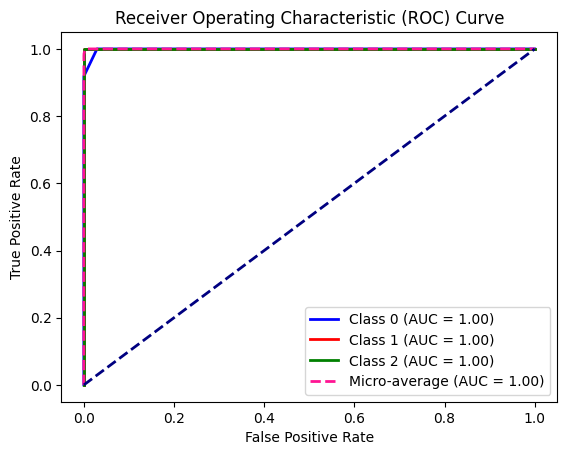

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the CatBoost classifier
classifier = CatBoostClassifier()

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Learning rate set to 0.5
0:	learn: 3.2172924	total: 8.54ms	remaining: 845ms
1:	learn: 2.3362399	total: 15.4ms	remaining: 756ms
2:	learn: 1.8693901	total: 22ms	remaining: 712ms
3:	learn: 1.4408382	total: 29.1ms	remaining: 698ms
4:	learn: 1.0281970	total: 35.6ms	remaining: 677ms
5:	learn: 0.9110839	total: 42.1ms	remaining: 659ms
6:	learn: 0.7801235	total: 48.4ms	remaining: 643ms
7:	learn: 0.5766469	total: 55.1ms	remaining: 634ms
8:	learn: 0.5345934	total: 61.6ms	remaining: 623ms
9:	learn: 0.4590988	total: 68.5ms	remaining: 617ms
10:	learn: 0.3766419	total: 78.6ms	remaining: 636ms
11:	learn: 0.3484882	total: 85.5ms	remaining: 627ms
12:	learn: 0.2995626	total: 91.9ms	remaining: 615ms
13:	learn: 0.2802534	total: 109ms	remaining: 671ms
14:	learn: 0.2536703	total: 116ms	remaining: 656ms
15:	learn: 0.2367627	total: 122ms	remaining: 642ms
16:	learn: 0.2156353	total: 129ms	remaining: 632ms
17:	learn: 0.2112015	total: 136ms	remaining: 618ms
18:	learn: 0.1983891	total: 142ms	remaining: 605ms
19:	l

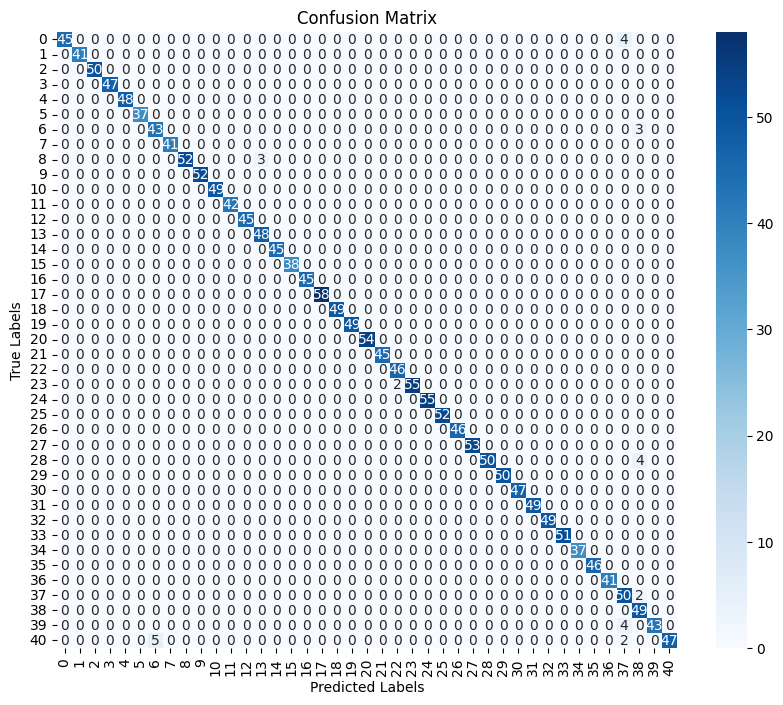

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Fit the CatBoost classifier
model = CatBoostClassifier(iterations=100, depth=3)  # Replace with your CatBoost classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# LGBM Classifier

In [ ]:
lgb_classifier = lgb.LGBMClassifier()


In [ ]:
lgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
B_pred = lgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9852642276422764


In [ ]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for the search with reduced values
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'num_leaves': [31, 63],
    'feature_fraction': [0.6, 0.8]
}

# Create an instance of the LGBMClassifier
lgbm = LGBMClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lgbm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new LGBMClassifier with the best hyperparameters
best_lgbm = LGBMClassifier(**best_params)

# Train the classifier
best_lgbm.fit(X_train, y_train)

# Make predictions on test data
predictions = best_lgbm.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the best hyperparameters, the corresponding best score, and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
Best Hyperparameters: {'feature_fraction': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'num_leaves': 31}
Best Score: 0.9837408586423472
Accuracy: 0.9827235772357723


In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        37
           6       0.90      0.93      0.91        46
           7       1.00      1.00      1.00        41
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00        49
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        45
          13       0.94      1.00      0.97        48
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        45
    

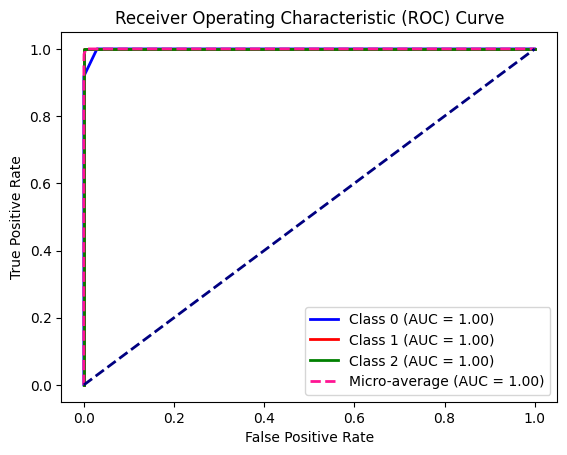

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import lightgbm as lgb
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))  # Replace n_classes with the number of classes in your problem

# Create the LightGBM classifier
classifier = lgb.LGBMClassifier()

# Fit the classifier
classifier.fit(X_train, y_train)

# Compute the probabilities for each class
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Replace with desired colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


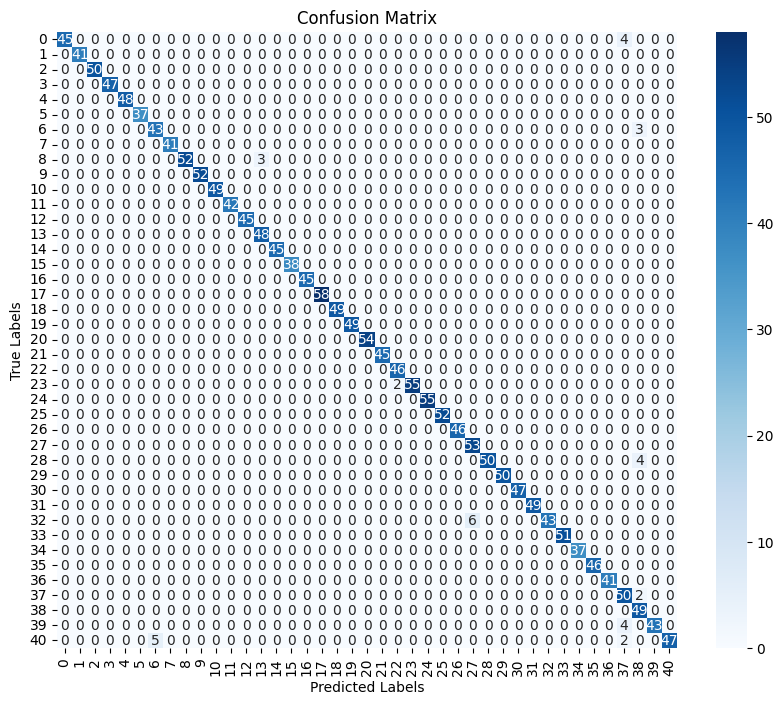

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

# Fit the LightGBM classifier
model = lgb.LGBMClassifier(n_estimators=100, max_depth=3)  # Replace with your LightGBM classifier and desired hyperparameters
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Get the unique labels in the dataset
labels = sorted(set(y_test))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **Accuracy Comparison Plot for all the classifiers without hyperparameter tuning**

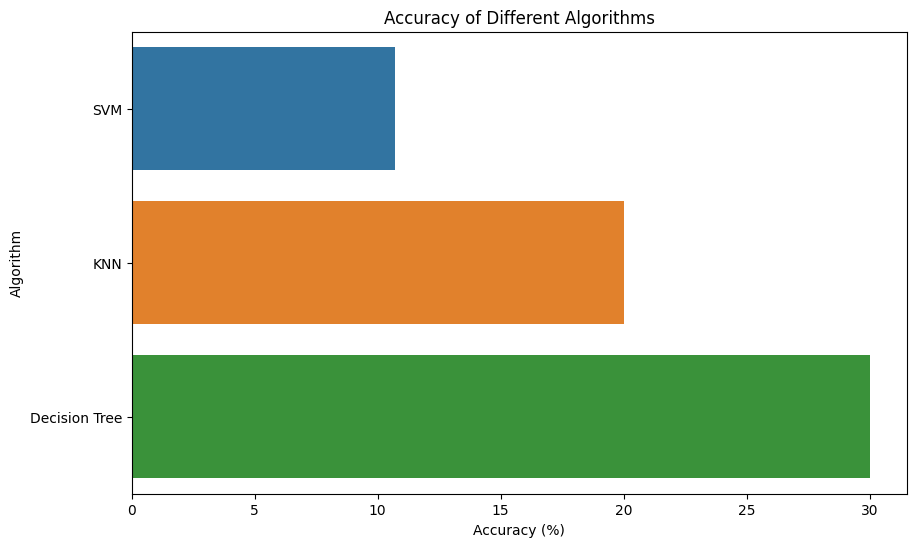

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the algorithms and their accuracies
algorithm_accuracies = {
    'SVM': 10.7,
    'KNN': 20,
    'Decision Tree': 30,
    # Add more algorithms and their accuracies here
}

# Create a DataFrame from the algorithm accuracies
results_df = pd.DataFrame.from_dict(algorithm_accuracies, orient='index', columns=['Accuracy'])
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Algorithm'}, inplace=True)

# Plot the accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Algorithm', data=results_df)
plt.xlabel('Accuracy (%)')
plt.ylabel('Algorithm')
plt.title('Accuracy of Different Algorithms')
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Define the algorithms and their accuracies
algorithm_accuracies = {
    'SVM': 10.7,
    'KNN': 20,
    'Decision Tree': 30,
    # Add more algorithms and their accuracies here
}

# Create a DataFrame from the algorithm accuracies
results_df = pd.DataFrame.from_dict(algorithm_accuracies, orient='index', columns=['Accuracy'])
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Algorithm'}, inplace=True)

# Define a color scale
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)']  # Add more colors as needed

# Create the bar graph
data = [
    go.Bar(
        x=results_df['Accuracy'],
        y=results_df['Algorithm'],
        orientation='h',
        marker=dict(color=colors)
    )
]

# Customize the layout
layout = go.Layout(
    title='Accuracy of Different Algorithms',
    xaxis=dict(title='Accuracy (%)'),
    yaxis=dict(title='Algorithm')
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


KeyError: "['nodal_skin_eruptions', 'shivering', 'ulcers_on_tongue', 'muscle_wasting', 'spotting_ urination', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'patches_in_throat', 'irregular_sugar_level', 'sunken_eyes', 'dehydration', 'pain_behind_the_eyes', 'yellow_urine', 'acute_liver_failure', 'swelling_of_stomach', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'weakness_in_limbs', 'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'cramps', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'movement_stiffness', 'spinning_movements', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'toxic_look_(typhos)', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes', 'increased_appetite', 'polyuria', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'yellow_crust_ooze'] not in index"